# Galaxy Zoo Dataset Classification using Convolutional Neural Networks
## Authors: Nerea Losada and Iñigo Ortega

## Description of the project

In this notebook, the Galaxy Zoo dataset is used with the aim of classifying each provided galaxy with its respective class, using CNN.

Convolutional neural networks are ones of the most employed DNN architectures. They are particularly efficient for computer vision tasks such as image classification, so it is efficient for our task.

Galaxy classification consists of, given an image, predict the probability that it belongs in a particular galaxy class (generally determined by its morphology).

## Objectives

The goal of the project is to design a convolutional network that outputs the probability that a given galaxy image belongs to one of the possible categories. This is a supervised classification problem. The dataset was used for one of the Kaggle challenges.

However, because of having a huge amount of images to train and test, the dataset was reduced in such a way that only a subset of the total amount of the images are used. This way, we used 13000, which we consider to be sufficient.


In order to do that, we will:

1) Preprocess the images

2) Design the network architecture and train it

3) Validate the network


## What is done in the notebook:

In this notebook we can find:

1) The objective of our project

2) The description of our dataset

3) The reading of the dataset

4) The preprocessing of the data: reducing the amount of images and resizing them

5) The creation of train, validation and test sets

6) The design of the network

7) Creation of the model and the treining

8) The validation of the model

9) The visualization of the results

10) The application of the GZ2 decision tree

## The database:

https://drive.google.com/open?id=15yza7bXOm0VF63zlbPJAe3_NA3nw8ZL8

## A trained model:

In case of needing a trained model, because of long execution, one can be downloaded through the next link: https://drive.google.com/file/d/1J7EeVuFQ5010hrAmcSIL_w5QAunHriUn/view?usp=sharing

However, it is possible that it doesn't get loaded locally, as it was made using Kaggle with one of their GPUs.

## Importing the libraries
We start by importing all relevant libraries to be used in the notebook.

**pandas**: In order to retrive the data from the csv files provided by the team responsible of Galaxy Zoo Challenge at Kaggle.

**tensorflow.keras**: On this notebook **Keras** is used, especifically, the version bundled with **TensorFlow**.

**matplotlib.pyplot**, **PIL** and **IPython.display**: For plotting.

**keras_preprocessing.***: It is used for image manipulation, for preprocessing or demonstration porpouses.

**os**, **random** and **shutil**: They are used at the moment of reading files from the system into python.

**collections**: For array comparison.

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import os, random, shutil

import tensorflow as tf
import tensorflow.keras as keras
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
from tensorflow.keras import backend as K
import collections
from IPython.display import display

## 1. Preprocessing

The “Galaxy Zoo” dataset consists of a total 141553 images. These are split into 61578 images for training –each with their respective probability distributions for the classifications for each of the inputs– and 79975 images for testing. As a crowd-sourced volunteer effort, images of the dataset were classified across 11 different categories. Each  of  categories  have  attributes  which  volunteers  can  rank,  there  are  37  attributes  in  total.

The votes on these volunteer categorizations are normalized to a floating point number between 0 and 1 inclusive. A number close to 1 indicates many users identifiedthis category for the galaxy image with a high level of confidence,  while numbers close to 0 indicateotherwise. These numbers represent the overall morphology of a galaxy in 37 attributes.

All images in the dataset are of size 424×424 and the object of interest is always centered. In order to reduce the dimensionality of the images, during preprocessing images are cropped to 150x150, discarding unnecessary information in each image which could impair the network. Down sampling can help the CNN learn which regions are related to each specific expression as well as improve performance when training.

### 1.1 Reading the data

The variable defining where is the working directory storing all the files of the dataset.

In [2]:
base_path = r'.'

Importing into Python the training set's images from _images_training_rev1_ and their labels from the CSV file, both provided at Kaggle on the Galaxy Zoo Challenge (https://www.kaggle.com/c/galaxy-zoo-the-galaxy-challenge), although, we have used the drive download link above in order to avoid searching for the files (https://drive.google.com/open?id=15yza7bXOm0VF63zlbPJAe3_NA3nw8ZL8).

In [3]:
# This zip is downloaded from the drive link provided above

# unzip command is needed to run the following commands

galaxy_zoo_zip = os.path.join(base_path, 'Galaxy-Zoo-Dataset.zip')

!unzip { galaxy_zoo_zip }


training_images_zip= os.path.join(base_path, 'project3-mlnn/images_training_rev1.zip')

!unzip { training_images_zip}

training_solutions_zip= os.path.join(base_path, 'project3-mlnn/training_solutions_rev1.zip')

!unzip { training_solutions_zip}

Archive:  ./Galaxy-Zoo-Dataset.zip
   creating: project3-mlnn/
  inflating: project3-mlnn/images_training_rev1.zip  
  inflating: project3-mlnn/training_solutions_rev1.zip  
Archive:  ./project3-mlnn/images_training_rev1.zip
   creating: images_training_rev1/
  inflating: images_training_rev1/100008.jpg  
  inflating: images_training_rev1/100023.jpg  
  inflating: images_training_rev1/100053.jpg  
  inflating: images_training_rev1/100078.jpg  
  inflating: images_training_rev1/100090.jpg  
  inflating: images_training_rev1/100122.jpg  
  inflating: images_training_rev1/100123.jpg  
  inflating: images_training_rev1/100128.jpg  
  inflating: images_training_rev1/100134.jpg  
  inflating: images_training_rev1/100143.jpg  
  inflating: images_training_rev1/100150.jpg  
  inflating: images_training_rev1/100157.jpg  
  inflating: images_training_rev1/100187.jpg  
  inflating: images_training_rev1/100204.jpg  
  inflating: images_training_rev1/100237.jpg  
  inflating: images_training_rev1/1

  inflating: images_training_rev1/106463.jpg  
  inflating: images_training_rev1/106471.jpg  
  inflating: images_training_rev1/106499.jpg  
  inflating: images_training_rev1/106514.jpg  
  inflating: images_training_rev1/106544.jpg  
  inflating: images_training_rev1/106612.jpg  
  inflating: images_training_rev1/106621.jpg  
  inflating: images_training_rev1/106646.jpg  
  inflating: images_training_rev1/106652.jpg  
  inflating: images_training_rev1/106664.jpg  
  inflating: images_training_rev1/106670.jpg  
  inflating: images_training_rev1/106689.jpg  
  inflating: images_training_rev1/106694.jpg  
  inflating: images_training_rev1/106705.jpg  
  inflating: images_training_rev1/106725.jpg  
  inflating: images_training_rev1/106739.jpg  
  inflating: images_training_rev1/106749.jpg  
  inflating: images_training_rev1/106773.jpg  
  inflating: images_training_rev1/106777.jpg  
  inflating: images_training_rev1/106781.jpg  
  inflating: images_training_rev1/106784.jpg  
  inflating: 

  inflating: images_training_rev1/111481.jpg  
  inflating: images_training_rev1/111484.jpg  
  inflating: images_training_rev1/111491.jpg  
  inflating: images_training_rev1/111499.jpg  
  inflating: images_training_rev1/111514.jpg  
  inflating: images_training_rev1/111534.jpg  
  inflating: images_training_rev1/111552.jpg  
  inflating: images_training_rev1/111553.jpg  
  inflating: images_training_rev1/111597.jpg  
  inflating: images_training_rev1/111615.jpg  
  inflating: images_training_rev1/111622.jpg  
  inflating: images_training_rev1/111658.jpg  
  inflating: images_training_rev1/111660.jpg  
  inflating: images_training_rev1/111667.jpg  
  inflating: images_training_rev1/111681.jpg  
  inflating: images_training_rev1/111715.jpg  
  inflating: images_training_rev1/111716.jpg  
  inflating: images_training_rev1/111725.jpg  
  inflating: images_training_rev1/111727.jpg  
  inflating: images_training_rev1/111743.jpg  
  inflating: images_training_rev1/111753.jpg  
  inflating: 

  inflating: images_training_rev1/116386.jpg  
  inflating: images_training_rev1/116417.jpg  
  inflating: images_training_rev1/116422.jpg  
  inflating: images_training_rev1/116429.jpg  
  inflating: images_training_rev1/116435.jpg  
  inflating: images_training_rev1/116455.jpg  
  inflating: images_training_rev1/116517.jpg  
  inflating: images_training_rev1/116518.jpg  
  inflating: images_training_rev1/116524.jpg  
  inflating: images_training_rev1/116527.jpg  
  inflating: images_training_rev1/116542.jpg  
  inflating: images_training_rev1/116551.jpg  
  inflating: images_training_rev1/116557.jpg  
  inflating: images_training_rev1/116565.jpg  
  inflating: images_training_rev1/116582.jpg  
  inflating: images_training_rev1/116596.jpg  
  inflating: images_training_rev1/116614.jpg  
  inflating: images_training_rev1/116620.jpg  
  inflating: images_training_rev1/116638.jpg  
  inflating: images_training_rev1/116667.jpg  
  inflating: images_training_rev1/116669.jpg  
  inflating: 

  inflating: images_training_rev1/121250.jpg  
  inflating: images_training_rev1/121257.jpg  
  inflating: images_training_rev1/121262.jpg  
  inflating: images_training_rev1/121267.jpg  
  inflating: images_training_rev1/121272.jpg  
  inflating: images_training_rev1/121276.jpg  
  inflating: images_training_rev1/121287.jpg  
  inflating: images_training_rev1/121319.jpg  
  inflating: images_training_rev1/121346.jpg  
  inflating: images_training_rev1/121371.jpg  
  inflating: images_training_rev1/121378.jpg  
  inflating: images_training_rev1/121394.jpg  
  inflating: images_training_rev1/121410.jpg  
  inflating: images_training_rev1/121413.jpg  
  inflating: images_training_rev1/121438.jpg  
  inflating: images_training_rev1/121459.jpg  
  inflating: images_training_rev1/121462.jpg  
  inflating: images_training_rev1/121473.jpg  
  inflating: images_training_rev1/121527.jpg  
  inflating: images_training_rev1/121538.jpg  
  inflating: images_training_rev1/121552.jpg  
  inflating: 

  inflating: images_training_rev1/126154.jpg  
  inflating: images_training_rev1/126202.jpg  
  inflating: images_training_rev1/126234.jpg  
  inflating: images_training_rev1/126256.jpg  
  inflating: images_training_rev1/126260.jpg  
  inflating: images_training_rev1/126265.jpg  
  inflating: images_training_rev1/126279.jpg  
  inflating: images_training_rev1/126282.jpg  
  inflating: images_training_rev1/126304.jpg  
  inflating: images_training_rev1/126321.jpg  
  inflating: images_training_rev1/126338.jpg  
  inflating: images_training_rev1/126364.jpg  
  inflating: images_training_rev1/126382.jpg  
  inflating: images_training_rev1/126386.jpg  
  inflating: images_training_rev1/126391.jpg  
  inflating: images_training_rev1/126406.jpg  
  inflating: images_training_rev1/126427.jpg  
  inflating: images_training_rev1/126435.jpg  
  inflating: images_training_rev1/126438.jpg  
  inflating: images_training_rev1/126459.jpg  
  inflating: images_training_rev1/126471.jpg  
  inflating: 

  inflating: images_training_rev1/130979.jpg  
  inflating: images_training_rev1/130996.jpg  
  inflating: images_training_rev1/131009.jpg  
  inflating: images_training_rev1/131010.jpg  
  inflating: images_training_rev1/131021.jpg  
  inflating: images_training_rev1/131030.jpg  
  inflating: images_training_rev1/131049.jpg  
  inflating: images_training_rev1/131051.jpg  
  inflating: images_training_rev1/131054.jpg  
  inflating: images_training_rev1/131063.jpg  
  inflating: images_training_rev1/131064.jpg  
  inflating: images_training_rev1/131103.jpg  
  inflating: images_training_rev1/131138.jpg  
  inflating: images_training_rev1/131164.jpg  
  inflating: images_training_rev1/131172.jpg  
  inflating: images_training_rev1/131184.jpg  
  inflating: images_training_rev1/131189.jpg  
  inflating: images_training_rev1/131208.jpg  
  inflating: images_training_rev1/131211.jpg  
  inflating: images_training_rev1/131221.jpg  
  inflating: images_training_rev1/131245.jpg  
  inflating: 

  inflating: images_training_rev1/135868.jpg  
  inflating: images_training_rev1/135873.jpg  
  inflating: images_training_rev1/135890.jpg  
  inflating: images_training_rev1/135901.jpg  
  inflating: images_training_rev1/135902.jpg  
  inflating: images_training_rev1/135924.jpg  
  inflating: images_training_rev1/135972.jpg  
  inflating: images_training_rev1/135980.jpg  
  inflating: images_training_rev1/136005.jpg  
  inflating: images_training_rev1/136022.jpg  
  inflating: images_training_rev1/136039.jpg  
  inflating: images_training_rev1/136072.jpg  
  inflating: images_training_rev1/136093.jpg  
  inflating: images_training_rev1/136109.jpg  
  inflating: images_training_rev1/136166.jpg  
  inflating: images_training_rev1/136167.jpg  
  inflating: images_training_rev1/136211.jpg  
  inflating: images_training_rev1/136233.jpg  
  inflating: images_training_rev1/136247.jpg  
  inflating: images_training_rev1/136255.jpg  
  inflating: images_training_rev1/136261.jpg  
  inflating: 

  inflating: images_training_rev1/140466.jpg  
  inflating: images_training_rev1/140489.jpg  
  inflating: images_training_rev1/140496.jpg  
  inflating: images_training_rev1/140529.jpg  
  inflating: images_training_rev1/140530.jpg  
  inflating: images_training_rev1/140533.jpg  
  inflating: images_training_rev1/140552.jpg  
  inflating: images_training_rev1/140558.jpg  
  inflating: images_training_rev1/140576.jpg  
  inflating: images_training_rev1/140597.jpg  
  inflating: images_training_rev1/140614.jpg  
  inflating: images_training_rev1/140618.jpg  
  inflating: images_training_rev1/140631.jpg  
  inflating: images_training_rev1/140661.jpg  
  inflating: images_training_rev1/140673.jpg  
  inflating: images_training_rev1/140695.jpg  
  inflating: images_training_rev1/140710.jpg  
  inflating: images_training_rev1/140714.jpg  
  inflating: images_training_rev1/140730.jpg  
  inflating: images_training_rev1/140740.jpg  
  inflating: images_training_rev1/140764.jpg  
  inflating: 

  inflating: images_training_rev1/145831.jpg  
  inflating: images_training_rev1/145832.jpg  
  inflating: images_training_rev1/145835.jpg  
  inflating: images_training_rev1/145850.jpg  
  inflating: images_training_rev1/145868.jpg  
  inflating: images_training_rev1/145875.jpg  
  inflating: images_training_rev1/145879.jpg  
  inflating: images_training_rev1/145898.jpg  
  inflating: images_training_rev1/145916.jpg  
  inflating: images_training_rev1/145922.jpg  
  inflating: images_training_rev1/145935.jpg  
  inflating: images_training_rev1/145951.jpg  
  inflating: images_training_rev1/145963.jpg  
  inflating: images_training_rev1/145969.jpg  
  inflating: images_training_rev1/145973.jpg  
  inflating: images_training_rev1/145975.jpg  
  inflating: images_training_rev1/145976.jpg  
  inflating: images_training_rev1/146016.jpg  
  inflating: images_training_rev1/146019.jpg  
  inflating: images_training_rev1/146029.jpg  
  inflating: images_training_rev1/146033.jpg  
  inflating: 

  inflating: images_training_rev1/150645.jpg  
  inflating: images_training_rev1/150662.jpg  
  inflating: images_training_rev1/150670.jpg  
  inflating: images_training_rev1/150681.jpg  
  inflating: images_training_rev1/150683.jpg  
  inflating: images_training_rev1/150717.jpg  
  inflating: images_training_rev1/150731.jpg  
  inflating: images_training_rev1/150746.jpg  
  inflating: images_training_rev1/150749.jpg  
  inflating: images_training_rev1/150764.jpg  
  inflating: images_training_rev1/150776.jpg  
  inflating: images_training_rev1/150785.jpg  
  inflating: images_training_rev1/150793.jpg  
  inflating: images_training_rev1/150798.jpg  
  inflating: images_training_rev1/150803.jpg  
  inflating: images_training_rev1/150841.jpg  
  inflating: images_training_rev1/150846.jpg  
  inflating: images_training_rev1/150870.jpg  
  inflating: images_training_rev1/150893.jpg  
  inflating: images_training_rev1/150911.jpg  
  inflating: images_training_rev1/150916.jpg  
  inflating: 

  inflating: images_training_rev1/154731.jpg  
  inflating: images_training_rev1/154753.jpg  
  inflating: images_training_rev1/154765.jpg  
  inflating: images_training_rev1/154771.jpg  
  inflating: images_training_rev1/154801.jpg  
  inflating: images_training_rev1/154805.jpg  
  inflating: images_training_rev1/154813.jpg  
  inflating: images_training_rev1/154816.jpg  
  inflating: images_training_rev1/154822.jpg  
  inflating: images_training_rev1/154824.jpg  
  inflating: images_training_rev1/154847.jpg  
  inflating: images_training_rev1/154854.jpg  
  inflating: images_training_rev1/154862.jpg  
  inflating: images_training_rev1/154875.jpg  
  inflating: images_training_rev1/154885.jpg  
  inflating: images_training_rev1/154896.jpg  
  inflating: images_training_rev1/154900.jpg  
  inflating: images_training_rev1/154914.jpg  
  inflating: images_training_rev1/154923.jpg  
  inflating: images_training_rev1/154956.jpg  
  inflating: images_training_rev1/154967.jpg  
  inflating: 

  inflating: images_training_rev1/159263.jpg  
  inflating: images_training_rev1/159299.jpg  
  inflating: images_training_rev1/159327.jpg  
  inflating: images_training_rev1/159369.jpg  
  inflating: images_training_rev1/159372.jpg  
  inflating: images_training_rev1/159391.jpg  
  inflating: images_training_rev1/159432.jpg  
  inflating: images_training_rev1/159446.jpg  
  inflating: images_training_rev1/159458.jpg  
  inflating: images_training_rev1/159468.jpg  
  inflating: images_training_rev1/159478.jpg  
  inflating: images_training_rev1/159483.jpg  
  inflating: images_training_rev1/159485.jpg  
  inflating: images_training_rev1/159501.jpg  
  inflating: images_training_rev1/159521.jpg  
  inflating: images_training_rev1/159552.jpg  
  inflating: images_training_rev1/159556.jpg  
  inflating: images_training_rev1/159563.jpg  
  inflating: images_training_rev1/159568.jpg  
  inflating: images_training_rev1/159575.jpg  
  inflating: images_training_rev1/159599.jpg  
  inflating: 

  inflating: images_training_rev1/163477.jpg  
  inflating: images_training_rev1/163489.jpg  
  inflating: images_training_rev1/163528.jpg  
  inflating: images_training_rev1/163537.jpg  
  inflating: images_training_rev1/163541.jpg  
  inflating: images_training_rev1/163545.jpg  
  inflating: images_training_rev1/163552.jpg  
  inflating: images_training_rev1/163558.jpg  
  inflating: images_training_rev1/163584.jpg  
  inflating: images_training_rev1/163606.jpg  
  inflating: images_training_rev1/163618.jpg  
  inflating: images_training_rev1/163623.jpg  
  inflating: images_training_rev1/163654.jpg  
  inflating: images_training_rev1/163668.jpg  
  inflating: images_training_rev1/163697.jpg  
  inflating: images_training_rev1/163698.jpg  
  inflating: images_training_rev1/163699.jpg  
  inflating: images_training_rev1/163702.jpg  
  inflating: images_training_rev1/163726.jpg  
  inflating: images_training_rev1/163745.jpg  
  inflating: images_training_rev1/163753.jpg  
  inflating: 

  inflating: images_training_rev1/168280.jpg  
  inflating: images_training_rev1/168282.jpg  
  inflating: images_training_rev1/168299.jpg  
  inflating: images_training_rev1/168348.jpg  
  inflating: images_training_rev1/168367.jpg  
  inflating: images_training_rev1/168384.jpg  
  inflating: images_training_rev1/168395.jpg  
  inflating: images_training_rev1/168425.jpg  
  inflating: images_training_rev1/168436.jpg  
  inflating: images_training_rev1/168471.jpg  
  inflating: images_training_rev1/168472.jpg  
  inflating: images_training_rev1/168474.jpg  
  inflating: images_training_rev1/168481.jpg  
  inflating: images_training_rev1/168490.jpg  
  inflating: images_training_rev1/168491.jpg  
  inflating: images_training_rev1/168523.jpg  
  inflating: images_training_rev1/168533.jpg  
  inflating: images_training_rev1/168558.jpg  
  inflating: images_training_rev1/168559.jpg  
  inflating: images_training_rev1/168561.jpg  
  inflating: images_training_rev1/168564.jpg  
  inflating: 

  inflating: images_training_rev1/172919.jpg  
  inflating: images_training_rev1/172928.jpg  
  inflating: images_training_rev1/172932.jpg  
  inflating: images_training_rev1/172936.jpg  
  inflating: images_training_rev1/172968.jpg  
  inflating: images_training_rev1/172984.jpg  
  inflating: images_training_rev1/172991.jpg  
  inflating: images_training_rev1/173007.jpg  
  inflating: images_training_rev1/173015.jpg  
  inflating: images_training_rev1/173026.jpg  
  inflating: images_training_rev1/173031.jpg  
  inflating: images_training_rev1/173051.jpg  
  inflating: images_training_rev1/173082.jpg  
  inflating: images_training_rev1/173107.jpg  
  inflating: images_training_rev1/173108.jpg  
  inflating: images_training_rev1/173127.jpg  
  inflating: images_training_rev1/173134.jpg  
  inflating: images_training_rev1/173136.jpg  
  inflating: images_training_rev1/173137.jpg  
  inflating: images_training_rev1/173145.jpg  
  inflating: images_training_rev1/173160.jpg  
  inflating: 

  inflating: images_training_rev1/177390.jpg  
  inflating: images_training_rev1/177392.jpg  
  inflating: images_training_rev1/177394.jpg  
  inflating: images_training_rev1/177406.jpg  
  inflating: images_training_rev1/177408.jpg  
  inflating: images_training_rev1/177413.jpg  
  inflating: images_training_rev1/177425.jpg  
  inflating: images_training_rev1/177446.jpg  
  inflating: images_training_rev1/177491.jpg  
  inflating: images_training_rev1/177506.jpg  
  inflating: images_training_rev1/177513.jpg  
  inflating: images_training_rev1/177517.jpg  
  inflating: images_training_rev1/177529.jpg  
  inflating: images_training_rev1/177575.jpg  
  inflating: images_training_rev1/177585.jpg  
  inflating: images_training_rev1/177599.jpg  
  inflating: images_training_rev1/177620.jpg  
  inflating: images_training_rev1/177629.jpg  
  inflating: images_training_rev1/177637.jpg  
  inflating: images_training_rev1/177639.jpg  
  inflating: images_training_rev1/177648.jpg  
  inflating: 

  inflating: images_training_rev1/181982.jpg  
  inflating: images_training_rev1/181985.jpg  
  inflating: images_training_rev1/182009.jpg  
  inflating: images_training_rev1/182021.jpg  
  inflating: images_training_rev1/182036.jpg  
  inflating: images_training_rev1/182042.jpg  
  inflating: images_training_rev1/182046.jpg  
  inflating: images_training_rev1/182053.jpg  
  inflating: images_training_rev1/182054.jpg  
  inflating: images_training_rev1/182056.jpg  
  inflating: images_training_rev1/182091.jpg  
  inflating: images_training_rev1/182132.jpg  
  inflating: images_training_rev1/182134.jpg  
  inflating: images_training_rev1/182165.jpg  
  inflating: images_training_rev1/182176.jpg  
  inflating: images_training_rev1/182177.jpg  
  inflating: images_training_rev1/182188.jpg  
  inflating: images_training_rev1/182193.jpg  
  inflating: images_training_rev1/182204.jpg  
  inflating: images_training_rev1/182213.jpg  
  inflating: images_training_rev1/182224.jpg  
  inflating: 

  inflating: images_training_rev1/186596.jpg  
  inflating: images_training_rev1/186598.jpg  
  inflating: images_training_rev1/186613.jpg  
  inflating: images_training_rev1/186617.jpg  
  inflating: images_training_rev1/186634.jpg  
  inflating: images_training_rev1/186640.jpg  
  inflating: images_training_rev1/186661.jpg  
  inflating: images_training_rev1/186667.jpg  
  inflating: images_training_rev1/186668.jpg  
  inflating: images_training_rev1/186677.jpg  
  inflating: images_training_rev1/186699.jpg  
  inflating: images_training_rev1/186700.jpg  
  inflating: images_training_rev1/186719.jpg  
  inflating: images_training_rev1/186720.jpg  
  inflating: images_training_rev1/186721.jpg  
  inflating: images_training_rev1/186722.jpg  
  inflating: images_training_rev1/186747.jpg  
  inflating: images_training_rev1/186762.jpg  
  inflating: images_training_rev1/186765.jpg  
  inflating: images_training_rev1/186767.jpg  
  inflating: images_training_rev1/186771.jpg  
  inflating: 

  inflating: images_training_rev1/190905.jpg  
  inflating: images_training_rev1/190971.jpg  
  inflating: images_training_rev1/190997.jpg  
  inflating: images_training_rev1/191010.jpg  
  inflating: images_training_rev1/191029.jpg  
  inflating: images_training_rev1/191047.jpg  
  inflating: images_training_rev1/191061.jpg  
  inflating: images_training_rev1/191070.jpg  
  inflating: images_training_rev1/191076.jpg  
  inflating: images_training_rev1/191112.jpg  
  inflating: images_training_rev1/191115.jpg  
  inflating: images_training_rev1/191124.jpg  
  inflating: images_training_rev1/191127.jpg  
  inflating: images_training_rev1/191131.jpg  
  inflating: images_training_rev1/191160.jpg  
  inflating: images_training_rev1/191171.jpg  
  inflating: images_training_rev1/191176.jpg  
  inflating: images_training_rev1/191181.jpg  
  inflating: images_training_rev1/191189.jpg  
  inflating: images_training_rev1/191200.jpg  
  inflating: images_training_rev1/191219.jpg  
  inflating: 

  inflating: images_training_rev1/195341.jpg  
  inflating: images_training_rev1/195352.jpg  
  inflating: images_training_rev1/195373.jpg  
  inflating: images_training_rev1/195386.jpg  
  inflating: images_training_rev1/195392.jpg  
  inflating: images_training_rev1/195403.jpg  
  inflating: images_training_rev1/195428.jpg  
  inflating: images_training_rev1/195452.jpg  
  inflating: images_training_rev1/195473.jpg  
  inflating: images_training_rev1/195481.jpg  
  inflating: images_training_rev1/195483.jpg  
  inflating: images_training_rev1/195495.jpg  
  inflating: images_training_rev1/195496.jpg  
  inflating: images_training_rev1/195504.jpg  
  inflating: images_training_rev1/195507.jpg  
  inflating: images_training_rev1/195510.jpg  
  inflating: images_training_rev1/195516.jpg  
  inflating: images_training_rev1/195528.jpg  
  inflating: images_training_rev1/195554.jpg  
  inflating: images_training_rev1/195556.jpg  
  inflating: images_training_rev1/195557.jpg  
  inflating: 

  inflating: images_training_rev1/200137.jpg  
  inflating: images_training_rev1/200140.jpg  
  inflating: images_training_rev1/200169.jpg  
  inflating: images_training_rev1/200173.jpg  
  inflating: images_training_rev1/200184.jpg  
  inflating: images_training_rev1/200197.jpg  
  inflating: images_training_rev1/200221.jpg  
  inflating: images_training_rev1/200225.jpg  
  inflating: images_training_rev1/200245.jpg  
  inflating: images_training_rev1/200257.jpg  
  inflating: images_training_rev1/200298.jpg  
  inflating: images_training_rev1/200310.jpg  
  inflating: images_training_rev1/200327.jpg  
  inflating: images_training_rev1/200330.jpg  
  inflating: images_training_rev1/200366.jpg  
  inflating: images_training_rev1/200367.jpg  
  inflating: images_training_rev1/200383.jpg  
  inflating: images_training_rev1/200389.jpg  
  inflating: images_training_rev1/200395.jpg  
  inflating: images_training_rev1/200405.jpg  
  inflating: images_training_rev1/200410.jpg  
  inflating: 

  inflating: images_training_rev1/204634.jpg  
  inflating: images_training_rev1/204645.jpg  
  inflating: images_training_rev1/204656.jpg  
  inflating: images_training_rev1/204676.jpg  
  inflating: images_training_rev1/204698.jpg  
  inflating: images_training_rev1/204714.jpg  
  inflating: images_training_rev1/204719.jpg  
  inflating: images_training_rev1/204724.jpg  
  inflating: images_training_rev1/204756.jpg  
  inflating: images_training_rev1/204764.jpg  
  inflating: images_training_rev1/204771.jpg  
  inflating: images_training_rev1/204788.jpg  
  inflating: images_training_rev1/204809.jpg  
  inflating: images_training_rev1/204848.jpg  
  inflating: images_training_rev1/204849.jpg  
  inflating: images_training_rev1/204859.jpg  
  inflating: images_training_rev1/204897.jpg  
  inflating: images_training_rev1/204907.jpg  
  inflating: images_training_rev1/204910.jpg  
  inflating: images_training_rev1/204918.jpg  
  inflating: images_training_rev1/204959.jpg  
  inflating: 

  inflating: images_training_rev1/209140.jpg  
  inflating: images_training_rev1/209150.jpg  
  inflating: images_training_rev1/209154.jpg  
  inflating: images_training_rev1/209192.jpg  
  inflating: images_training_rev1/209196.jpg  
  inflating: images_training_rev1/209210.jpg  
  inflating: images_training_rev1/209225.jpg  
  inflating: images_training_rev1/209240.jpg  
  inflating: images_training_rev1/209265.jpg  
  inflating: images_training_rev1/209273.jpg  
  inflating: images_training_rev1/209275.jpg  
  inflating: images_training_rev1/209291.jpg  
  inflating: images_training_rev1/209317.jpg  
  inflating: images_training_rev1/209321.jpg  
  inflating: images_training_rev1/209354.jpg  
  inflating: images_training_rev1/209401.jpg  
  inflating: images_training_rev1/209405.jpg  
  inflating: images_training_rev1/209407.jpg  
  inflating: images_training_rev1/209409.jpg  
  inflating: images_training_rev1/209411.jpg  
  inflating: images_training_rev1/209434.jpg  
  inflating: 

  inflating: images_training_rev1/213711.jpg  
  inflating: images_training_rev1/213714.jpg  
  inflating: images_training_rev1/213715.jpg  
  inflating: images_training_rev1/213716.jpg  
  inflating: images_training_rev1/213718.jpg  
  inflating: images_training_rev1/213727.jpg  
  inflating: images_training_rev1/213732.jpg  
  inflating: images_training_rev1/213733.jpg  
  inflating: images_training_rev1/213743.jpg  
  inflating: images_training_rev1/213747.jpg  
  inflating: images_training_rev1/213757.jpg  
  inflating: images_training_rev1/213765.jpg  
  inflating: images_training_rev1/213767.jpg  
  inflating: images_training_rev1/213773.jpg  
  inflating: images_training_rev1/213840.jpg  
  inflating: images_training_rev1/213863.jpg  
  inflating: images_training_rev1/213874.jpg  
  inflating: images_training_rev1/213881.jpg  
  inflating: images_training_rev1/213921.jpg  
  inflating: images_training_rev1/213936.jpg  
  inflating: images_training_rev1/213944.jpg  
  inflating: 

  inflating: images_training_rev1/218082.jpg  
  inflating: images_training_rev1/218133.jpg  
  inflating: images_training_rev1/218136.jpg  
  inflating: images_training_rev1/218139.jpg  
  inflating: images_training_rev1/218173.jpg  
  inflating: images_training_rev1/218190.jpg  
  inflating: images_training_rev1/218236.jpg  
  inflating: images_training_rev1/218238.jpg  
  inflating: images_training_rev1/218268.jpg  
  inflating: images_training_rev1/218269.jpg  
  inflating: images_training_rev1/218281.jpg  
  inflating: images_training_rev1/218299.jpg  
  inflating: images_training_rev1/218318.jpg  
  inflating: images_training_rev1/218325.jpg  
  inflating: images_training_rev1/218334.jpg  
  inflating: images_training_rev1/218375.jpg  
  inflating: images_training_rev1/218377.jpg  
  inflating: images_training_rev1/218381.jpg  
  inflating: images_training_rev1/218391.jpg  
  inflating: images_training_rev1/218446.jpg  
  inflating: images_training_rev1/218449.jpg  
  inflating: 

  inflating: images_training_rev1/223140.jpg  
  inflating: images_training_rev1/223166.jpg  
  inflating: images_training_rev1/223181.jpg  
  inflating: images_training_rev1/223184.jpg  
  inflating: images_training_rev1/223192.jpg  
  inflating: images_training_rev1/223193.jpg  
  inflating: images_training_rev1/223199.jpg  
  inflating: images_training_rev1/223206.jpg  
  inflating: images_training_rev1/223228.jpg  
  inflating: images_training_rev1/223236.jpg  
  inflating: images_training_rev1/223253.jpg  
  inflating: images_training_rev1/223275.jpg  
  inflating: images_training_rev1/223330.jpg  
  inflating: images_training_rev1/223340.jpg  
  inflating: images_training_rev1/223374.jpg  
  inflating: images_training_rev1/223397.jpg  
  inflating: images_training_rev1/223408.jpg  
  inflating: images_training_rev1/223426.jpg  
  inflating: images_training_rev1/223431.jpg  
  inflating: images_training_rev1/223447.jpg  
  inflating: images_training_rev1/223500.jpg  
  inflating: 

  inflating: images_training_rev1/227890.jpg  
  inflating: images_training_rev1/227909.jpg  
  inflating: images_training_rev1/227917.jpg  
  inflating: images_training_rev1/227997.jpg  
  inflating: images_training_rev1/228000.jpg  
  inflating: images_training_rev1/228008.jpg  
  inflating: images_training_rev1/228009.jpg  
  inflating: images_training_rev1/228032.jpg  
  inflating: images_training_rev1/228041.jpg  
  inflating: images_training_rev1/228042.jpg  
  inflating: images_training_rev1/228044.jpg  
  inflating: images_training_rev1/228053.jpg  
  inflating: images_training_rev1/228096.jpg  
  inflating: images_training_rev1/228129.jpg  
  inflating: images_training_rev1/228168.jpg  
  inflating: images_training_rev1/228196.jpg  
  inflating: images_training_rev1/228197.jpg  
  inflating: images_training_rev1/228206.jpg  
  inflating: images_training_rev1/228209.jpg  
  inflating: images_training_rev1/228215.jpg  
  inflating: images_training_rev1/228223.jpg  
  inflating: 

  inflating: images_training_rev1/232749.jpg  
  inflating: images_training_rev1/232766.jpg  
  inflating: images_training_rev1/232788.jpg  
  inflating: images_training_rev1/232843.jpg  
  inflating: images_training_rev1/232852.jpg  
  inflating: images_training_rev1/232857.jpg  
  inflating: images_training_rev1/232859.jpg  
  inflating: images_training_rev1/232880.jpg  
  inflating: images_training_rev1/232906.jpg  
  inflating: images_training_rev1/232917.jpg  
  inflating: images_training_rev1/232922.jpg  
  inflating: images_training_rev1/232935.jpg  
  inflating: images_training_rev1/232952.jpg  
  inflating: images_training_rev1/232956.jpg  
  inflating: images_training_rev1/232957.jpg  
  inflating: images_training_rev1/233007.jpg  
  inflating: images_training_rev1/233012.jpg  
  inflating: images_training_rev1/233034.jpg  
  inflating: images_training_rev1/233042.jpg  
  inflating: images_training_rev1/233050.jpg  
  inflating: images_training_rev1/233061.jpg  
  inflating: 

  inflating: images_training_rev1/237951.jpg  
  inflating: images_training_rev1/237969.jpg  
  inflating: images_training_rev1/237974.jpg  
  inflating: images_training_rev1/237978.jpg  
  inflating: images_training_rev1/237985.jpg  
  inflating: images_training_rev1/237986.jpg  
  inflating: images_training_rev1/237993.jpg  
  inflating: images_training_rev1/237995.jpg  
  inflating: images_training_rev1/237998.jpg  
  inflating: images_training_rev1/238006.jpg  
  inflating: images_training_rev1/238045.jpg  
  inflating: images_training_rev1/238062.jpg  
  inflating: images_training_rev1/238065.jpg  
  inflating: images_training_rev1/238072.jpg  
  inflating: images_training_rev1/238083.jpg  
  inflating: images_training_rev1/238097.jpg  
  inflating: images_training_rev1/238165.jpg  
  inflating: images_training_rev1/238173.jpg  
  inflating: images_training_rev1/238181.jpg  
  inflating: images_training_rev1/238211.jpg  
  inflating: images_training_rev1/238233.jpg  
  inflating: 

  inflating: images_training_rev1/243170.jpg  
  inflating: images_training_rev1/243201.jpg  
  inflating: images_training_rev1/243207.jpg  
  inflating: images_training_rev1/243217.jpg  
  inflating: images_training_rev1/243259.jpg  
  inflating: images_training_rev1/243271.jpg  
  inflating: images_training_rev1/243286.jpg  
  inflating: images_training_rev1/243330.jpg  
  inflating: images_training_rev1/243336.jpg  
  inflating: images_training_rev1/243337.jpg  
  inflating: images_training_rev1/243349.jpg  
  inflating: images_training_rev1/243369.jpg  
  inflating: images_training_rev1/243382.jpg  
  inflating: images_training_rev1/243392.jpg  
  inflating: images_training_rev1/243410.jpg  
  inflating: images_training_rev1/243418.jpg  
  inflating: images_training_rev1/243423.jpg  
  inflating: images_training_rev1/243426.jpg  
  inflating: images_training_rev1/243438.jpg  
  inflating: images_training_rev1/243451.jpg  
  inflating: images_training_rev1/243455.jpg  
  inflating: 

  inflating: images_training_rev1/247789.jpg  
  inflating: images_training_rev1/247801.jpg  
  inflating: images_training_rev1/247807.jpg  
  inflating: images_training_rev1/247813.jpg  
  inflating: images_training_rev1/247817.jpg  
  inflating: images_training_rev1/247822.jpg  
  inflating: images_training_rev1/247865.jpg  
  inflating: images_training_rev1/247875.jpg  
  inflating: images_training_rev1/247897.jpg  
  inflating: images_training_rev1/247912.jpg  
  inflating: images_training_rev1/247926.jpg  
  inflating: images_training_rev1/247966.jpg  
  inflating: images_training_rev1/247977.jpg  
  inflating: images_training_rev1/247999.jpg  
  inflating: images_training_rev1/248014.jpg  
  inflating: images_training_rev1/248015.jpg  
  inflating: images_training_rev1/248017.jpg  
  inflating: images_training_rev1/248025.jpg  
  inflating: images_training_rev1/248031.jpg  
  inflating: images_training_rev1/248033.jpg  
  inflating: images_training_rev1/248044.jpg  
  inflating: 

  inflating: images_training_rev1/252479.jpg  
  inflating: images_training_rev1/252484.jpg  
  inflating: images_training_rev1/252485.jpg  
  inflating: images_training_rev1/252509.jpg  
  inflating: images_training_rev1/252515.jpg  
  inflating: images_training_rev1/252522.jpg  
  inflating: images_training_rev1/252538.jpg  
  inflating: images_training_rev1/252542.jpg  
  inflating: images_training_rev1/252576.jpg  
  inflating: images_training_rev1/252580.jpg  
  inflating: images_training_rev1/252593.jpg  
  inflating: images_training_rev1/252609.jpg  
  inflating: images_training_rev1/252624.jpg  
  inflating: images_training_rev1/252627.jpg  
  inflating: images_training_rev1/252628.jpg  
  inflating: images_training_rev1/252631.jpg  
  inflating: images_training_rev1/252656.jpg  
  inflating: images_training_rev1/252659.jpg  
  inflating: images_training_rev1/252661.jpg  
  inflating: images_training_rev1/252663.jpg  
  inflating: images_training_rev1/252678.jpg  
  inflating: 

  inflating: images_training_rev1/256809.jpg  
  inflating: images_training_rev1/256823.jpg  
  inflating: images_training_rev1/256835.jpg  
  inflating: images_training_rev1/256847.jpg  
  inflating: images_training_rev1/256867.jpg  
  inflating: images_training_rev1/256877.jpg  
  inflating: images_training_rev1/256886.jpg  
  inflating: images_training_rev1/256893.jpg  
  inflating: images_training_rev1/256920.jpg  
  inflating: images_training_rev1/256926.jpg  
  inflating: images_training_rev1/256947.jpg  
  inflating: images_training_rev1/256955.jpg  
  inflating: images_training_rev1/256983.jpg  
  inflating: images_training_rev1/257015.jpg  
  inflating: images_training_rev1/257019.jpg  
  inflating: images_training_rev1/257028.jpg  
  inflating: images_training_rev1/257044.jpg  
  inflating: images_training_rev1/257051.jpg  
  inflating: images_training_rev1/257059.jpg  
  inflating: images_training_rev1/257061.jpg  
  inflating: images_training_rev1/257076.jpg  
  inflating: 

  inflating: images_training_rev1/261204.jpg  
  inflating: images_training_rev1/261207.jpg  
  inflating: images_training_rev1/261213.jpg  
  inflating: images_training_rev1/261225.jpg  
  inflating: images_training_rev1/261294.jpg  
  inflating: images_training_rev1/261309.jpg  
  inflating: images_training_rev1/261311.jpg  
  inflating: images_training_rev1/261313.jpg  
  inflating: images_training_rev1/261316.jpg  
  inflating: images_training_rev1/261333.jpg  
  inflating: images_training_rev1/261356.jpg  
  inflating: images_training_rev1/261359.jpg  
  inflating: images_training_rev1/261375.jpg  
  inflating: images_training_rev1/261392.jpg  
  inflating: images_training_rev1/261411.jpg  
  inflating: images_training_rev1/261414.jpg  
  inflating: images_training_rev1/261443.jpg  
  inflating: images_training_rev1/261455.jpg  
  inflating: images_training_rev1/261456.jpg  
  inflating: images_training_rev1/261467.jpg  
  inflating: images_training_rev1/261478.jpg  
  inflating: 

  inflating: images_training_rev1/265705.jpg  
  inflating: images_training_rev1/265709.jpg  
  inflating: images_training_rev1/265734.jpg  
  inflating: images_training_rev1/265763.jpg  
  inflating: images_training_rev1/265769.jpg  
  inflating: images_training_rev1/265770.jpg  
  inflating: images_training_rev1/265777.jpg  
  inflating: images_training_rev1/265778.jpg  
  inflating: images_training_rev1/265826.jpg  
  inflating: images_training_rev1/265833.jpg  
  inflating: images_training_rev1/265882.jpg  
  inflating: images_training_rev1/265884.jpg  
  inflating: images_training_rev1/265895.jpg  
  inflating: images_training_rev1/265902.jpg  
  inflating: images_training_rev1/265914.jpg  
  inflating: images_training_rev1/265933.jpg  
  inflating: images_training_rev1/265946.jpg  
  inflating: images_training_rev1/265949.jpg  
  inflating: images_training_rev1/265986.jpg  
  inflating: images_training_rev1/265990.jpg  
  inflating: images_training_rev1/266019.jpg  
  inflating: 

  inflating: images_training_rev1/270279.jpg  
  inflating: images_training_rev1/270286.jpg  
  inflating: images_training_rev1/270304.jpg  
  inflating: images_training_rev1/270312.jpg  
  inflating: images_training_rev1/270322.jpg  
  inflating: images_training_rev1/270325.jpg  
  inflating: images_training_rev1/270326.jpg  
  inflating: images_training_rev1/270351.jpg  
  inflating: images_training_rev1/270361.jpg  
  inflating: images_training_rev1/270383.jpg  
  inflating: images_training_rev1/270397.jpg  
  inflating: images_training_rev1/270417.jpg  
  inflating: images_training_rev1/270431.jpg  
  inflating: images_training_rev1/270442.jpg  
  inflating: images_training_rev1/270478.jpg  
  inflating: images_training_rev1/270483.jpg  
  inflating: images_training_rev1/270494.jpg  
  inflating: images_training_rev1/270510.jpg  
  inflating: images_training_rev1/270534.jpg  
  inflating: images_training_rev1/270543.jpg  
  inflating: images_training_rev1/270581.jpg  
  inflating: 

  inflating: images_training_rev1/275180.jpg  
  inflating: images_training_rev1/275200.jpg  
  inflating: images_training_rev1/275225.jpg  
  inflating: images_training_rev1/275226.jpg  
  inflating: images_training_rev1/275228.jpg  
  inflating: images_training_rev1/275242.jpg  
  inflating: images_training_rev1/275284.jpg  
  inflating: images_training_rev1/275290.jpg  
  inflating: images_training_rev1/275291.jpg  
  inflating: images_training_rev1/275297.jpg  
  inflating: images_training_rev1/275329.jpg  
  inflating: images_training_rev1/275339.jpg  
  inflating: images_training_rev1/275368.jpg  
  inflating: images_training_rev1/275410.jpg  
  inflating: images_training_rev1/275437.jpg  
  inflating: images_training_rev1/275444.jpg  
  inflating: images_training_rev1/275460.jpg  
  inflating: images_training_rev1/275461.jpg  
  inflating: images_training_rev1/275464.jpg  
  inflating: images_training_rev1/275479.jpg  
  inflating: images_training_rev1/275496.jpg  
  inflating: 

  inflating: images_training_rev1/279404.jpg  
  inflating: images_training_rev1/279411.jpg  
  inflating: images_training_rev1/279430.jpg  
  inflating: images_training_rev1/279431.jpg  
  inflating: images_training_rev1/279432.jpg  
  inflating: images_training_rev1/279434.jpg  
  inflating: images_training_rev1/279457.jpg  
  inflating: images_training_rev1/279458.jpg  
  inflating: images_training_rev1/279467.jpg  
  inflating: images_training_rev1/279471.jpg  
  inflating: images_training_rev1/279518.jpg  
  inflating: images_training_rev1/279540.jpg  
  inflating: images_training_rev1/279582.jpg  
  inflating: images_training_rev1/279610.jpg  
  inflating: images_training_rev1/279629.jpg  
  inflating: images_training_rev1/279630.jpg  
  inflating: images_training_rev1/279634.jpg  
  inflating: images_training_rev1/279660.jpg  
  inflating: images_training_rev1/279672.jpg  
  inflating: images_training_rev1/279683.jpg  
  inflating: images_training_rev1/279691.jpg  
  inflating: 

  inflating: images_training_rev1/284200.jpg  
  inflating: images_training_rev1/284234.jpg  
  inflating: images_training_rev1/284239.jpg  
  inflating: images_training_rev1/284241.jpg  
  inflating: images_training_rev1/284258.jpg  
  inflating: images_training_rev1/284260.jpg  
  inflating: images_training_rev1/284282.jpg  
  inflating: images_training_rev1/284294.jpg  
  inflating: images_training_rev1/284310.jpg  
  inflating: images_training_rev1/284329.jpg  
  inflating: images_training_rev1/284369.jpg  
  inflating: images_training_rev1/284396.jpg  
  inflating: images_training_rev1/284398.jpg  
  inflating: images_training_rev1/284415.jpg  
  inflating: images_training_rev1/284451.jpg  
  inflating: images_training_rev1/284466.jpg  
  inflating: images_training_rev1/284478.jpg  
  inflating: images_training_rev1/284508.jpg  
  inflating: images_training_rev1/284555.jpg  
  inflating: images_training_rev1/284578.jpg  
  inflating: images_training_rev1/284606.jpg  
  inflating: 

  inflating: images_training_rev1/288847.jpg  
  inflating: images_training_rev1/288871.jpg  
  inflating: images_training_rev1/288893.jpg  
  inflating: images_training_rev1/288914.jpg  
  inflating: images_training_rev1/288919.jpg  
  inflating: images_training_rev1/288946.jpg  
  inflating: images_training_rev1/288950.jpg  
  inflating: images_training_rev1/289030.jpg  
  inflating: images_training_rev1/289033.jpg  
  inflating: images_training_rev1/289034.jpg  
  inflating: images_training_rev1/289044.jpg  
  inflating: images_training_rev1/289053.jpg  
  inflating: images_training_rev1/289054.jpg  
  inflating: images_training_rev1/289069.jpg  
  inflating: images_training_rev1/289084.jpg  
  inflating: images_training_rev1/289101.jpg  
  inflating: images_training_rev1/289104.jpg  
  inflating: images_training_rev1/289111.jpg  
  inflating: images_training_rev1/289118.jpg  
  inflating: images_training_rev1/289124.jpg  
  inflating: images_training_rev1/289136.jpg  
  inflating: 

  inflating: images_training_rev1/293953.jpg  
  inflating: images_training_rev1/293964.jpg  
  inflating: images_training_rev1/293991.jpg  
  inflating: images_training_rev1/294000.jpg  
  inflating: images_training_rev1/294002.jpg  
  inflating: images_training_rev1/294010.jpg  
  inflating: images_training_rev1/294012.jpg  
  inflating: images_training_rev1/294024.jpg  
  inflating: images_training_rev1/294030.jpg  
  inflating: images_training_rev1/294051.jpg  
  inflating: images_training_rev1/294054.jpg  
  inflating: images_training_rev1/294076.jpg  
  inflating: images_training_rev1/294105.jpg  
  inflating: images_training_rev1/294111.jpg  
  inflating: images_training_rev1/294150.jpg  
  inflating: images_training_rev1/294195.jpg  
  inflating: images_training_rev1/294197.jpg  
  inflating: images_training_rev1/294207.jpg  
  inflating: images_training_rev1/294215.jpg  
  inflating: images_training_rev1/294218.jpg  
  inflating: images_training_rev1/294219.jpg  
  inflating: 

  inflating: images_training_rev1/298860.jpg  
  inflating: images_training_rev1/298862.jpg  
  inflating: images_training_rev1/298871.jpg  
  inflating: images_training_rev1/298885.jpg  
  inflating: images_training_rev1/298893.jpg  
  inflating: images_training_rev1/298895.jpg  
  inflating: images_training_rev1/298898.jpg  
  inflating: images_training_rev1/298925.jpg  
  inflating: images_training_rev1/298937.jpg  
  inflating: images_training_rev1/298949.jpg  
  inflating: images_training_rev1/298953.jpg  
  inflating: images_training_rev1/298971.jpg  
  inflating: images_training_rev1/298978.jpg  
  inflating: images_training_rev1/298982.jpg  
  inflating: images_training_rev1/298983.jpg  
  inflating: images_training_rev1/298985.jpg  
  inflating: images_training_rev1/299004.jpg  
  inflating: images_training_rev1/299042.jpg  
  inflating: images_training_rev1/299048.jpg  
  inflating: images_training_rev1/299067.jpg  
  inflating: images_training_rev1/299097.jpg  
  inflating: 

  inflating: images_training_rev1/303466.jpg  
  inflating: images_training_rev1/303495.jpg  
  inflating: images_training_rev1/303498.jpg  
  inflating: images_training_rev1/303500.jpg  
  inflating: images_training_rev1/303504.jpg  
  inflating: images_training_rev1/303514.jpg  
  inflating: images_training_rev1/303518.jpg  
  inflating: images_training_rev1/303521.jpg  
  inflating: images_training_rev1/303573.jpg  
  inflating: images_training_rev1/303591.jpg  
  inflating: images_training_rev1/303598.jpg  
  inflating: images_training_rev1/303600.jpg  
  inflating: images_training_rev1/303605.jpg  
  inflating: images_training_rev1/303608.jpg  
  inflating: images_training_rev1/303618.jpg  
  inflating: images_training_rev1/303654.jpg  
  inflating: images_training_rev1/303660.jpg  
  inflating: images_training_rev1/303685.jpg  
  inflating: images_training_rev1/303687.jpg  
  inflating: images_training_rev1/303689.jpg  
  inflating: images_training_rev1/303691.jpg  
  inflating: 

  inflating: images_training_rev1/307983.jpg  
  inflating: images_training_rev1/307993.jpg  
  inflating: images_training_rev1/308001.jpg  
  inflating: images_training_rev1/308003.jpg  
  inflating: images_training_rev1/308015.jpg  
  inflating: images_training_rev1/308025.jpg  
  inflating: images_training_rev1/308026.jpg  
  inflating: images_training_rev1/308035.jpg  
  inflating: images_training_rev1/308089.jpg  
  inflating: images_training_rev1/308098.jpg  
  inflating: images_training_rev1/308127.jpg  
  inflating: images_training_rev1/308139.jpg  
  inflating: images_training_rev1/308141.jpg  
  inflating: images_training_rev1/308146.jpg  
  inflating: images_training_rev1/308153.jpg  
  inflating: images_training_rev1/308156.jpg  
  inflating: images_training_rev1/308161.jpg  
  inflating: images_training_rev1/308162.jpg  
  inflating: images_training_rev1/308165.jpg  
  inflating: images_training_rev1/308176.jpg  
  inflating: images_training_rev1/308196.jpg  
  inflating: 

  inflating: images_training_rev1/312506.jpg  
  inflating: images_training_rev1/312540.jpg  
  inflating: images_training_rev1/312548.jpg  
  inflating: images_training_rev1/312551.jpg  
  inflating: images_training_rev1/312571.jpg  
  inflating: images_training_rev1/312594.jpg  
  inflating: images_training_rev1/312596.jpg  
  inflating: images_training_rev1/312599.jpg  
  inflating: images_training_rev1/312604.jpg  
  inflating: images_training_rev1/312637.jpg  
  inflating: images_training_rev1/312655.jpg  
  inflating: images_training_rev1/312657.jpg  
  inflating: images_training_rev1/312664.jpg  
  inflating: images_training_rev1/312673.jpg  
  inflating: images_training_rev1/312689.jpg  
  inflating: images_training_rev1/312695.jpg  
  inflating: images_training_rev1/312738.jpg  
  inflating: images_training_rev1/312787.jpg  
  inflating: images_training_rev1/312795.jpg  
  inflating: images_training_rev1/312814.jpg  
  inflating: images_training_rev1/312815.jpg  
  inflating: 

  inflating: images_training_rev1/317142.jpg  
  inflating: images_training_rev1/317143.jpg  
  inflating: images_training_rev1/317149.jpg  
  inflating: images_training_rev1/317154.jpg  
  inflating: images_training_rev1/317158.jpg  
  inflating: images_training_rev1/317180.jpg  
  inflating: images_training_rev1/317183.jpg  
  inflating: images_training_rev1/317194.jpg  
  inflating: images_training_rev1/317216.jpg  
  inflating: images_training_rev1/317232.jpg  
  inflating: images_training_rev1/317234.jpg  
  inflating: images_training_rev1/317248.jpg  
  inflating: images_training_rev1/317290.jpg  
  inflating: images_training_rev1/317303.jpg  
  inflating: images_training_rev1/317305.jpg  
  inflating: images_training_rev1/317310.jpg  
  inflating: images_training_rev1/317330.jpg  
  inflating: images_training_rev1/317338.jpg  
  inflating: images_training_rev1/317340.jpg  
  inflating: images_training_rev1/317349.jpg  
  inflating: images_training_rev1/317385.jpg  
  inflating: 

  inflating: images_training_rev1/321869.jpg  
  inflating: images_training_rev1/321872.jpg  
  inflating: images_training_rev1/321877.jpg  
  inflating: images_training_rev1/321904.jpg  
  inflating: images_training_rev1/321915.jpg  
  inflating: images_training_rev1/321916.jpg  
  inflating: images_training_rev1/321939.jpg  
  inflating: images_training_rev1/321942.jpg  
  inflating: images_training_rev1/321946.jpg  
  inflating: images_training_rev1/321948.jpg  
  inflating: images_training_rev1/322007.jpg  
  inflating: images_training_rev1/322030.jpg  
  inflating: images_training_rev1/322031.jpg  
  inflating: images_training_rev1/322036.jpg  
  inflating: images_training_rev1/322038.jpg  
  inflating: images_training_rev1/322045.jpg  
  inflating: images_training_rev1/322056.jpg  
  inflating: images_training_rev1/322059.jpg  
  inflating: images_training_rev1/322068.jpg  
  inflating: images_training_rev1/322105.jpg  
  inflating: images_training_rev1/322110.jpg  
  inflating: 

  inflating: images_training_rev1/326231.jpg  
  inflating: images_training_rev1/326248.jpg  
  inflating: images_training_rev1/326313.jpg  
  inflating: images_training_rev1/326320.jpg  
  inflating: images_training_rev1/326327.jpg  
  inflating: images_training_rev1/326350.jpg  
  inflating: images_training_rev1/326363.jpg  
  inflating: images_training_rev1/326378.jpg  
  inflating: images_training_rev1/326381.jpg  
  inflating: images_training_rev1/326409.jpg  
  inflating: images_training_rev1/326414.jpg  
  inflating: images_training_rev1/326417.jpg  
  inflating: images_training_rev1/326444.jpg  
  inflating: images_training_rev1/326476.jpg  
  inflating: images_training_rev1/326482.jpg  
  inflating: images_training_rev1/326495.jpg  
  inflating: images_training_rev1/326539.jpg  
  inflating: images_training_rev1/326548.jpg  
  inflating: images_training_rev1/326549.jpg  
  inflating: images_training_rev1/326559.jpg  
  inflating: images_training_rev1/326570.jpg  
  inflating: 

  inflating: images_training_rev1/330910.jpg  
  inflating: images_training_rev1/330913.jpg  
  inflating: images_training_rev1/330920.jpg  
  inflating: images_training_rev1/330927.jpg  
  inflating: images_training_rev1/330950.jpg  
  inflating: images_training_rev1/330969.jpg  
  inflating: images_training_rev1/330995.jpg  
  inflating: images_training_rev1/330999.jpg  
  inflating: images_training_rev1/331000.jpg  
  inflating: images_training_rev1/331003.jpg  
  inflating: images_training_rev1/331009.jpg  
  inflating: images_training_rev1/331013.jpg  
  inflating: images_training_rev1/331029.jpg  
  inflating: images_training_rev1/331037.jpg  
  inflating: images_training_rev1/331061.jpg  
  inflating: images_training_rev1/331066.jpg  
  inflating: images_training_rev1/331069.jpg  
  inflating: images_training_rev1/331072.jpg  
  inflating: images_training_rev1/331083.jpg  
  inflating: images_training_rev1/331088.jpg  
  inflating: images_training_rev1/331100.jpg  
  inflating: 

  inflating: images_training_rev1/335797.jpg  
  inflating: images_training_rev1/335813.jpg  
  inflating: images_training_rev1/335819.jpg  
  inflating: images_training_rev1/335887.jpg  
  inflating: images_training_rev1/335894.jpg  
  inflating: images_training_rev1/335905.jpg  
  inflating: images_training_rev1/335909.jpg  
  inflating: images_training_rev1/335912.jpg  
  inflating: images_training_rev1/335940.jpg  
  inflating: images_training_rev1/335988.jpg  
  inflating: images_training_rev1/335990.jpg  
  inflating: images_training_rev1/336006.jpg  
  inflating: images_training_rev1/336012.jpg  
  inflating: images_training_rev1/336029.jpg  
  inflating: images_training_rev1/336033.jpg  
  inflating: images_training_rev1/336060.jpg  
  inflating: images_training_rev1/336081.jpg  
  inflating: images_training_rev1/336097.jpg  
  inflating: images_training_rev1/336109.jpg  
  inflating: images_training_rev1/336132.jpg  
  inflating: images_training_rev1/336133.jpg  
  inflating: 

  inflating: images_training_rev1/340100.jpg  
  inflating: images_training_rev1/340108.jpg  
  inflating: images_training_rev1/340132.jpg  
  inflating: images_training_rev1/340133.jpg  
  inflating: images_training_rev1/340144.jpg  
  inflating: images_training_rev1/340145.jpg  
  inflating: images_training_rev1/340152.jpg  
  inflating: images_training_rev1/340156.jpg  
  inflating: images_training_rev1/340159.jpg  
  inflating: images_training_rev1/340169.jpg  
  inflating: images_training_rev1/340179.jpg  
  inflating: images_training_rev1/340189.jpg  
  inflating: images_training_rev1/340228.jpg  
  inflating: images_training_rev1/340231.jpg  
  inflating: images_training_rev1/340254.jpg  
  inflating: images_training_rev1/340304.jpg  
  inflating: images_training_rev1/340305.jpg  
  inflating: images_training_rev1/340321.jpg  
  inflating: images_training_rev1/340338.jpg  
  inflating: images_training_rev1/340367.jpg  
  inflating: images_training_rev1/340376.jpg  
  inflating: 

  inflating: images_training_rev1/343813.jpg  
  inflating: images_training_rev1/343866.jpg  
  inflating: images_training_rev1/343867.jpg  
  inflating: images_training_rev1/343869.jpg  
  inflating: images_training_rev1/343873.jpg  
  inflating: images_training_rev1/343883.jpg  
  inflating: images_training_rev1/343904.jpg  
  inflating: images_training_rev1/343908.jpg  
  inflating: images_training_rev1/343929.jpg  
  inflating: images_training_rev1/343935.jpg  
  inflating: images_training_rev1/343949.jpg  
  inflating: images_training_rev1/343965.jpg  
  inflating: images_training_rev1/343968.jpg  
  inflating: images_training_rev1/343973.jpg  
  inflating: images_training_rev1/343983.jpg  
  inflating: images_training_rev1/343989.jpg  
  inflating: images_training_rev1/344000.jpg  
  inflating: images_training_rev1/344009.jpg  
  inflating: images_training_rev1/344010.jpg  
  inflating: images_training_rev1/344013.jpg  
  inflating: images_training_rev1/344023.jpg  
  inflating: 

  inflating: images_training_rev1/348216.jpg  
  inflating: images_training_rev1/348227.jpg  
  inflating: images_training_rev1/348237.jpg  
  inflating: images_training_rev1/348247.jpg  
  inflating: images_training_rev1/348255.jpg  
  inflating: images_training_rev1/348277.jpg  
  inflating: images_training_rev1/348303.jpg  
  inflating: images_training_rev1/348319.jpg  
  inflating: images_training_rev1/348330.jpg  
  inflating: images_training_rev1/348338.jpg  
  inflating: images_training_rev1/348341.jpg  
  inflating: images_training_rev1/348348.jpg  
  inflating: images_training_rev1/348350.jpg  
  inflating: images_training_rev1/348360.jpg  
  inflating: images_training_rev1/348361.jpg  
  inflating: images_training_rev1/348402.jpg  
  inflating: images_training_rev1/348407.jpg  
  inflating: images_training_rev1/348455.jpg  
  inflating: images_training_rev1/348470.jpg  
  inflating: images_training_rev1/348494.jpg  
  inflating: images_training_rev1/348514.jpg  
  inflating: 

  inflating: images_training_rev1/352351.jpg  
  inflating: images_training_rev1/352370.jpg  
  inflating: images_training_rev1/352380.jpg  
  inflating: images_training_rev1/352384.jpg  
  inflating: images_training_rev1/352385.jpg  
  inflating: images_training_rev1/352391.jpg  
  inflating: images_training_rev1/352411.jpg  
  inflating: images_training_rev1/352426.jpg  
  inflating: images_training_rev1/352453.jpg  
  inflating: images_training_rev1/352454.jpg  
  inflating: images_training_rev1/352461.jpg  
  inflating: images_training_rev1/352469.jpg  
  inflating: images_training_rev1/352506.jpg  
  inflating: images_training_rev1/352534.jpg  
  inflating: images_training_rev1/352540.jpg  
  inflating: images_training_rev1/352570.jpg  
  inflating: images_training_rev1/352592.jpg  
  inflating: images_training_rev1/352606.jpg  
  inflating: images_training_rev1/352611.jpg  
  inflating: images_training_rev1/352616.jpg  
  inflating: images_training_rev1/352638.jpg  
  inflating: 

  inflating: images_training_rev1/357435.jpg  
  inflating: images_training_rev1/357481.jpg  
  inflating: images_training_rev1/357519.jpg  
  inflating: images_training_rev1/357523.jpg  
  inflating: images_training_rev1/357540.jpg  
  inflating: images_training_rev1/357549.jpg  
  inflating: images_training_rev1/357596.jpg  
  inflating: images_training_rev1/357609.jpg  
  inflating: images_training_rev1/357611.jpg  
  inflating: images_training_rev1/357622.jpg  
  inflating: images_training_rev1/357651.jpg  
  inflating: images_training_rev1/357685.jpg  
  inflating: images_training_rev1/357701.jpg  
  inflating: images_training_rev1/357706.jpg  
  inflating: images_training_rev1/357719.jpg  
  inflating: images_training_rev1/357767.jpg  
  inflating: images_training_rev1/357862.jpg  
  inflating: images_training_rev1/357876.jpg  
  inflating: images_training_rev1/357881.jpg  
  inflating: images_training_rev1/357888.jpg  
  inflating: images_training_rev1/357898.jpg  
  inflating: 

  inflating: images_training_rev1/361985.jpg  
  inflating: images_training_rev1/362005.jpg  
  inflating: images_training_rev1/362016.jpg  
  inflating: images_training_rev1/362020.jpg  
  inflating: images_training_rev1/362027.jpg  
  inflating: images_training_rev1/362042.jpg  
  inflating: images_training_rev1/362044.jpg  
  inflating: images_training_rev1/362049.jpg  
  inflating: images_training_rev1/362063.jpg  
  inflating: images_training_rev1/362072.jpg  
  inflating: images_training_rev1/362096.jpg  
  inflating: images_training_rev1/362110.jpg  
  inflating: images_training_rev1/362111.jpg  
  inflating: images_training_rev1/362128.jpg  
  inflating: images_training_rev1/362129.jpg  
  inflating: images_training_rev1/362136.jpg  
  inflating: images_training_rev1/362149.jpg  
  inflating: images_training_rev1/362153.jpg  
  inflating: images_training_rev1/362158.jpg  
  inflating: images_training_rev1/362170.jpg  
  inflating: images_training_rev1/362175.jpg  
  inflating: 

  inflating: images_training_rev1/366348.jpg  
  inflating: images_training_rev1/366349.jpg  
  inflating: images_training_rev1/366350.jpg  
  inflating: images_training_rev1/366352.jpg  
  inflating: images_training_rev1/366366.jpg  
  inflating: images_training_rev1/366378.jpg  
  inflating: images_training_rev1/366400.jpg  
  inflating: images_training_rev1/366404.jpg  
  inflating: images_training_rev1/366413.jpg  
  inflating: images_training_rev1/366418.jpg  
  inflating: images_training_rev1/366437.jpg  
  inflating: images_training_rev1/366439.jpg  
  inflating: images_training_rev1/366442.jpg  
  inflating: images_training_rev1/366456.jpg  
  inflating: images_training_rev1/366458.jpg  
  inflating: images_training_rev1/366466.jpg  
  inflating: images_training_rev1/366494.jpg  
  inflating: images_training_rev1/366510.jpg  
  inflating: images_training_rev1/366518.jpg  
  inflating: images_training_rev1/366537.jpg  
  inflating: images_training_rev1/366538.jpg  
  inflating: 

  inflating: images_training_rev1/370955.jpg  
  inflating: images_training_rev1/370957.jpg  
  inflating: images_training_rev1/370962.jpg  
  inflating: images_training_rev1/370971.jpg  
  inflating: images_training_rev1/370972.jpg  
  inflating: images_training_rev1/370978.jpg  
  inflating: images_training_rev1/370985.jpg  
  inflating: images_training_rev1/371008.jpg  
  inflating: images_training_rev1/371024.jpg  
  inflating: images_training_rev1/371028.jpg  
  inflating: images_training_rev1/371036.jpg  
  inflating: images_training_rev1/371059.jpg  
  inflating: images_training_rev1/371063.jpg  
  inflating: images_training_rev1/371066.jpg  
  inflating: images_training_rev1/371068.jpg  
  inflating: images_training_rev1/371112.jpg  
  inflating: images_training_rev1/371184.jpg  
  inflating: images_training_rev1/371199.jpg  
  inflating: images_training_rev1/371219.jpg  
  inflating: images_training_rev1/371223.jpg  
  inflating: images_training_rev1/371262.jpg  
  inflating: 

  inflating: images_training_rev1/375219.jpg  
  inflating: images_training_rev1/375220.jpg  
  inflating: images_training_rev1/375230.jpg  
  inflating: images_training_rev1/375267.jpg  
  inflating: images_training_rev1/375289.jpg  
  inflating: images_training_rev1/375308.jpg  
  inflating: images_training_rev1/375309.jpg  
  inflating: images_training_rev1/375366.jpg  
  inflating: images_training_rev1/375372.jpg  
  inflating: images_training_rev1/375377.jpg  
  inflating: images_training_rev1/375390.jpg  
  inflating: images_training_rev1/375405.jpg  
  inflating: images_training_rev1/375420.jpg  
  inflating: images_training_rev1/375433.jpg  
  inflating: images_training_rev1/375471.jpg  
  inflating: images_training_rev1/375479.jpg  
  inflating: images_training_rev1/375551.jpg  
  inflating: images_training_rev1/375619.jpg  
  inflating: images_training_rev1/375620.jpg  
  inflating: images_training_rev1/375650.jpg  
  inflating: images_training_rev1/375651.jpg  
  inflating: 

  inflating: images_training_rev1/380056.jpg  
  inflating: images_training_rev1/380069.jpg  
  inflating: images_training_rev1/380104.jpg  
  inflating: images_training_rev1/380110.jpg  
  inflating: images_training_rev1/380119.jpg  
  inflating: images_training_rev1/380143.jpg  
  inflating: images_training_rev1/380195.jpg  
  inflating: images_training_rev1/380210.jpg  
  inflating: images_training_rev1/380229.jpg  
  inflating: images_training_rev1/380233.jpg  
  inflating: images_training_rev1/380255.jpg  
  inflating: images_training_rev1/380256.jpg  
  inflating: images_training_rev1/380260.jpg  
  inflating: images_training_rev1/380261.jpg  
  inflating: images_training_rev1/380339.jpg  
  inflating: images_training_rev1/380342.jpg  
  inflating: images_training_rev1/380345.jpg  
  inflating: images_training_rev1/380351.jpg  
  inflating: images_training_rev1/380353.jpg  
  inflating: images_training_rev1/380359.jpg  
  inflating: images_training_rev1/380364.jpg  
  inflating: 

  inflating: images_training_rev1/384417.jpg  
  inflating: images_training_rev1/384436.jpg  
  inflating: images_training_rev1/384463.jpg  
  inflating: images_training_rev1/384486.jpg  
  inflating: images_training_rev1/384518.jpg  
  inflating: images_training_rev1/384535.jpg  
  inflating: images_training_rev1/384549.jpg  
  inflating: images_training_rev1/384593.jpg  
  inflating: images_training_rev1/384599.jpg  
  inflating: images_training_rev1/384624.jpg  
  inflating: images_training_rev1/384658.jpg  
  inflating: images_training_rev1/384663.jpg  
  inflating: images_training_rev1/384697.jpg  
  inflating: images_training_rev1/384707.jpg  
  inflating: images_training_rev1/384753.jpg  
  inflating: images_training_rev1/384764.jpg  
  inflating: images_training_rev1/384790.jpg  
  inflating: images_training_rev1/384812.jpg  
  inflating: images_training_rev1/384813.jpg  
  inflating: images_training_rev1/384829.jpg  
  inflating: images_training_rev1/384865.jpg  
  inflating: 

  inflating: images_training_rev1/389383.jpg  
  inflating: images_training_rev1/389394.jpg  
  inflating: images_training_rev1/389400.jpg  
  inflating: images_training_rev1/389420.jpg  
  inflating: images_training_rev1/389426.jpg  
  inflating: images_training_rev1/389435.jpg  
  inflating: images_training_rev1/389459.jpg  
  inflating: images_training_rev1/389463.jpg  
  inflating: images_training_rev1/389467.jpg  
  inflating: images_training_rev1/389491.jpg  
  inflating: images_training_rev1/389508.jpg  
  inflating: images_training_rev1/389525.jpg  
  inflating: images_training_rev1/389537.jpg  
  inflating: images_training_rev1/389561.jpg  
  inflating: images_training_rev1/389571.jpg  
  inflating: images_training_rev1/389573.jpg  
  inflating: images_training_rev1/389593.jpg  
  inflating: images_training_rev1/389599.jpg  
  inflating: images_training_rev1/389613.jpg  
  inflating: images_training_rev1/389626.jpg  
  inflating: images_training_rev1/389629.jpg  
  inflating: 

  inflating: images_training_rev1/393556.jpg  
  inflating: images_training_rev1/393568.jpg  
  inflating: images_training_rev1/393584.jpg  
  inflating: images_training_rev1/393587.jpg  
  inflating: images_training_rev1/393588.jpg  
  inflating: images_training_rev1/393593.jpg  
  inflating: images_training_rev1/393603.jpg  
  inflating: images_training_rev1/393624.jpg  
  inflating: images_training_rev1/393625.jpg  
  inflating: images_training_rev1/393648.jpg  
  inflating: images_training_rev1/393667.jpg  
  inflating: images_training_rev1/393692.jpg  
  inflating: images_training_rev1/393695.jpg  
  inflating: images_training_rev1/393699.jpg  
  inflating: images_training_rev1/393704.jpg  
  inflating: images_training_rev1/393720.jpg  
  inflating: images_training_rev1/393785.jpg  
  inflating: images_training_rev1/393794.jpg  
  inflating: images_training_rev1/393827.jpg  
  inflating: images_training_rev1/393828.jpg  
  inflating: images_training_rev1/393858.jpg  
  inflating: 

  inflating: images_training_rev1/397705.jpg  
  inflating: images_training_rev1/397717.jpg  
  inflating: images_training_rev1/397739.jpg  
  inflating: images_training_rev1/397740.jpg  
  inflating: images_training_rev1/397741.jpg  
  inflating: images_training_rev1/397745.jpg  
  inflating: images_training_rev1/397778.jpg  
  inflating: images_training_rev1/397811.jpg  
  inflating: images_training_rev1/397832.jpg  
  inflating: images_training_rev1/397834.jpg  
  inflating: images_training_rev1/397849.jpg  
  inflating: images_training_rev1/397852.jpg  
  inflating: images_training_rev1/397854.jpg  
  inflating: images_training_rev1/397871.jpg  
  inflating: images_training_rev1/397876.jpg  
  inflating: images_training_rev1/397885.jpg  
  inflating: images_training_rev1/397891.jpg  
  inflating: images_training_rev1/397912.jpg  
  inflating: images_training_rev1/397916.jpg  
  inflating: images_training_rev1/397943.jpg  
  inflating: images_training_rev1/397949.jpg  
  inflating: 

  inflating: images_training_rev1/401751.jpg  
  inflating: images_training_rev1/401765.jpg  
  inflating: images_training_rev1/401772.jpg  
  inflating: images_training_rev1/401774.jpg  
  inflating: images_training_rev1/401782.jpg  
  inflating: images_training_rev1/401784.jpg  
  inflating: images_training_rev1/401789.jpg  
  inflating: images_training_rev1/401819.jpg  
  inflating: images_training_rev1/401821.jpg  
  inflating: images_training_rev1/401824.jpg  
  inflating: images_training_rev1/401830.jpg  
  inflating: images_training_rev1/401832.jpg  
  inflating: images_training_rev1/401837.jpg  
  inflating: images_training_rev1/401895.jpg  
  inflating: images_training_rev1/401907.jpg  
  inflating: images_training_rev1/401931.jpg  
  inflating: images_training_rev1/401935.jpg  
  inflating: images_training_rev1/401953.jpg  
  inflating: images_training_rev1/401954.jpg  
  inflating: images_training_rev1/401959.jpg  
  inflating: images_training_rev1/401989.jpg  
  inflating: 

  inflating: images_training_rev1/406042.jpg  
  inflating: images_training_rev1/406056.jpg  
  inflating: images_training_rev1/406064.jpg  
  inflating: images_training_rev1/406089.jpg  
  inflating: images_training_rev1/406103.jpg  
  inflating: images_training_rev1/406113.jpg  
  inflating: images_training_rev1/406118.jpg  
  inflating: images_training_rev1/406188.jpg  
  inflating: images_training_rev1/406191.jpg  
  inflating: images_training_rev1/406217.jpg  
  inflating: images_training_rev1/406229.jpg  
  inflating: images_training_rev1/406249.jpg  
  inflating: images_training_rev1/406311.jpg  
  inflating: images_training_rev1/406333.jpg  
  inflating: images_training_rev1/406345.jpg  
  inflating: images_training_rev1/406355.jpg  
  inflating: images_training_rev1/406374.jpg  
  inflating: images_training_rev1/406379.jpg  
  inflating: images_training_rev1/406389.jpg  
  inflating: images_training_rev1/406416.jpg  
  inflating: images_training_rev1/406424.jpg  
  inflating: 

  inflating: images_training_rev1/410536.jpg  
  inflating: images_training_rev1/410539.jpg  
  inflating: images_training_rev1/410543.jpg  
  inflating: images_training_rev1/410548.jpg  
  inflating: images_training_rev1/410557.jpg  
  inflating: images_training_rev1/410566.jpg  
  inflating: images_training_rev1/410567.jpg  
  inflating: images_training_rev1/410569.jpg  
  inflating: images_training_rev1/410584.jpg  
  inflating: images_training_rev1/410594.jpg  
  inflating: images_training_rev1/410610.jpg  
  inflating: images_training_rev1/410613.jpg  
  inflating: images_training_rev1/410614.jpg  
  inflating: images_training_rev1/410626.jpg  
  inflating: images_training_rev1/410644.jpg  
  inflating: images_training_rev1/410649.jpg  
  inflating: images_training_rev1/410650.jpg  
  inflating: images_training_rev1/410664.jpg  
  inflating: images_training_rev1/410689.jpg  
  inflating: images_training_rev1/410692.jpg  
  inflating: images_training_rev1/410707.jpg  
  inflating: 

  inflating: images_training_rev1/415492.jpg  
  inflating: images_training_rev1/415495.jpg  
  inflating: images_training_rev1/415510.jpg  
  inflating: images_training_rev1/415529.jpg  
  inflating: images_training_rev1/415531.jpg  
  inflating: images_training_rev1/415534.jpg  
  inflating: images_training_rev1/415548.jpg  
  inflating: images_training_rev1/415551.jpg  
  inflating: images_training_rev1/415558.jpg  
  inflating: images_training_rev1/415605.jpg  
  inflating: images_training_rev1/415630.jpg  
  inflating: images_training_rev1/415649.jpg  
  inflating: images_training_rev1/415650.jpg  
  inflating: images_training_rev1/415667.jpg  
  inflating: images_training_rev1/415677.jpg  
  inflating: images_training_rev1/415689.jpg  
  inflating: images_training_rev1/415719.jpg  
  inflating: images_training_rev1/415754.jpg  
  inflating: images_training_rev1/415776.jpg  
  inflating: images_training_rev1/415796.jpg  
  inflating: images_training_rev1/415818.jpg  
  inflating: 

  inflating: images_training_rev1/420220.jpg  
  inflating: images_training_rev1/420223.jpg  
  inflating: images_training_rev1/420248.jpg  
  inflating: images_training_rev1/420250.jpg  
  inflating: images_training_rev1/420284.jpg  
  inflating: images_training_rev1/420285.jpg  
  inflating: images_training_rev1/420293.jpg  
  inflating: images_training_rev1/420297.jpg  
  inflating: images_training_rev1/420304.jpg  
  inflating: images_training_rev1/420312.jpg  
  inflating: images_training_rev1/420334.jpg  
  inflating: images_training_rev1/420344.jpg  
  inflating: images_training_rev1/420346.jpg  
  inflating: images_training_rev1/420352.jpg  
  inflating: images_training_rev1/420355.jpg  
  inflating: images_training_rev1/420397.jpg  
  inflating: images_training_rev1/420434.jpg  
  inflating: images_training_rev1/420453.jpg  
  inflating: images_training_rev1/420508.jpg  
  inflating: images_training_rev1/420534.jpg  
  inflating: images_training_rev1/420551.jpg  
  inflating: 

  inflating: images_training_rev1/425190.jpg  
  inflating: images_training_rev1/425212.jpg  
  inflating: images_training_rev1/425215.jpg  
  inflating: images_training_rev1/425223.jpg  
  inflating: images_training_rev1/425262.jpg  
  inflating: images_training_rev1/425268.jpg  
  inflating: images_training_rev1/425276.jpg  
  inflating: images_training_rev1/425318.jpg  
  inflating: images_training_rev1/425321.jpg  
  inflating: images_training_rev1/425325.jpg  
  inflating: images_training_rev1/425329.jpg  
  inflating: images_training_rev1/425337.jpg  
  inflating: images_training_rev1/425346.jpg  
  inflating: images_training_rev1/425383.jpg  
  inflating: images_training_rev1/425391.jpg  
  inflating: images_training_rev1/425405.jpg  
  inflating: images_training_rev1/425431.jpg  
  inflating: images_training_rev1/425457.jpg  
  inflating: images_training_rev1/425470.jpg  
  inflating: images_training_rev1/425489.jpg  
  inflating: images_training_rev1/425494.jpg  
  inflating: 

  inflating: images_training_rev1/429690.jpg  
  inflating: images_training_rev1/429711.jpg  
  inflating: images_training_rev1/429733.jpg  
  inflating: images_training_rev1/429743.jpg  
  inflating: images_training_rev1/429751.jpg  
  inflating: images_training_rev1/429781.jpg  
  inflating: images_training_rev1/429796.jpg  
  inflating: images_training_rev1/429815.jpg  
  inflating: images_training_rev1/429816.jpg  
  inflating: images_training_rev1/429839.jpg  
  inflating: images_training_rev1/429850.jpg  
  inflating: images_training_rev1/429877.jpg  
  inflating: images_training_rev1/429885.jpg  
  inflating: images_training_rev1/429911.jpg  
  inflating: images_training_rev1/429981.jpg  
  inflating: images_training_rev1/430000.jpg  
  inflating: images_training_rev1/430007.jpg  
  inflating: images_training_rev1/430023.jpg  
  inflating: images_training_rev1/430025.jpg  
  inflating: images_training_rev1/430029.jpg  
  inflating: images_training_rev1/430036.jpg  
  inflating: 

  inflating: images_training_rev1/433757.jpg  
  inflating: images_training_rev1/433814.jpg  
  inflating: images_training_rev1/433830.jpg  
  inflating: images_training_rev1/433843.jpg  
  inflating: images_training_rev1/433854.jpg  
  inflating: images_training_rev1/433856.jpg  
  inflating: images_training_rev1/433863.jpg  
  inflating: images_training_rev1/433880.jpg  
  inflating: images_training_rev1/433932.jpg  
  inflating: images_training_rev1/433943.jpg  
  inflating: images_training_rev1/433974.jpg  
  inflating: images_training_rev1/434048.jpg  
  inflating: images_training_rev1/434080.jpg  
  inflating: images_training_rev1/434081.jpg  
  inflating: images_training_rev1/434092.jpg  
  inflating: images_training_rev1/434093.jpg  
  inflating: images_training_rev1/434098.jpg  
  inflating: images_training_rev1/434110.jpg  
  inflating: images_training_rev1/434137.jpg  
  inflating: images_training_rev1/434146.jpg  
  inflating: images_training_rev1/434149.jpg  
  inflating: 

  inflating: images_training_rev1/438073.jpg  
  inflating: images_training_rev1/438084.jpg  
  inflating: images_training_rev1/438131.jpg  
  inflating: images_training_rev1/438156.jpg  
  inflating: images_training_rev1/438175.jpg  
  inflating: images_training_rev1/438177.jpg  
  inflating: images_training_rev1/438178.jpg  
  inflating: images_training_rev1/438184.jpg  
  inflating: images_training_rev1/438192.jpg  
  inflating: images_training_rev1/438199.jpg  
  inflating: images_training_rev1/438203.jpg  
  inflating: images_training_rev1/438210.jpg  
  inflating: images_training_rev1/438226.jpg  
  inflating: images_training_rev1/438247.jpg  
  inflating: images_training_rev1/438252.jpg  
  inflating: images_training_rev1/438258.jpg  
  inflating: images_training_rev1/438277.jpg  
  inflating: images_training_rev1/438282.jpg  
  inflating: images_training_rev1/438312.jpg  
  inflating: images_training_rev1/438322.jpg  
  inflating: images_training_rev1/438346.jpg  
  inflating: 

  inflating: images_training_rev1/442504.jpg  
  inflating: images_training_rev1/442518.jpg  
  inflating: images_training_rev1/442536.jpg  
  inflating: images_training_rev1/442552.jpg  
  inflating: images_training_rev1/442569.jpg  
  inflating: images_training_rev1/442582.jpg  
  inflating: images_training_rev1/442607.jpg  
  inflating: images_training_rev1/442613.jpg  
  inflating: images_training_rev1/442615.jpg  
  inflating: images_training_rev1/442630.jpg  
  inflating: images_training_rev1/442645.jpg  
  inflating: images_training_rev1/442648.jpg  
  inflating: images_training_rev1/442689.jpg  
  inflating: images_training_rev1/442694.jpg  
  inflating: images_training_rev1/442700.jpg  
  inflating: images_training_rev1/442703.jpg  
  inflating: images_training_rev1/442756.jpg  
  inflating: images_training_rev1/442814.jpg  
  inflating: images_training_rev1/442837.jpg  
  inflating: images_training_rev1/442846.jpg  
  inflating: images_training_rev1/442854.jpg  
  inflating: 

  inflating: images_training_rev1/447173.jpg  
  inflating: images_training_rev1/447195.jpg  
  inflating: images_training_rev1/447218.jpg  
  inflating: images_training_rev1/447248.jpg  
  inflating: images_training_rev1/447267.jpg  
  inflating: images_training_rev1/447276.jpg  
  inflating: images_training_rev1/447302.jpg  
  inflating: images_training_rev1/447307.jpg  
  inflating: images_training_rev1/447313.jpg  
  inflating: images_training_rev1/447328.jpg  
  inflating: images_training_rev1/447331.jpg  
  inflating: images_training_rev1/447333.jpg  
  inflating: images_training_rev1/447343.jpg  
  inflating: images_training_rev1/447352.jpg  
  inflating: images_training_rev1/447364.jpg  
  inflating: images_training_rev1/447377.jpg  
  inflating: images_training_rev1/447385.jpg  
  inflating: images_training_rev1/447430.jpg  
  inflating: images_training_rev1/447446.jpg  
  inflating: images_training_rev1/447452.jpg  
  inflating: images_training_rev1/447482.jpg  
  inflating: 

  inflating: images_training_rev1/451765.jpg  
  inflating: images_training_rev1/451767.jpg  
  inflating: images_training_rev1/451771.jpg  
  inflating: images_training_rev1/451786.jpg  
  inflating: images_training_rev1/451792.jpg  
  inflating: images_training_rev1/451793.jpg  
  inflating: images_training_rev1/451819.jpg  
  inflating: images_training_rev1/451821.jpg  
  inflating: images_training_rev1/451855.jpg  
  inflating: images_training_rev1/451859.jpg  
  inflating: images_training_rev1/451862.jpg  
  inflating: images_training_rev1/451866.jpg  
  inflating: images_training_rev1/451869.jpg  
  inflating: images_training_rev1/451887.jpg  
  inflating: images_training_rev1/451891.jpg  
  inflating: images_training_rev1/451897.jpg  
  inflating: images_training_rev1/451909.jpg  
  inflating: images_training_rev1/451930.jpg  
  inflating: images_training_rev1/451955.jpg  
  inflating: images_training_rev1/451971.jpg  
  inflating: images_training_rev1/451978.jpg  
  inflating: 

  inflating: images_training_rev1/456512.jpg  
  inflating: images_training_rev1/456518.jpg  
  inflating: images_training_rev1/456522.jpg  
  inflating: images_training_rev1/456525.jpg  
  inflating: images_training_rev1/456542.jpg  
  inflating: images_training_rev1/456564.jpg  
  inflating: images_training_rev1/456584.jpg  
  inflating: images_training_rev1/456586.jpg  
  inflating: images_training_rev1/456615.jpg  
  inflating: images_training_rev1/456621.jpg  
  inflating: images_training_rev1/456636.jpg  
  inflating: images_training_rev1/456651.jpg  
  inflating: images_training_rev1/456678.jpg  
  inflating: images_training_rev1/456681.jpg  
  inflating: images_training_rev1/456709.jpg  
  inflating: images_training_rev1/456716.jpg  
  inflating: images_training_rev1/456717.jpg  
  inflating: images_training_rev1/456719.jpg  
  inflating: images_training_rev1/456720.jpg  
  inflating: images_training_rev1/456728.jpg  
  inflating: images_training_rev1/456743.jpg  
  inflating: 

  inflating: images_training_rev1/461239.jpg  
  inflating: images_training_rev1/461253.jpg  
  inflating: images_training_rev1/461259.jpg  
  inflating: images_training_rev1/461268.jpg  
  inflating: images_training_rev1/461320.jpg  
  inflating: images_training_rev1/461339.jpg  
  inflating: images_training_rev1/461342.jpg  
  inflating: images_training_rev1/461346.jpg  
  inflating: images_training_rev1/461347.jpg  
  inflating: images_training_rev1/461357.jpg  
  inflating: images_training_rev1/461367.jpg  
  inflating: images_training_rev1/461386.jpg  
  inflating: images_training_rev1/461387.jpg  
  inflating: images_training_rev1/461414.jpg  
  inflating: images_training_rev1/461481.jpg  
  inflating: images_training_rev1/461489.jpg  
  inflating: images_training_rev1/461528.jpg  
  inflating: images_training_rev1/461534.jpg  
  inflating: images_training_rev1/461535.jpg  
  inflating: images_training_rev1/461541.jpg  
  inflating: images_training_rev1/461581.jpg  
  inflating: 

  inflating: images_training_rev1/465980.jpg  
  inflating: images_training_rev1/465995.jpg  
  inflating: images_training_rev1/466010.jpg  
  inflating: images_training_rev1/466011.jpg  
  inflating: images_training_rev1/466019.jpg  
  inflating: images_training_rev1/466024.jpg  
  inflating: images_training_rev1/466032.jpg  
  inflating: images_training_rev1/466053.jpg  
  inflating: images_training_rev1/466061.jpg  
  inflating: images_training_rev1/466062.jpg  
  inflating: images_training_rev1/466070.jpg  
  inflating: images_training_rev1/466108.jpg  
  inflating: images_training_rev1/466136.jpg  
  inflating: images_training_rev1/466164.jpg  
  inflating: images_training_rev1/466206.jpg  
  inflating: images_training_rev1/466211.jpg  
  inflating: images_training_rev1/466224.jpg  
  inflating: images_training_rev1/466232.jpg  
  inflating: images_training_rev1/466237.jpg  
  inflating: images_training_rev1/466250.jpg  
  inflating: images_training_rev1/466270.jpg  
  inflating: 

  inflating: images_training_rev1/470301.jpg  
  inflating: images_training_rev1/470317.jpg  
  inflating: images_training_rev1/470334.jpg  
  inflating: images_training_rev1/470348.jpg  
  inflating: images_training_rev1/470383.jpg  
  inflating: images_training_rev1/470390.jpg  
  inflating: images_training_rev1/470392.jpg  
  inflating: images_training_rev1/470423.jpg  
  inflating: images_training_rev1/470424.jpg  
  inflating: images_training_rev1/470462.jpg  
  inflating: images_training_rev1/470483.jpg  
  inflating: images_training_rev1/470486.jpg  
  inflating: images_training_rev1/470502.jpg  
  inflating: images_training_rev1/470534.jpg  
  inflating: images_training_rev1/470574.jpg  
  inflating: images_training_rev1/470581.jpg  
  inflating: images_training_rev1/470582.jpg  
  inflating: images_training_rev1/470583.jpg  
  inflating: images_training_rev1/470587.jpg  
  inflating: images_training_rev1/470614.jpg  
  inflating: images_training_rev1/470619.jpg  
  inflating: 

  inflating: images_training_rev1/475583.jpg  
  inflating: images_training_rev1/475597.jpg  
  inflating: images_training_rev1/475601.jpg  
  inflating: images_training_rev1/475618.jpg  
  inflating: images_training_rev1/475625.jpg  
  inflating: images_training_rev1/475635.jpg  
  inflating: images_training_rev1/475637.jpg  
  inflating: images_training_rev1/475640.jpg  
  inflating: images_training_rev1/475650.jpg  
  inflating: images_training_rev1/475651.jpg  
  inflating: images_training_rev1/475653.jpg  
  inflating: images_training_rev1/475660.jpg  
  inflating: images_training_rev1/475699.jpg  
  inflating: images_training_rev1/475720.jpg  
  inflating: images_training_rev1/475728.jpg  
  inflating: images_training_rev1/475745.jpg  
  inflating: images_training_rev1/475746.jpg  
  inflating: images_training_rev1/475749.jpg  
  inflating: images_training_rev1/475775.jpg  
  inflating: images_training_rev1/475795.jpg  
  inflating: images_training_rev1/475797.jpg  
  inflating: 

  inflating: images_training_rev1/480041.jpg  
  inflating: images_training_rev1/480072.jpg  
  inflating: images_training_rev1/480074.jpg  
  inflating: images_training_rev1/480076.jpg  
  inflating: images_training_rev1/480090.jpg  
  inflating: images_training_rev1/480099.jpg  
  inflating: images_training_rev1/480132.jpg  
  inflating: images_training_rev1/480134.jpg  
  inflating: images_training_rev1/480171.jpg  
  inflating: images_training_rev1/480188.jpg  
  inflating: images_training_rev1/480196.jpg  
  inflating: images_training_rev1/480201.jpg  
  inflating: images_training_rev1/480269.jpg  
  inflating: images_training_rev1/480293.jpg  
  inflating: images_training_rev1/480309.jpg  
  inflating: images_training_rev1/480352.jpg  
  inflating: images_training_rev1/480369.jpg  
  inflating: images_training_rev1/480384.jpg  
  inflating: images_training_rev1/480385.jpg  
  inflating: images_training_rev1/480398.jpg  
  inflating: images_training_rev1/480427.jpg  
  inflating: 

  inflating: images_training_rev1/484704.jpg  
  inflating: images_training_rev1/484708.jpg  
  inflating: images_training_rev1/484724.jpg  
  inflating: images_training_rev1/484726.jpg  
  inflating: images_training_rev1/484735.jpg  
  inflating: images_training_rev1/484743.jpg  
  inflating: images_training_rev1/484754.jpg  
  inflating: images_training_rev1/484761.jpg  
  inflating: images_training_rev1/484765.jpg  
  inflating: images_training_rev1/484771.jpg  
  inflating: images_training_rev1/484795.jpg  
  inflating: images_training_rev1/484798.jpg  
  inflating: images_training_rev1/484803.jpg  
  inflating: images_training_rev1/484818.jpg  
  inflating: images_training_rev1/484831.jpg  
  inflating: images_training_rev1/484847.jpg  
  inflating: images_training_rev1/484855.jpg  
  inflating: images_training_rev1/484870.jpg  
  inflating: images_training_rev1/484878.jpg  
  inflating: images_training_rev1/484899.jpg  
  inflating: images_training_rev1/484903.jpg  
  inflating: 

  inflating: images_training_rev1/489165.jpg  
  inflating: images_training_rev1/489172.jpg  
  inflating: images_training_rev1/489175.jpg  
  inflating: images_training_rev1/489188.jpg  
  inflating: images_training_rev1/489243.jpg  
  inflating: images_training_rev1/489246.jpg  
  inflating: images_training_rev1/489279.jpg  
  inflating: images_training_rev1/489301.jpg  
  inflating: images_training_rev1/489316.jpg  
  inflating: images_training_rev1/489340.jpg  
  inflating: images_training_rev1/489348.jpg  
  inflating: images_training_rev1/489358.jpg  
  inflating: images_training_rev1/489362.jpg  
  inflating: images_training_rev1/489384.jpg  
  inflating: images_training_rev1/489396.jpg  
  inflating: images_training_rev1/489411.jpg  
  inflating: images_training_rev1/489451.jpg  
  inflating: images_training_rev1/489480.jpg  
  inflating: images_training_rev1/489484.jpg  
  inflating: images_training_rev1/489498.jpg  
  inflating: images_training_rev1/489526.jpg  
  inflating: 

  inflating: images_training_rev1/494364.jpg  
  inflating: images_training_rev1/494369.jpg  
  inflating: images_training_rev1/494397.jpg  
  inflating: images_training_rev1/494417.jpg  
  inflating: images_training_rev1/494493.jpg  
  inflating: images_training_rev1/494502.jpg  
  inflating: images_training_rev1/494509.jpg  
  inflating: images_training_rev1/494525.jpg  
  inflating: images_training_rev1/494536.jpg  
  inflating: images_training_rev1/494556.jpg  
  inflating: images_training_rev1/494564.jpg  
  inflating: images_training_rev1/494570.jpg  
  inflating: images_training_rev1/494605.jpg  
  inflating: images_training_rev1/494637.jpg  
  inflating: images_training_rev1/494675.jpg  
  inflating: images_training_rev1/494685.jpg  
  inflating: images_training_rev1/494721.jpg  
  inflating: images_training_rev1/494729.jpg  
  inflating: images_training_rev1/494749.jpg  
  inflating: images_training_rev1/494800.jpg  
  inflating: images_training_rev1/494804.jpg  
  inflating: 

  inflating: images_training_rev1/499446.jpg  
  inflating: images_training_rev1/499450.jpg  
  inflating: images_training_rev1/499453.jpg  
  inflating: images_training_rev1/499471.jpg  
  inflating: images_training_rev1/499487.jpg  
  inflating: images_training_rev1/499499.jpg  
  inflating: images_training_rev1/499522.jpg  
  inflating: images_training_rev1/499538.jpg  
  inflating: images_training_rev1/499567.jpg  
  inflating: images_training_rev1/499579.jpg  
  inflating: images_training_rev1/499594.jpg  
  inflating: images_training_rev1/499620.jpg  
  inflating: images_training_rev1/499639.jpg  
  inflating: images_training_rev1/499650.jpg  
  inflating: images_training_rev1/499683.jpg  
  inflating: images_training_rev1/499699.jpg  
  inflating: images_training_rev1/499701.jpg  
  inflating: images_training_rev1/499722.jpg  
  inflating: images_training_rev1/499724.jpg  
  inflating: images_training_rev1/499740.jpg  
  inflating: images_training_rev1/499754.jpg  
  inflating: 

  inflating: images_training_rev1/504228.jpg  
  inflating: images_training_rev1/504244.jpg  
  inflating: images_training_rev1/504246.jpg  
  inflating: images_training_rev1/504259.jpg  
  inflating: images_training_rev1/504265.jpg  
  inflating: images_training_rev1/504277.jpg  
  inflating: images_training_rev1/504317.jpg  
  inflating: images_training_rev1/504331.jpg  
  inflating: images_training_rev1/504344.jpg  
  inflating: images_training_rev1/504368.jpg  
  inflating: images_training_rev1/504376.jpg  
  inflating: images_training_rev1/504377.jpg  
  inflating: images_training_rev1/504384.jpg  
  inflating: images_training_rev1/504407.jpg  
  inflating: images_training_rev1/504420.jpg  
  inflating: images_training_rev1/504435.jpg  
  inflating: images_training_rev1/504438.jpg  
  inflating: images_training_rev1/504444.jpg  
  inflating: images_training_rev1/504478.jpg  
  inflating: images_training_rev1/504481.jpg  
  inflating: images_training_rev1/504484.jpg  
  inflating: 

  inflating: images_training_rev1/509144.jpg  
  inflating: images_training_rev1/509155.jpg  
  inflating: images_training_rev1/509162.jpg  
  inflating: images_training_rev1/509168.jpg  
  inflating: images_training_rev1/509175.jpg  
  inflating: images_training_rev1/509208.jpg  
  inflating: images_training_rev1/509244.jpg  
  inflating: images_training_rev1/509246.jpg  
  inflating: images_training_rev1/509251.jpg  
  inflating: images_training_rev1/509254.jpg  
  inflating: images_training_rev1/509258.jpg  
  inflating: images_training_rev1/509260.jpg  
  inflating: images_training_rev1/509264.jpg  
  inflating: images_training_rev1/509286.jpg  
  inflating: images_training_rev1/509300.jpg  
  inflating: images_training_rev1/509303.jpg  
  inflating: images_training_rev1/509318.jpg  
  inflating: images_training_rev1/509329.jpg  
  inflating: images_training_rev1/509360.jpg  
  inflating: images_training_rev1/509384.jpg  
  inflating: images_training_rev1/509402.jpg  
  inflating: 

  inflating: images_training_rev1/514252.jpg  
  inflating: images_training_rev1/514258.jpg  
  inflating: images_training_rev1/514273.jpg  
  inflating: images_training_rev1/514288.jpg  
  inflating: images_training_rev1/514298.jpg  
  inflating: images_training_rev1/514299.jpg  
  inflating: images_training_rev1/514301.jpg  
  inflating: images_training_rev1/514325.jpg  
  inflating: images_training_rev1/514327.jpg  
  inflating: images_training_rev1/514345.jpg  
  inflating: images_training_rev1/514347.jpg  
  inflating: images_training_rev1/514355.jpg  
  inflating: images_training_rev1/514359.jpg  
  inflating: images_training_rev1/514365.jpg  
  inflating: images_training_rev1/514369.jpg  
  inflating: images_training_rev1/514392.jpg  
  inflating: images_training_rev1/514405.jpg  
  inflating: images_training_rev1/514406.jpg  
  inflating: images_training_rev1/514407.jpg  
  inflating: images_training_rev1/514413.jpg  
  inflating: images_training_rev1/514415.jpg  
  inflating: 

  inflating: images_training_rev1/518740.jpg  
  inflating: images_training_rev1/518741.jpg  
  inflating: images_training_rev1/518746.jpg  
  inflating: images_training_rev1/518752.jpg  
  inflating: images_training_rev1/518763.jpg  
  inflating: images_training_rev1/518775.jpg  
  inflating: images_training_rev1/518777.jpg  
  inflating: images_training_rev1/518798.jpg  
  inflating: images_training_rev1/518835.jpg  
  inflating: images_training_rev1/518858.jpg  
  inflating: images_training_rev1/518867.jpg  
  inflating: images_training_rev1/518892.jpg  
  inflating: images_training_rev1/518899.jpg  
  inflating: images_training_rev1/518938.jpg  
  inflating: images_training_rev1/518977.jpg  
  inflating: images_training_rev1/518978.jpg  
  inflating: images_training_rev1/518995.jpg  
  inflating: images_training_rev1/518999.jpg  
  inflating: images_training_rev1/519001.jpg  
  inflating: images_training_rev1/519048.jpg  
  inflating: images_training_rev1/519050.jpg  
  inflating: 

  inflating: images_training_rev1/523475.jpg  
  inflating: images_training_rev1/523496.jpg  
  inflating: images_training_rev1/523499.jpg  
  inflating: images_training_rev1/523507.jpg  
  inflating: images_training_rev1/523520.jpg  
  inflating: images_training_rev1/523529.jpg  
  inflating: images_training_rev1/523552.jpg  
  inflating: images_training_rev1/523554.jpg  
  inflating: images_training_rev1/523557.jpg  
  inflating: images_training_rev1/523566.jpg  
  inflating: images_training_rev1/523569.jpg  
  inflating: images_training_rev1/523579.jpg  
  inflating: images_training_rev1/523586.jpg  
  inflating: images_training_rev1/523619.jpg  
  inflating: images_training_rev1/523620.jpg  
  inflating: images_training_rev1/523638.jpg  
  inflating: images_training_rev1/523656.jpg  
  inflating: images_training_rev1/523658.jpg  
  inflating: images_training_rev1/523679.jpg  
  inflating: images_training_rev1/523691.jpg  
  inflating: images_training_rev1/523699.jpg  
  inflating: 

  inflating: images_training_rev1/527842.jpg  
  inflating: images_training_rev1/527843.jpg  
  inflating: images_training_rev1/527846.jpg  
  inflating: images_training_rev1/527862.jpg  
  inflating: images_training_rev1/527863.jpg  
  inflating: images_training_rev1/527888.jpg  
  inflating: images_training_rev1/527890.jpg  
  inflating: images_training_rev1/527915.jpg  
  inflating: images_training_rev1/527918.jpg  
  inflating: images_training_rev1/527932.jpg  
  inflating: images_training_rev1/527964.jpg  
  inflating: images_training_rev1/527972.jpg  
  inflating: images_training_rev1/527989.jpg  
  inflating: images_training_rev1/527999.jpg  
  inflating: images_training_rev1/528029.jpg  
  inflating: images_training_rev1/528030.jpg  
  inflating: images_training_rev1/528038.jpg  
  inflating: images_training_rev1/528045.jpg  
  inflating: images_training_rev1/528046.jpg  
  inflating: images_training_rev1/528048.jpg  
  inflating: images_training_rev1/528078.jpg  
  inflating: 

  inflating: images_training_rev1/532851.jpg  
  inflating: images_training_rev1/532856.jpg  
  inflating: images_training_rev1/532880.jpg  
  inflating: images_training_rev1/532906.jpg  
  inflating: images_training_rev1/532918.jpg  
  inflating: images_training_rev1/532920.jpg  
  inflating: images_training_rev1/532936.jpg  
  inflating: images_training_rev1/532940.jpg  
  inflating: images_training_rev1/532944.jpg  
  inflating: images_training_rev1/532946.jpg  
  inflating: images_training_rev1/532966.jpg  
  inflating: images_training_rev1/532974.jpg  
  inflating: images_training_rev1/532994.jpg  
  inflating: images_training_rev1/532995.jpg  
  inflating: images_training_rev1/533003.jpg  
  inflating: images_training_rev1/533005.jpg  
  inflating: images_training_rev1/533011.jpg  
  inflating: images_training_rev1/533018.jpg  
  inflating: images_training_rev1/533032.jpg  
  inflating: images_training_rev1/533035.jpg  
  inflating: images_training_rev1/533064.jpg  
  inflating: 

  inflating: images_training_rev1/537975.jpg  
  inflating: images_training_rev1/537980.jpg  
  inflating: images_training_rev1/537996.jpg  
  inflating: images_training_rev1/538004.jpg  
  inflating: images_training_rev1/538012.jpg  
  inflating: images_training_rev1/538016.jpg  
  inflating: images_training_rev1/538028.jpg  
  inflating: images_training_rev1/538030.jpg  
  inflating: images_training_rev1/538052.jpg  
  inflating: images_training_rev1/538059.jpg  
  inflating: images_training_rev1/538071.jpg  
  inflating: images_training_rev1/538072.jpg  
  inflating: images_training_rev1/538100.jpg  
  inflating: images_training_rev1/538106.jpg  
  inflating: images_training_rev1/538129.jpg  
  inflating: images_training_rev1/538186.jpg  
  inflating: images_training_rev1/538202.jpg  
  inflating: images_training_rev1/538221.jpg  
  inflating: images_training_rev1/538228.jpg  
  inflating: images_training_rev1/538231.jpg  
  inflating: images_training_rev1/538232.jpg  
  inflating: 

  inflating: images_training_rev1/542388.jpg  
  inflating: images_training_rev1/542390.jpg  
  inflating: images_training_rev1/542409.jpg  
  inflating: images_training_rev1/542437.jpg  
  inflating: images_training_rev1/542442.jpg  
  inflating: images_training_rev1/542488.jpg  
  inflating: images_training_rev1/542532.jpg  
  inflating: images_training_rev1/542533.jpg  
  inflating: images_training_rev1/542537.jpg  
  inflating: images_training_rev1/542574.jpg  
  inflating: images_training_rev1/542581.jpg  
  inflating: images_training_rev1/542603.jpg  
  inflating: images_training_rev1/542611.jpg  
  inflating: images_training_rev1/542621.jpg  
  inflating: images_training_rev1/542628.jpg  
  inflating: images_training_rev1/542644.jpg  
  inflating: images_training_rev1/542675.jpg  
  inflating: images_training_rev1/542697.jpg  
  inflating: images_training_rev1/542710.jpg  
  inflating: images_training_rev1/542730.jpg  
  inflating: images_training_rev1/542738.jpg  
  inflating: 

  inflating: images_training_rev1/547336.jpg  
  inflating: images_training_rev1/547377.jpg  
  inflating: images_training_rev1/547384.jpg  
  inflating: images_training_rev1/547422.jpg  
  inflating: images_training_rev1/547467.jpg  
  inflating: images_training_rev1/547469.jpg  
  inflating: images_training_rev1/547471.jpg  
  inflating: images_training_rev1/547504.jpg  
  inflating: images_training_rev1/547508.jpg  
  inflating: images_training_rev1/547517.jpg  
  inflating: images_training_rev1/547530.jpg  
  inflating: images_training_rev1/547545.jpg  
  inflating: images_training_rev1/547579.jpg  
  inflating: images_training_rev1/547584.jpg  
  inflating: images_training_rev1/547599.jpg  
  inflating: images_training_rev1/547607.jpg  
  inflating: images_training_rev1/547634.jpg  
  inflating: images_training_rev1/547669.jpg  
  inflating: images_training_rev1/547698.jpg  
  inflating: images_training_rev1/547705.jpg  
  inflating: images_training_rev1/547793.jpg  
  inflating: 

  inflating: images_training_rev1/552429.jpg  
  inflating: images_training_rev1/552449.jpg  
  inflating: images_training_rev1/552450.jpg  
  inflating: images_training_rev1/552454.jpg  
  inflating: images_training_rev1/552465.jpg  
  inflating: images_training_rev1/552489.jpg  
  inflating: images_training_rev1/552493.jpg  
  inflating: images_training_rev1/552501.jpg  
  inflating: images_training_rev1/552518.jpg  
  inflating: images_training_rev1/552555.jpg  
  inflating: images_training_rev1/552568.jpg  
  inflating: images_training_rev1/552571.jpg  
  inflating: images_training_rev1/552583.jpg  
  inflating: images_training_rev1/552595.jpg  
  inflating: images_training_rev1/552624.jpg  
  inflating: images_training_rev1/552626.jpg  
  inflating: images_training_rev1/552659.jpg  
  inflating: images_training_rev1/552665.jpg  
  inflating: images_training_rev1/552669.jpg  
  inflating: images_training_rev1/552677.jpg  
  inflating: images_training_rev1/552724.jpg  
  inflating: 

  inflating: images_training_rev1/556773.jpg  
  inflating: images_training_rev1/556786.jpg  
  inflating: images_training_rev1/556799.jpg  
  inflating: images_training_rev1/556830.jpg  
  inflating: images_training_rev1/556839.jpg  
  inflating: images_training_rev1/556873.jpg  
  inflating: images_training_rev1/556874.jpg  
  inflating: images_training_rev1/556888.jpg  
  inflating: images_training_rev1/556902.jpg  
  inflating: images_training_rev1/556937.jpg  
  inflating: images_training_rev1/556956.jpg  
  inflating: images_training_rev1/556958.jpg  
  inflating: images_training_rev1/556964.jpg  
  inflating: images_training_rev1/556966.jpg  
  inflating: images_training_rev1/556972.jpg  
  inflating: images_training_rev1/556977.jpg  
  inflating: images_training_rev1/556979.jpg  
  inflating: images_training_rev1/557001.jpg  
  inflating: images_training_rev1/557010.jpg  
  inflating: images_training_rev1/557011.jpg  
  inflating: images_training_rev1/557013.jpg  
  inflating: 

  inflating: images_training_rev1/561343.jpg  
  inflating: images_training_rev1/561424.jpg  
  inflating: images_training_rev1/561429.jpg  
  inflating: images_training_rev1/561448.jpg  
  inflating: images_training_rev1/561469.jpg  
  inflating: images_training_rev1/561491.jpg  
  inflating: images_training_rev1/561522.jpg  
  inflating: images_training_rev1/561547.jpg  
  inflating: images_training_rev1/561585.jpg  
  inflating: images_training_rev1/561596.jpg  
  inflating: images_training_rev1/561617.jpg  
  inflating: images_training_rev1/561628.jpg  
  inflating: images_training_rev1/561637.jpg  
  inflating: images_training_rev1/561678.jpg  
  inflating: images_training_rev1/561685.jpg  
  inflating: images_training_rev1/561696.jpg  
  inflating: images_training_rev1/561727.jpg  
  inflating: images_training_rev1/561732.jpg  
  inflating: images_training_rev1/561745.jpg  
  inflating: images_training_rev1/561749.jpg  
  inflating: images_training_rev1/561766.jpg  
  inflating: 

  inflating: images_training_rev1/566140.jpg  
  inflating: images_training_rev1/566146.jpg  
  inflating: images_training_rev1/566159.jpg  
  inflating: images_training_rev1/566163.jpg  
  inflating: images_training_rev1/566202.jpg  
  inflating: images_training_rev1/566206.jpg  
  inflating: images_training_rev1/566219.jpg  
  inflating: images_training_rev1/566224.jpg  
  inflating: images_training_rev1/566237.jpg  
  inflating: images_training_rev1/566263.jpg  
  inflating: images_training_rev1/566267.jpg  
  inflating: images_training_rev1/566277.jpg  
  inflating: images_training_rev1/566284.jpg  
  inflating: images_training_rev1/566310.jpg  
  inflating: images_training_rev1/566346.jpg  
  inflating: images_training_rev1/566351.jpg  
  inflating: images_training_rev1/566361.jpg  
  inflating: images_training_rev1/566364.jpg  
  inflating: images_training_rev1/566380.jpg  
  inflating: images_training_rev1/566388.jpg  
  inflating: images_training_rev1/566390.jpg  
  inflating: 

  inflating: images_training_rev1/570456.jpg  
  inflating: images_training_rev1/570458.jpg  
  inflating: images_training_rev1/570495.jpg  
  inflating: images_training_rev1/570553.jpg  
  inflating: images_training_rev1/570578.jpg  
  inflating: images_training_rev1/570588.jpg  
  inflating: images_training_rev1/570597.jpg  
  inflating: images_training_rev1/570598.jpg  
  inflating: images_training_rev1/570609.jpg  
  inflating: images_training_rev1/570615.jpg  
  inflating: images_training_rev1/570666.jpg  
  inflating: images_training_rev1/570671.jpg  
  inflating: images_training_rev1/570679.jpg  
  inflating: images_training_rev1/570685.jpg  
  inflating: images_training_rev1/570686.jpg  
  inflating: images_training_rev1/570705.jpg  
  inflating: images_training_rev1/570707.jpg  
  inflating: images_training_rev1/570762.jpg  
  inflating: images_training_rev1/570778.jpg  
  inflating: images_training_rev1/570783.jpg  
  inflating: images_training_rev1/570786.jpg  
  inflating: 

  inflating: images_training_rev1/574376.jpg  
  inflating: images_training_rev1/574393.jpg  
  inflating: images_training_rev1/574408.jpg  
  inflating: images_training_rev1/574436.jpg  
  inflating: images_training_rev1/574439.jpg  
  inflating: images_training_rev1/574442.jpg  
  inflating: images_training_rev1/574449.jpg  
  inflating: images_training_rev1/574450.jpg  
  inflating: images_training_rev1/574461.jpg  
  inflating: images_training_rev1/574479.jpg  
  inflating: images_training_rev1/574494.jpg  
  inflating: images_training_rev1/574500.jpg  
  inflating: images_training_rev1/574503.jpg  
  inflating: images_training_rev1/574521.jpg  
  inflating: images_training_rev1/574539.jpg  
  inflating: images_training_rev1/574540.jpg  
  inflating: images_training_rev1/574577.jpg  
  inflating: images_training_rev1/574587.jpg  
  inflating: images_training_rev1/574593.jpg  
  inflating: images_training_rev1/574595.jpg  
  inflating: images_training_rev1/574599.jpg  
  inflating: 

  inflating: images_training_rev1/578896.jpg  
  inflating: images_training_rev1/578904.jpg  
  inflating: images_training_rev1/578912.jpg  
  inflating: images_training_rev1/578941.jpg  
  inflating: images_training_rev1/578945.jpg  
  inflating: images_training_rev1/578947.jpg  
  inflating: images_training_rev1/578955.jpg  
  inflating: images_training_rev1/578956.jpg  
  inflating: images_training_rev1/578957.jpg  
  inflating: images_training_rev1/579057.jpg  
  inflating: images_training_rev1/579084.jpg  
  inflating: images_training_rev1/579091.jpg  
  inflating: images_training_rev1/579119.jpg  
  inflating: images_training_rev1/579133.jpg  
  inflating: images_training_rev1/579140.jpg  
  inflating: images_training_rev1/579172.jpg  
  inflating: images_training_rev1/579196.jpg  
  inflating: images_training_rev1/579232.jpg  
  inflating: images_training_rev1/579249.jpg  
  inflating: images_training_rev1/579261.jpg  
  inflating: images_training_rev1/579309.jpg  
  inflating: 

  inflating: images_training_rev1/582418.jpg  
  inflating: images_training_rev1/582468.jpg  
  inflating: images_training_rev1/582482.jpg  
  inflating: images_training_rev1/582493.jpg  
  inflating: images_training_rev1/582495.jpg  
  inflating: images_training_rev1/582505.jpg  
  inflating: images_training_rev1/582513.jpg  
  inflating: images_training_rev1/582519.jpg  
  inflating: images_training_rev1/582536.jpg  
  inflating: images_training_rev1/582537.jpg  
  inflating: images_training_rev1/582548.jpg  
  inflating: images_training_rev1/582563.jpg  
  inflating: images_training_rev1/582568.jpg  
  inflating: images_training_rev1/582579.jpg  
  inflating: images_training_rev1/582583.jpg  
  inflating: images_training_rev1/582615.jpg  
  inflating: images_training_rev1/582619.jpg  
  inflating: images_training_rev1/582635.jpg  
  inflating: images_training_rev1/582650.jpg  
  inflating: images_training_rev1/582653.jpg  
  inflating: images_training_rev1/582673.jpg  
  inflating: 

  inflating: images_training_rev1/586690.jpg  
  inflating: images_training_rev1/586694.jpg  
  inflating: images_training_rev1/586708.jpg  
  inflating: images_training_rev1/586715.jpg  
  inflating: images_training_rev1/586727.jpg  
  inflating: images_training_rev1/586741.jpg  
  inflating: images_training_rev1/586771.jpg  
  inflating: images_training_rev1/586777.jpg  
  inflating: images_training_rev1/586795.jpg  
  inflating: images_training_rev1/586799.jpg  
  inflating: images_training_rev1/586823.jpg  
  inflating: images_training_rev1/586839.jpg  
  inflating: images_training_rev1/586848.jpg  
  inflating: images_training_rev1/586854.jpg  
  inflating: images_training_rev1/586865.jpg  
  inflating: images_training_rev1/586914.jpg  
  inflating: images_training_rev1/586927.jpg  
  inflating: images_training_rev1/586929.jpg  
  inflating: images_training_rev1/586933.jpg  
  inflating: images_training_rev1/586981.jpg  
  inflating: images_training_rev1/586983.jpg  
  inflating: 

  inflating: images_training_rev1/591045.jpg  
  inflating: images_training_rev1/591046.jpg  
  inflating: images_training_rev1/591065.jpg  
  inflating: images_training_rev1/591068.jpg  
  inflating: images_training_rev1/591086.jpg  
  inflating: images_training_rev1/591099.jpg  
  inflating: images_training_rev1/591117.jpg  
  inflating: images_training_rev1/591142.jpg  
  inflating: images_training_rev1/591154.jpg  
  inflating: images_training_rev1/591163.jpg  
  inflating: images_training_rev1/591172.jpg  
  inflating: images_training_rev1/591183.jpg  
  inflating: images_training_rev1/591208.jpg  
  inflating: images_training_rev1/591238.jpg  
  inflating: images_training_rev1/591244.jpg  
  inflating: images_training_rev1/591246.jpg  
  inflating: images_training_rev1/591248.jpg  
  inflating: images_training_rev1/591252.jpg  
  inflating: images_training_rev1/591280.jpg  
  inflating: images_training_rev1/591341.jpg  
  inflating: images_training_rev1/591342.jpg  
  inflating: 

  inflating: images_training_rev1/595576.jpg  
  inflating: images_training_rev1/595585.jpg  
  inflating: images_training_rev1/595591.jpg  
  inflating: images_training_rev1/595603.jpg  
  inflating: images_training_rev1/595606.jpg  
  inflating: images_training_rev1/595649.jpg  
  inflating: images_training_rev1/595666.jpg  
  inflating: images_training_rev1/595669.jpg  
  inflating: images_training_rev1/595680.jpg  
  inflating: images_training_rev1/595703.jpg  
  inflating: images_training_rev1/595705.jpg  
  inflating: images_training_rev1/595709.jpg  
  inflating: images_training_rev1/595718.jpg  
  inflating: images_training_rev1/595720.jpg  
  inflating: images_training_rev1/595733.jpg  
  inflating: images_training_rev1/595736.jpg  
  inflating: images_training_rev1/595746.jpg  
  inflating: images_training_rev1/595748.jpg  
  inflating: images_training_rev1/595750.jpg  
  inflating: images_training_rev1/595757.jpg  
  inflating: images_training_rev1/595769.jpg  
  inflating: 

  inflating: images_training_rev1/599771.jpg  
  inflating: images_training_rev1/599775.jpg  
  inflating: images_training_rev1/599788.jpg  
  inflating: images_training_rev1/599790.jpg  
  inflating: images_training_rev1/599792.jpg  
  inflating: images_training_rev1/599793.jpg  
  inflating: images_training_rev1/599795.jpg  
  inflating: images_training_rev1/599828.jpg  
  inflating: images_training_rev1/599919.jpg  
  inflating: images_training_rev1/599927.jpg  
  inflating: images_training_rev1/599956.jpg  
  inflating: images_training_rev1/599959.jpg  
  inflating: images_training_rev1/599968.jpg  
  inflating: images_training_rev1/599997.jpg  
  inflating: images_training_rev1/599998.jpg  
  inflating: images_training_rev1/599999.jpg  
  inflating: images_training_rev1/600006.jpg  
  inflating: images_training_rev1/600007.jpg  
  inflating: images_training_rev1/600014.jpg  
  inflating: images_training_rev1/600021.jpg  
  inflating: images_training_rev1/600056.jpg  
  inflating: 

  inflating: images_training_rev1/604387.jpg  
  inflating: images_training_rev1/604405.jpg  
  inflating: images_training_rev1/604448.jpg  
  inflating: images_training_rev1/604474.jpg  
  inflating: images_training_rev1/604478.jpg  
  inflating: images_training_rev1/604491.jpg  
  inflating: images_training_rev1/604492.jpg  
  inflating: images_training_rev1/604496.jpg  
  inflating: images_training_rev1/604501.jpg  
  inflating: images_training_rev1/604516.jpg  
  inflating: images_training_rev1/604525.jpg  
  inflating: images_training_rev1/604560.jpg  
  inflating: images_training_rev1/604587.jpg  
  inflating: images_training_rev1/604595.jpg  
  inflating: images_training_rev1/604597.jpg  
  inflating: images_training_rev1/604607.jpg  
  inflating: images_training_rev1/604624.jpg  
  inflating: images_training_rev1/604646.jpg  
  inflating: images_training_rev1/604647.jpg  
  inflating: images_training_rev1/604648.jpg  
  inflating: images_training_rev1/604683.jpg  
  inflating: 

  inflating: images_training_rev1/609005.jpg  
  inflating: images_training_rev1/609012.jpg  
  inflating: images_training_rev1/609020.jpg  
  inflating: images_training_rev1/609021.jpg  
  inflating: images_training_rev1/609022.jpg  
  inflating: images_training_rev1/609042.jpg  
  inflating: images_training_rev1/609043.jpg  
  inflating: images_training_rev1/609079.jpg  
  inflating: images_training_rev1/609108.jpg  
  inflating: images_training_rev1/609120.jpg  
  inflating: images_training_rev1/609123.jpg  
  inflating: images_training_rev1/609127.jpg  
  inflating: images_training_rev1/609131.jpg  
  inflating: images_training_rev1/609144.jpg  
  inflating: images_training_rev1/609146.jpg  
  inflating: images_training_rev1/609153.jpg  
  inflating: images_training_rev1/609183.jpg  
  inflating: images_training_rev1/609194.jpg  
  inflating: images_training_rev1/609196.jpg  
  inflating: images_training_rev1/609202.jpg  
  inflating: images_training_rev1/609209.jpg  
  inflating: 

  inflating: images_training_rev1/613205.jpg  
  inflating: images_training_rev1/613210.jpg  
  inflating: images_training_rev1/613211.jpg  
  inflating: images_training_rev1/613215.jpg  
  inflating: images_training_rev1/613217.jpg  
  inflating: images_training_rev1/613234.jpg  
  inflating: images_training_rev1/613254.jpg  
  inflating: images_training_rev1/613275.jpg  
  inflating: images_training_rev1/613335.jpg  
  inflating: images_training_rev1/613346.jpg  
  inflating: images_training_rev1/613359.jpg  
  inflating: images_training_rev1/613387.jpg  
  inflating: images_training_rev1/613397.jpg  
  inflating: images_training_rev1/613407.jpg  
  inflating: images_training_rev1/613429.jpg  
  inflating: images_training_rev1/613458.jpg  
  inflating: images_training_rev1/613466.jpg  
  inflating: images_training_rev1/613470.jpg  
  inflating: images_training_rev1/613484.jpg  
  inflating: images_training_rev1/613518.jpg  
  inflating: images_training_rev1/613523.jpg  
  inflating: 

  inflating: images_training_rev1/617936.jpg  
  inflating: images_training_rev1/617961.jpg  
  inflating: images_training_rev1/617979.jpg  
  inflating: images_training_rev1/617996.jpg  
  inflating: images_training_rev1/617997.jpg  
  inflating: images_training_rev1/618004.jpg  
  inflating: images_training_rev1/618027.jpg  
  inflating: images_training_rev1/618042.jpg  
  inflating: images_training_rev1/618068.jpg  
  inflating: images_training_rev1/618071.jpg  
  inflating: images_training_rev1/618095.jpg  
  inflating: images_training_rev1/618107.jpg  
  inflating: images_training_rev1/618144.jpg  
  inflating: images_training_rev1/618147.jpg  
  inflating: images_training_rev1/618157.jpg  
  inflating: images_training_rev1/618178.jpg  
  inflating: images_training_rev1/618195.jpg  
  inflating: images_training_rev1/618209.jpg  
  inflating: images_training_rev1/618238.jpg  
  inflating: images_training_rev1/618244.jpg  
  inflating: images_training_rev1/618258.jpg  
  inflating: 

  inflating: images_training_rev1/622558.jpg  
  inflating: images_training_rev1/622563.jpg  
  inflating: images_training_rev1/622574.jpg  
  inflating: images_training_rev1/622590.jpg  
  inflating: images_training_rev1/622618.jpg  
  inflating: images_training_rev1/622625.jpg  
  inflating: images_training_rev1/622628.jpg  
  inflating: images_training_rev1/622630.jpg  
  inflating: images_training_rev1/622652.jpg  
  inflating: images_training_rev1/622669.jpg  
  inflating: images_training_rev1/622671.jpg  
  inflating: images_training_rev1/622685.jpg  
  inflating: images_training_rev1/622686.jpg  
  inflating: images_training_rev1/622691.jpg  
  inflating: images_training_rev1/622692.jpg  
  inflating: images_training_rev1/622721.jpg  
  inflating: images_training_rev1/622727.jpg  
  inflating: images_training_rev1/622735.jpg  
  inflating: images_training_rev1/622744.jpg  
  inflating: images_training_rev1/622801.jpg  
  inflating: images_training_rev1/622802.jpg  
  inflating: 

  inflating: images_training_rev1/626945.jpg  
  inflating: images_training_rev1/626972.jpg  
  inflating: images_training_rev1/626974.jpg  
  inflating: images_training_rev1/627023.jpg  
  inflating: images_training_rev1/627027.jpg  
  inflating: images_training_rev1/627046.jpg  
  inflating: images_training_rev1/627080.jpg  
  inflating: images_training_rev1/627126.jpg  
  inflating: images_training_rev1/627131.jpg  
  inflating: images_training_rev1/627141.jpg  
  inflating: images_training_rev1/627159.jpg  
  inflating: images_training_rev1/627161.jpg  
  inflating: images_training_rev1/627176.jpg  
  inflating: images_training_rev1/627184.jpg  
  inflating: images_training_rev1/627185.jpg  
  inflating: images_training_rev1/627199.jpg  
  inflating: images_training_rev1/627208.jpg  
  inflating: images_training_rev1/627209.jpg  
  inflating: images_training_rev1/627226.jpg  
  inflating: images_training_rev1/627237.jpg  
  inflating: images_training_rev1/627268.jpg  
  inflating: 

  inflating: images_training_rev1/631696.jpg  
  inflating: images_training_rev1/631728.jpg  
  inflating: images_training_rev1/631731.jpg  
  inflating: images_training_rev1/631737.jpg  
  inflating: images_training_rev1/631751.jpg  
  inflating: images_training_rev1/631766.jpg  
  inflating: images_training_rev1/631769.jpg  
  inflating: images_training_rev1/631782.jpg  
  inflating: images_training_rev1/631801.jpg  
  inflating: images_training_rev1/631818.jpg  
  inflating: images_training_rev1/631823.jpg  
  inflating: images_training_rev1/631840.jpg  
  inflating: images_training_rev1/631856.jpg  
  inflating: images_training_rev1/631862.jpg  
  inflating: images_training_rev1/631893.jpg  
  inflating: images_training_rev1/631903.jpg  
  inflating: images_training_rev1/631907.jpg  
  inflating: images_training_rev1/631919.jpg  
  inflating: images_training_rev1/631953.jpg  
  inflating: images_training_rev1/631956.jpg  
  inflating: images_training_rev1/631972.jpg  
  inflating: 

  inflating: images_training_rev1/636424.jpg  
  inflating: images_training_rev1/636446.jpg  
  inflating: images_training_rev1/636455.jpg  
  inflating: images_training_rev1/636470.jpg  
  inflating: images_training_rev1/636515.jpg  
  inflating: images_training_rev1/636520.jpg  
  inflating: images_training_rev1/636537.jpg  
  inflating: images_training_rev1/636540.jpg  
  inflating: images_training_rev1/636555.jpg  
  inflating: images_training_rev1/636558.jpg  
  inflating: images_training_rev1/636604.jpg  
  inflating: images_training_rev1/636605.jpg  
  inflating: images_training_rev1/636620.jpg  
  inflating: images_training_rev1/636627.jpg  
  inflating: images_training_rev1/636640.jpg  
  inflating: images_training_rev1/636682.jpg  
  inflating: images_training_rev1/636700.jpg  
  inflating: images_training_rev1/636728.jpg  
  inflating: images_training_rev1/636735.jpg  
  inflating: images_training_rev1/636743.jpg  
  inflating: images_training_rev1/636744.jpg  
  inflating: 

  inflating: images_training_rev1/641197.jpg  
  inflating: images_training_rev1/641232.jpg  
  inflating: images_training_rev1/641234.jpg  
  inflating: images_training_rev1/641253.jpg  
  inflating: images_training_rev1/641269.jpg  
  inflating: images_training_rev1/641274.jpg  
  inflating: images_training_rev1/641303.jpg  
  inflating: images_training_rev1/641313.jpg  
  inflating: images_training_rev1/641339.jpg  
  inflating: images_training_rev1/641345.jpg  
  inflating: images_training_rev1/641352.jpg  
  inflating: images_training_rev1/641365.jpg  
  inflating: images_training_rev1/641374.jpg  
  inflating: images_training_rev1/641380.jpg  
  inflating: images_training_rev1/641403.jpg  
  inflating: images_training_rev1/641413.jpg  
  inflating: images_training_rev1/641418.jpg  
  inflating: images_training_rev1/641423.jpg  
  inflating: images_training_rev1/641448.jpg  
  inflating: images_training_rev1/641464.jpg  
  inflating: images_training_rev1/641469.jpg  
  inflating: 

  inflating: images_training_rev1/645943.jpg  
  inflating: images_training_rev1/645944.jpg  
  inflating: images_training_rev1/645951.jpg  
  inflating: images_training_rev1/645958.jpg  
  inflating: images_training_rev1/645959.jpg  
  inflating: images_training_rev1/645970.jpg  
  inflating: images_training_rev1/645972.jpg  
  inflating: images_training_rev1/645979.jpg  
  inflating: images_training_rev1/645990.jpg  
  inflating: images_training_rev1/645995.jpg  
  inflating: images_training_rev1/646021.jpg  
  inflating: images_training_rev1/646031.jpg  
  inflating: images_training_rev1/646032.jpg  
  inflating: images_training_rev1/646038.jpg  
  inflating: images_training_rev1/646040.jpg  
  inflating: images_training_rev1/646045.jpg  
  inflating: images_training_rev1/646046.jpg  
  inflating: images_training_rev1/646062.jpg  
  inflating: images_training_rev1/646067.jpg  
  inflating: images_training_rev1/646071.jpg  
  inflating: images_training_rev1/646080.jpg  
  inflating: 

  inflating: images_training_rev1/650577.jpg  
  inflating: images_training_rev1/650579.jpg  
  inflating: images_training_rev1/650580.jpg  
  inflating: images_training_rev1/650600.jpg  
  inflating: images_training_rev1/650608.jpg  
  inflating: images_training_rev1/650617.jpg  
  inflating: images_training_rev1/650642.jpg  
  inflating: images_training_rev1/650645.jpg  
  inflating: images_training_rev1/650646.jpg  
  inflating: images_training_rev1/650667.jpg  
  inflating: images_training_rev1/650679.jpg  
  inflating: images_training_rev1/650706.jpg  
  inflating: images_training_rev1/650715.jpg  
  inflating: images_training_rev1/650745.jpg  
  inflating: images_training_rev1/650758.jpg  
  inflating: images_training_rev1/650770.jpg  
  inflating: images_training_rev1/650771.jpg  
  inflating: images_training_rev1/650793.jpg  
  inflating: images_training_rev1/650795.jpg  
  inflating: images_training_rev1/650833.jpg  
  inflating: images_training_rev1/650844.jpg  
  inflating: 

  inflating: images_training_rev1/654945.jpg  
  inflating: images_training_rev1/654950.jpg  
  inflating: images_training_rev1/654951.jpg  
  inflating: images_training_rev1/654983.jpg  
  inflating: images_training_rev1/654998.jpg  
  inflating: images_training_rev1/655014.jpg  
  inflating: images_training_rev1/655017.jpg  
  inflating: images_training_rev1/655033.jpg  
  inflating: images_training_rev1/655035.jpg  
  inflating: images_training_rev1/655038.jpg  
  inflating: images_training_rev1/655047.jpg  
  inflating: images_training_rev1/655092.jpg  
  inflating: images_training_rev1/655097.jpg  
  inflating: images_training_rev1/655105.jpg  
  inflating: images_training_rev1/655109.jpg  
  inflating: images_training_rev1/655112.jpg  
  inflating: images_training_rev1/655136.jpg  
  inflating: images_training_rev1/655141.jpg  
  inflating: images_training_rev1/655144.jpg  
  inflating: images_training_rev1/655161.jpg  
  inflating: images_training_rev1/655207.jpg  
  inflating: 

  inflating: images_training_rev1/659299.jpg  
  inflating: images_training_rev1/659341.jpg  
  inflating: images_training_rev1/659350.jpg  
  inflating: images_training_rev1/659362.jpg  
  inflating: images_training_rev1/659372.jpg  
  inflating: images_training_rev1/659387.jpg  
  inflating: images_training_rev1/659388.jpg  
  inflating: images_training_rev1/659400.jpg  
  inflating: images_training_rev1/659510.jpg  
  inflating: images_training_rev1/659521.jpg  
  inflating: images_training_rev1/659548.jpg  
  inflating: images_training_rev1/659564.jpg  
  inflating: images_training_rev1/659578.jpg  
  inflating: images_training_rev1/659588.jpg  
  inflating: images_training_rev1/659593.jpg  
  inflating: images_training_rev1/659601.jpg  
  inflating: images_training_rev1/659613.jpg  
  inflating: images_training_rev1/659620.jpg  
  inflating: images_training_rev1/659633.jpg  
  inflating: images_training_rev1/659634.jpg  
  inflating: images_training_rev1/659646.jpg  
  inflating: 

  inflating: images_training_rev1/663584.jpg  
  inflating: images_training_rev1/663587.jpg  
  inflating: images_training_rev1/663633.jpg  
  inflating: images_training_rev1/663634.jpg  
  inflating: images_training_rev1/663638.jpg  
  inflating: images_training_rev1/663644.jpg  
  inflating: images_training_rev1/663663.jpg  
  inflating: images_training_rev1/663669.jpg  
  inflating: images_training_rev1/663670.jpg  
  inflating: images_training_rev1/663671.jpg  
  inflating: images_training_rev1/663683.jpg  
  inflating: images_training_rev1/663711.jpg  
  inflating: images_training_rev1/663721.jpg  
  inflating: images_training_rev1/663737.jpg  
  inflating: images_training_rev1/663754.jpg  
  inflating: images_training_rev1/663763.jpg  
  inflating: images_training_rev1/663772.jpg  
  inflating: images_training_rev1/663799.jpg  
  inflating: images_training_rev1/663805.jpg  
  inflating: images_training_rev1/663808.jpg  
  inflating: images_training_rev1/663843.jpg  
  inflating: 

  inflating: images_training_rev1/668372.jpg  
  inflating: images_training_rev1/668383.jpg  
  inflating: images_training_rev1/668404.jpg  
  inflating: images_training_rev1/668405.jpg  
  inflating: images_training_rev1/668439.jpg  
  inflating: images_training_rev1/668440.jpg  
  inflating: images_training_rev1/668459.jpg  
  inflating: images_training_rev1/668464.jpg  
  inflating: images_training_rev1/668474.jpg  
  inflating: images_training_rev1/668478.jpg  
  inflating: images_training_rev1/668480.jpg  
  inflating: images_training_rev1/668498.jpg  
  inflating: images_training_rev1/668501.jpg  
  inflating: images_training_rev1/668502.jpg  
  inflating: images_training_rev1/668520.jpg  
  inflating: images_training_rev1/668529.jpg  
  inflating: images_training_rev1/668531.jpg  
  inflating: images_training_rev1/668532.jpg  
  inflating: images_training_rev1/668536.jpg  
  inflating: images_training_rev1/668548.jpg  
  inflating: images_training_rev1/668557.jpg  
  inflating: 

  inflating: images_training_rev1/672648.jpg  
  inflating: images_training_rev1/672650.jpg  
  inflating: images_training_rev1/672681.jpg  
  inflating: images_training_rev1/672695.jpg  
  inflating: images_training_rev1/672726.jpg  
  inflating: images_training_rev1/672759.jpg  
  inflating: images_training_rev1/672788.jpg  
  inflating: images_training_rev1/672814.jpg  
  inflating: images_training_rev1/672819.jpg  
  inflating: images_training_rev1/672825.jpg  
  inflating: images_training_rev1/672831.jpg  
  inflating: images_training_rev1/672848.jpg  
  inflating: images_training_rev1/672852.jpg  
  inflating: images_training_rev1/672908.jpg  
  inflating: images_training_rev1/672915.jpg  
  inflating: images_training_rev1/672922.jpg  
  inflating: images_training_rev1/672975.jpg  
  inflating: images_training_rev1/672988.jpg  
  inflating: images_training_rev1/673006.jpg  
  inflating: images_training_rev1/673015.jpg  
  inflating: images_training_rev1/673026.jpg  
  inflating: 

  inflating: images_training_rev1/677207.jpg  
  inflating: images_training_rev1/677225.jpg  
  inflating: images_training_rev1/677231.jpg  
  inflating: images_training_rev1/677239.jpg  
  inflating: images_training_rev1/677243.jpg  
  inflating: images_training_rev1/677248.jpg  
  inflating: images_training_rev1/677260.jpg  
  inflating: images_training_rev1/677311.jpg  
  inflating: images_training_rev1/677318.jpg  
  inflating: images_training_rev1/677327.jpg  
  inflating: images_training_rev1/677346.jpg  
  inflating: images_training_rev1/677349.jpg  
  inflating: images_training_rev1/677357.jpg  
  inflating: images_training_rev1/677363.jpg  
  inflating: images_training_rev1/677390.jpg  
  inflating: images_training_rev1/677433.jpg  
  inflating: images_training_rev1/677440.jpg  
  inflating: images_training_rev1/677448.jpg  
  inflating: images_training_rev1/677476.jpg  
  inflating: images_training_rev1/677487.jpg  
  inflating: images_training_rev1/677492.jpg  
  inflating: 

  inflating: images_training_rev1/681723.jpg  
  inflating: images_training_rev1/681739.jpg  
  inflating: images_training_rev1/681750.jpg  
  inflating: images_training_rev1/681777.jpg  
  inflating: images_training_rev1/681788.jpg  
  inflating: images_training_rev1/681798.jpg  
  inflating: images_training_rev1/681799.jpg  
  inflating: images_training_rev1/681803.jpg  
  inflating: images_training_rev1/681807.jpg  
  inflating: images_training_rev1/681809.jpg  
  inflating: images_training_rev1/681812.jpg  
  inflating: images_training_rev1/681859.jpg  
  inflating: images_training_rev1/681866.jpg  
  inflating: images_training_rev1/681867.jpg  
  inflating: images_training_rev1/681909.jpg  
  inflating: images_training_rev1/681912.jpg  
  inflating: images_training_rev1/681916.jpg  
  inflating: images_training_rev1/681924.jpg  
  inflating: images_training_rev1/681976.jpg  
  inflating: images_training_rev1/681981.jpg  
  inflating: images_training_rev1/681983.jpg  
  inflating: 

  inflating: images_training_rev1/686373.jpg  
  inflating: images_training_rev1/686396.jpg  
  inflating: images_training_rev1/686403.jpg  
  inflating: images_training_rev1/686417.jpg  
  inflating: images_training_rev1/686421.jpg  
  inflating: images_training_rev1/686448.jpg  
  inflating: images_training_rev1/686451.jpg  
  inflating: images_training_rev1/686465.jpg  
  inflating: images_training_rev1/686499.jpg  
  inflating: images_training_rev1/686506.jpg  
  inflating: images_training_rev1/686507.jpg  
  inflating: images_training_rev1/686524.jpg  
  inflating: images_training_rev1/686535.jpg  
  inflating: images_training_rev1/686549.jpg  
  inflating: images_training_rev1/686556.jpg  
  inflating: images_training_rev1/686561.jpg  
  inflating: images_training_rev1/686575.jpg  
  inflating: images_training_rev1/686607.jpg  
  inflating: images_training_rev1/686612.jpg  
  inflating: images_training_rev1/686654.jpg  
  inflating: images_training_rev1/686666.jpg  
  inflating: 

  inflating: images_training_rev1/690576.jpg  
  inflating: images_training_rev1/690589.jpg  
  inflating: images_training_rev1/690603.jpg  
  inflating: images_training_rev1/690610.jpg  
  inflating: images_training_rev1/690612.jpg  
  inflating: images_training_rev1/690627.jpg  
  inflating: images_training_rev1/690636.jpg  
  inflating: images_training_rev1/690657.jpg  
  inflating: images_training_rev1/690658.jpg  
  inflating: images_training_rev1/690692.jpg  
  inflating: images_training_rev1/690722.jpg  
  inflating: images_training_rev1/690724.jpg  
  inflating: images_training_rev1/690733.jpg  
  inflating: images_training_rev1/690736.jpg  
  inflating: images_training_rev1/690739.jpg  
  inflating: images_training_rev1/690751.jpg  
  inflating: images_training_rev1/690766.jpg  
  inflating: images_training_rev1/690771.jpg  
  inflating: images_training_rev1/690775.jpg  
  inflating: images_training_rev1/690802.jpg  
  inflating: images_training_rev1/690817.jpg  
  inflating: 

  inflating: images_training_rev1/695481.jpg  
  inflating: images_training_rev1/695495.jpg  
  inflating: images_training_rev1/695504.jpg  
  inflating: images_training_rev1/695567.jpg  
  inflating: images_training_rev1/695578.jpg  
  inflating: images_training_rev1/695606.jpg  
  inflating: images_training_rev1/695619.jpg  
  inflating: images_training_rev1/695620.jpg  
  inflating: images_training_rev1/695645.jpg  
  inflating: images_training_rev1/695648.jpg  
  inflating: images_training_rev1/695666.jpg  
  inflating: images_training_rev1/695698.jpg  
  inflating: images_training_rev1/695723.jpg  
  inflating: images_training_rev1/695757.jpg  
  inflating: images_training_rev1/695784.jpg  
  inflating: images_training_rev1/695807.jpg  
  inflating: images_training_rev1/695825.jpg  
  inflating: images_training_rev1/695883.jpg  
  inflating: images_training_rev1/695903.jpg  
  inflating: images_training_rev1/695928.jpg  
  inflating: images_training_rev1/695929.jpg  
  inflating: 

  inflating: images_training_rev1/700865.jpg  
  inflating: images_training_rev1/700910.jpg  
  inflating: images_training_rev1/700913.jpg  
  inflating: images_training_rev1/700919.jpg  
  inflating: images_training_rev1/700922.jpg  
  inflating: images_training_rev1/700936.jpg  
  inflating: images_training_rev1/700940.jpg  
  inflating: images_training_rev1/700968.jpg  
  inflating: images_training_rev1/700970.jpg  
  inflating: images_training_rev1/700989.jpg  
  inflating: images_training_rev1/701008.jpg  
  inflating: images_training_rev1/701015.jpg  
  inflating: images_training_rev1/701042.jpg  
  inflating: images_training_rev1/701055.jpg  
  inflating: images_training_rev1/701069.jpg  
  inflating: images_training_rev1/701076.jpg  
  inflating: images_training_rev1/701077.jpg  
  inflating: images_training_rev1/701130.jpg  
  inflating: images_training_rev1/701152.jpg  
  inflating: images_training_rev1/701190.jpg  
  inflating: images_training_rev1/701194.jpg  
  inflating: 

  inflating: images_training_rev1/706110.jpg  
  inflating: images_training_rev1/706135.jpg  
  inflating: images_training_rev1/706148.jpg  
  inflating: images_training_rev1/706156.jpg  
  inflating: images_training_rev1/706172.jpg  
  inflating: images_training_rev1/706173.jpg  
  inflating: images_training_rev1/706194.jpg  
  inflating: images_training_rev1/706197.jpg  
  inflating: images_training_rev1/706204.jpg  
  inflating: images_training_rev1/706259.jpg  
  inflating: images_training_rev1/706313.jpg  
  inflating: images_training_rev1/706317.jpg  
  inflating: images_training_rev1/706321.jpg  
  inflating: images_training_rev1/706376.jpg  
  inflating: images_training_rev1/706389.jpg  
  inflating: images_training_rev1/706400.jpg  
  inflating: images_training_rev1/706409.jpg  
  inflating: images_training_rev1/706432.jpg  
  inflating: images_training_rev1/706436.jpg  
  inflating: images_training_rev1/706453.jpg  
  inflating: images_training_rev1/706462.jpg  
  inflating: 

  inflating: images_training_rev1/710479.jpg  
  inflating: images_training_rev1/710551.jpg  
  inflating: images_training_rev1/710556.jpg  
  inflating: images_training_rev1/710558.jpg  
  inflating: images_training_rev1/710570.jpg  
  inflating: images_training_rev1/710577.jpg  
  inflating: images_training_rev1/710588.jpg  
  inflating: images_training_rev1/710620.jpg  
  inflating: images_training_rev1/710623.jpg  
  inflating: images_training_rev1/710627.jpg  
  inflating: images_training_rev1/710630.jpg  
  inflating: images_training_rev1/710633.jpg  
  inflating: images_training_rev1/710637.jpg  
  inflating: images_training_rev1/710721.jpg  
  inflating: images_training_rev1/710742.jpg  
  inflating: images_training_rev1/710763.jpg  
  inflating: images_training_rev1/710787.jpg  
  inflating: images_training_rev1/710810.jpg  
  inflating: images_training_rev1/710831.jpg  
  inflating: images_training_rev1/710839.jpg  
  inflating: images_training_rev1/710842.jpg  
  inflating: 

  inflating: images_training_rev1/715209.jpg  
  inflating: images_training_rev1/715220.jpg  
  inflating: images_training_rev1/715222.jpg  
  inflating: images_training_rev1/715259.jpg  
  inflating: images_training_rev1/715262.jpg  
  inflating: images_training_rev1/715267.jpg  
  inflating: images_training_rev1/715284.jpg  
  inflating: images_training_rev1/715311.jpg  
  inflating: images_training_rev1/715313.jpg  
  inflating: images_training_rev1/715346.jpg  
  inflating: images_training_rev1/715363.jpg  
  inflating: images_training_rev1/715368.jpg  
  inflating: images_training_rev1/715372.jpg  
  inflating: images_training_rev1/715413.jpg  
  inflating: images_training_rev1/715418.jpg  
  inflating: images_training_rev1/715421.jpg  
  inflating: images_training_rev1/715428.jpg  
  inflating: images_training_rev1/715437.jpg  
  inflating: images_training_rev1/715450.jpg  
  inflating: images_training_rev1/715465.jpg  
  inflating: images_training_rev1/715483.jpg  
  inflating: 

  inflating: images_training_rev1/719607.jpg  
  inflating: images_training_rev1/719608.jpg  
  inflating: images_training_rev1/719612.jpg  
  inflating: images_training_rev1/719632.jpg  
  inflating: images_training_rev1/719643.jpg  
  inflating: images_training_rev1/719667.jpg  
  inflating: images_training_rev1/719672.jpg  
  inflating: images_training_rev1/719685.jpg  
  inflating: images_training_rev1/719701.jpg  
  inflating: images_training_rev1/719745.jpg  
  inflating: images_training_rev1/719747.jpg  
  inflating: images_training_rev1/719758.jpg  
  inflating: images_training_rev1/719794.jpg  
  inflating: images_training_rev1/719807.jpg  
  inflating: images_training_rev1/719834.jpg  
  inflating: images_training_rev1/719852.jpg  
  inflating: images_training_rev1/719865.jpg  
  inflating: images_training_rev1/719871.jpg  
  inflating: images_training_rev1/719893.jpg  
  inflating: images_training_rev1/719901.jpg  
  inflating: images_training_rev1/719954.jpg  
  inflating: 

  inflating: images_training_rev1/724232.jpg  
  inflating: images_training_rev1/724265.jpg  
  inflating: images_training_rev1/724274.jpg  
  inflating: images_training_rev1/724281.jpg  
  inflating: images_training_rev1/724313.jpg  
  inflating: images_training_rev1/724327.jpg  
  inflating: images_training_rev1/724331.jpg  
  inflating: images_training_rev1/724340.jpg  
  inflating: images_training_rev1/724347.jpg  
  inflating: images_training_rev1/724358.jpg  
  inflating: images_training_rev1/724360.jpg  
  inflating: images_training_rev1/724379.jpg  
  inflating: images_training_rev1/724398.jpg  
  inflating: images_training_rev1/724403.jpg  
  inflating: images_training_rev1/724410.jpg  
  inflating: images_training_rev1/724417.jpg  
  inflating: images_training_rev1/724429.jpg  
  inflating: images_training_rev1/724445.jpg  
  inflating: images_training_rev1/724469.jpg  
  inflating: images_training_rev1/724484.jpg  
  inflating: images_training_rev1/724487.jpg  
  inflating: 

  inflating: images_training_rev1/728490.jpg  
  inflating: images_training_rev1/728498.jpg  
  inflating: images_training_rev1/728512.jpg  
  inflating: images_training_rev1/728516.jpg  
  inflating: images_training_rev1/728524.jpg  
  inflating: images_training_rev1/728605.jpg  
  inflating: images_training_rev1/728627.jpg  
  inflating: images_training_rev1/728641.jpg  
  inflating: images_training_rev1/728651.jpg  
  inflating: images_training_rev1/728661.jpg  
  inflating: images_training_rev1/728664.jpg  
  inflating: images_training_rev1/728667.jpg  
  inflating: images_training_rev1/728676.jpg  
  inflating: images_training_rev1/728727.jpg  
  inflating: images_training_rev1/728759.jpg  
  inflating: images_training_rev1/728774.jpg  
  inflating: images_training_rev1/728776.jpg  
  inflating: images_training_rev1/728788.jpg  
  inflating: images_training_rev1/728795.jpg  
  inflating: images_training_rev1/728820.jpg  
  inflating: images_training_rev1/728822.jpg  
  inflating: 

  inflating: images_training_rev1/733632.jpg  
  inflating: images_training_rev1/733634.jpg  
  inflating: images_training_rev1/733644.jpg  
  inflating: images_training_rev1/733651.jpg  
  inflating: images_training_rev1/733654.jpg  
  inflating: images_training_rev1/733672.jpg  
  inflating: images_training_rev1/733678.jpg  
  inflating: images_training_rev1/733679.jpg  
  inflating: images_training_rev1/733701.jpg  
  inflating: images_training_rev1/733714.jpg  
  inflating: images_training_rev1/733718.jpg  
  inflating: images_training_rev1/733729.jpg  
  inflating: images_training_rev1/733741.jpg  
  inflating: images_training_rev1/733749.jpg  
  inflating: images_training_rev1/733753.jpg  
  inflating: images_training_rev1/733779.jpg  
  inflating: images_training_rev1/733804.jpg  
  inflating: images_training_rev1/733817.jpg  
  inflating: images_training_rev1/733820.jpg  
  inflating: images_training_rev1/733834.jpg  
  inflating: images_training_rev1/733843.jpg  
  inflating: 

  inflating: images_training_rev1/738247.jpg  
  inflating: images_training_rev1/738255.jpg  
  inflating: images_training_rev1/738274.jpg  
  inflating: images_training_rev1/738304.jpg  
  inflating: images_training_rev1/738316.jpg  
  inflating: images_training_rev1/738318.jpg  
  inflating: images_training_rev1/738343.jpg  
  inflating: images_training_rev1/738397.jpg  
  inflating: images_training_rev1/738407.jpg  
  inflating: images_training_rev1/738414.jpg  
  inflating: images_training_rev1/738421.jpg  
  inflating: images_training_rev1/738463.jpg  
  inflating: images_training_rev1/738469.jpg  
  inflating: images_training_rev1/738475.jpg  
  inflating: images_training_rev1/738480.jpg  
  inflating: images_training_rev1/738487.jpg  
  inflating: images_training_rev1/738503.jpg  
  inflating: images_training_rev1/738508.jpg  
  inflating: images_training_rev1/738514.jpg  
  inflating: images_training_rev1/738534.jpg  
  inflating: images_training_rev1/738547.jpg  
  inflating: 

  inflating: images_training_rev1/742558.jpg  
  inflating: images_training_rev1/742561.jpg  
  inflating: images_training_rev1/742562.jpg  
  inflating: images_training_rev1/742571.jpg  
  inflating: images_training_rev1/742574.jpg  
  inflating: images_training_rev1/742614.jpg  
  inflating: images_training_rev1/742641.jpg  
  inflating: images_training_rev1/742669.jpg  
  inflating: images_training_rev1/742676.jpg  
  inflating: images_training_rev1/742710.jpg  
  inflating: images_training_rev1/742734.jpg  
  inflating: images_training_rev1/742759.jpg  
  inflating: images_training_rev1/742771.jpg  
  inflating: images_training_rev1/742853.jpg  
  inflating: images_training_rev1/742867.jpg  
  inflating: images_training_rev1/742887.jpg  
  inflating: images_training_rev1/742889.jpg  
  inflating: images_training_rev1/742891.jpg  
  inflating: images_training_rev1/742892.jpg  
  inflating: images_training_rev1/742895.jpg  
  inflating: images_training_rev1/742911.jpg  
  inflating: 

  inflating: images_training_rev1/747391.jpg  
  inflating: images_training_rev1/747399.jpg  
  inflating: images_training_rev1/747407.jpg  
  inflating: images_training_rev1/747408.jpg  
  inflating: images_training_rev1/747411.jpg  
  inflating: images_training_rev1/747413.jpg  
  inflating: images_training_rev1/747425.jpg  
  inflating: images_training_rev1/747444.jpg  
  inflating: images_training_rev1/747470.jpg  
  inflating: images_training_rev1/747489.jpg  
  inflating: images_training_rev1/747498.jpg  
  inflating: images_training_rev1/747511.jpg  
  inflating: images_training_rev1/747527.jpg  
  inflating: images_training_rev1/747554.jpg  
  inflating: images_training_rev1/747613.jpg  
  inflating: images_training_rev1/747619.jpg  
  inflating: images_training_rev1/747621.jpg  
  inflating: images_training_rev1/747657.jpg  
  inflating: images_training_rev1/747680.jpg  
  inflating: images_training_rev1/747690.jpg  
  inflating: images_training_rev1/747702.jpg  
  inflating: 

  inflating: images_training_rev1/751705.jpg  
  inflating: images_training_rev1/751716.jpg  
  inflating: images_training_rev1/751753.jpg  
  inflating: images_training_rev1/751758.jpg  
  inflating: images_training_rev1/751773.jpg  
  inflating: images_training_rev1/751809.jpg  
  inflating: images_training_rev1/751811.jpg  
  inflating: images_training_rev1/751826.jpg  
  inflating: images_training_rev1/751828.jpg  
  inflating: images_training_rev1/751834.jpg  
  inflating: images_training_rev1/751842.jpg  
  inflating: images_training_rev1/751843.jpg  
  inflating: images_training_rev1/751845.jpg  
  inflating: images_training_rev1/751874.jpg  
  inflating: images_training_rev1/751875.jpg  
  inflating: images_training_rev1/751894.jpg  
  inflating: images_training_rev1/751906.jpg  
  inflating: images_training_rev1/751908.jpg  
  inflating: images_training_rev1/751912.jpg  
  inflating: images_training_rev1/751945.jpg  
  inflating: images_training_rev1/751975.jpg  
  inflating: 

  inflating: images_training_rev1/756784.jpg  
  inflating: images_training_rev1/756785.jpg  
  inflating: images_training_rev1/756820.jpg  
  inflating: images_training_rev1/756839.jpg  
  inflating: images_training_rev1/756850.jpg  
  inflating: images_training_rev1/756860.jpg  
  inflating: images_training_rev1/756861.jpg  
  inflating: images_training_rev1/756883.jpg  
  inflating: images_training_rev1/756905.jpg  
  inflating: images_training_rev1/756909.jpg  
  inflating: images_training_rev1/756933.jpg  
  inflating: images_training_rev1/756938.jpg  
  inflating: images_training_rev1/756942.jpg  
  inflating: images_training_rev1/756990.jpg  
  inflating: images_training_rev1/757001.jpg  
  inflating: images_training_rev1/757010.jpg  
  inflating: images_training_rev1/757029.jpg  
  inflating: images_training_rev1/757054.jpg  
  inflating: images_training_rev1/757094.jpg  
  inflating: images_training_rev1/757105.jpg  
  inflating: images_training_rev1/757122.jpg  
  inflating: 

  inflating: images_training_rev1/761236.jpg  
  inflating: images_training_rev1/761255.jpg  
  inflating: images_training_rev1/761278.jpg  
  inflating: images_training_rev1/761281.jpg  
  inflating: images_training_rev1/761283.jpg  
  inflating: images_training_rev1/761305.jpg  
  inflating: images_training_rev1/761310.jpg  
  inflating: images_training_rev1/761313.jpg  
  inflating: images_training_rev1/761315.jpg  
  inflating: images_training_rev1/761332.jpg  
  inflating: images_training_rev1/761333.jpg  
  inflating: images_training_rev1/761357.jpg  
  inflating: images_training_rev1/761361.jpg  
  inflating: images_training_rev1/761372.jpg  
  inflating: images_training_rev1/761380.jpg  
  inflating: images_training_rev1/761395.jpg  
  inflating: images_training_rev1/761399.jpg  
  inflating: images_training_rev1/761420.jpg  
  inflating: images_training_rev1/761437.jpg  
  inflating: images_training_rev1/761483.jpg  
  inflating: images_training_rev1/761530.jpg  
  inflating: 

  inflating: images_training_rev1/765457.jpg  
  inflating: images_training_rev1/765462.jpg  
  inflating: images_training_rev1/765478.jpg  
  inflating: images_training_rev1/765529.jpg  
  inflating: images_training_rev1/765543.jpg  
  inflating: images_training_rev1/765557.jpg  
  inflating: images_training_rev1/765571.jpg  
  inflating: images_training_rev1/765585.jpg  
  inflating: images_training_rev1/765603.jpg  
  inflating: images_training_rev1/765615.jpg  
  inflating: images_training_rev1/765626.jpg  
  inflating: images_training_rev1/765650.jpg  
  inflating: images_training_rev1/765665.jpg  
  inflating: images_training_rev1/765673.jpg  
  inflating: images_training_rev1/765678.jpg  
  inflating: images_training_rev1/765693.jpg  
  inflating: images_training_rev1/765722.jpg  
  inflating: images_training_rev1/765735.jpg  
  inflating: images_training_rev1/765743.jpg  
  inflating: images_training_rev1/765750.jpg  
  inflating: images_training_rev1/765771.jpg  
  inflating: 

  inflating: images_training_rev1/770360.jpg  
  inflating: images_training_rev1/770361.jpg  
  inflating: images_training_rev1/770371.jpg  
  inflating: images_training_rev1/770379.jpg  
  inflating: images_training_rev1/770393.jpg  
  inflating: images_training_rev1/770396.jpg  
  inflating: images_training_rev1/770404.jpg  
  inflating: images_training_rev1/770426.jpg  
  inflating: images_training_rev1/770453.jpg  
  inflating: images_training_rev1/770454.jpg  
  inflating: images_training_rev1/770483.jpg  
  inflating: images_training_rev1/770487.jpg  
  inflating: images_training_rev1/770525.jpg  
  inflating: images_training_rev1/770526.jpg  
  inflating: images_training_rev1/770549.jpg  
  inflating: images_training_rev1/770564.jpg  
  inflating: images_training_rev1/770579.jpg  
  inflating: images_training_rev1/770592.jpg  
  inflating: images_training_rev1/770628.jpg  
  inflating: images_training_rev1/770630.jpg  
  inflating: images_training_rev1/770635.jpg  
  inflating: 

  inflating: images_training_rev1/774963.jpg  
  inflating: images_training_rev1/774967.jpg  
  inflating: images_training_rev1/774970.jpg  
  inflating: images_training_rev1/774992.jpg  
  inflating: images_training_rev1/775003.jpg  
  inflating: images_training_rev1/775008.jpg  
  inflating: images_training_rev1/775011.jpg  
  inflating: images_training_rev1/775015.jpg  
  inflating: images_training_rev1/775024.jpg  
  inflating: images_training_rev1/775051.jpg  
  inflating: images_training_rev1/775056.jpg  
  inflating: images_training_rev1/775064.jpg  
  inflating: images_training_rev1/775067.jpg  
  inflating: images_training_rev1/775083.jpg  
  inflating: images_training_rev1/775105.jpg  
  inflating: images_training_rev1/775106.jpg  
  inflating: images_training_rev1/775117.jpg  
  inflating: images_training_rev1/775171.jpg  
  inflating: images_training_rev1/775244.jpg  
  inflating: images_training_rev1/775249.jpg  
  inflating: images_training_rev1/775273.jpg  
  inflating: 

  inflating: images_training_rev1/779604.jpg  
  inflating: images_training_rev1/779617.jpg  
  inflating: images_training_rev1/779630.jpg  
  inflating: images_training_rev1/779638.jpg  
  inflating: images_training_rev1/779650.jpg  
  inflating: images_training_rev1/779662.jpg  
  inflating: images_training_rev1/779691.jpg  
  inflating: images_training_rev1/779712.jpg  
  inflating: images_training_rev1/779716.jpg  
  inflating: images_training_rev1/779732.jpg  
  inflating: images_training_rev1/779758.jpg  
  inflating: images_training_rev1/779760.jpg  
  inflating: images_training_rev1/779763.jpg  
  inflating: images_training_rev1/779779.jpg  
  inflating: images_training_rev1/779780.jpg  
  inflating: images_training_rev1/779800.jpg  
  inflating: images_training_rev1/779817.jpg  
  inflating: images_training_rev1/779826.jpg  
  inflating: images_training_rev1/779867.jpg  
  inflating: images_training_rev1/779869.jpg  
  inflating: images_training_rev1/779901.jpg  
  inflating: 

  inflating: images_training_rev1/784073.jpg  
  inflating: images_training_rev1/784078.jpg  
  inflating: images_training_rev1/784090.jpg  
  inflating: images_training_rev1/784109.jpg  
  inflating: images_training_rev1/784114.jpg  
  inflating: images_training_rev1/784116.jpg  
  inflating: images_training_rev1/784135.jpg  
  inflating: images_training_rev1/784152.jpg  
  inflating: images_training_rev1/784181.jpg  
  inflating: images_training_rev1/784183.jpg  
  inflating: images_training_rev1/784185.jpg  
  inflating: images_training_rev1/784187.jpg  
  inflating: images_training_rev1/784189.jpg  
  inflating: images_training_rev1/784190.jpg  
  inflating: images_training_rev1/784192.jpg  
  inflating: images_training_rev1/784193.jpg  
  inflating: images_training_rev1/784218.jpg  
  inflating: images_training_rev1/784233.jpg  
  inflating: images_training_rev1/784241.jpg  
  inflating: images_training_rev1/784244.jpg  
  inflating: images_training_rev1/784249.jpg  
  inflating: 

  inflating: images_training_rev1/788834.jpg  
  inflating: images_training_rev1/788843.jpg  
  inflating: images_training_rev1/788868.jpg  
  inflating: images_training_rev1/788883.jpg  
  inflating: images_training_rev1/788888.jpg  
  inflating: images_training_rev1/788932.jpg  
  inflating: images_training_rev1/788933.jpg  
  inflating: images_training_rev1/788938.jpg  
  inflating: images_training_rev1/788941.jpg  
  inflating: images_training_rev1/788946.jpg  
  inflating: images_training_rev1/788965.jpg  
  inflating: images_training_rev1/788998.jpg  
  inflating: images_training_rev1/789041.jpg  
  inflating: images_training_rev1/789050.jpg  
  inflating: images_training_rev1/789070.jpg  
  inflating: images_training_rev1/789074.jpg  
  inflating: images_training_rev1/789079.jpg  
  inflating: images_training_rev1/789084.jpg  
  inflating: images_training_rev1/789098.jpg  
  inflating: images_training_rev1/789106.jpg  
  inflating: images_training_rev1/789155.jpg  
  inflating: 

  inflating: images_training_rev1/793079.jpg  
  inflating: images_training_rev1/793083.jpg  
  inflating: images_training_rev1/793091.jpg  
  inflating: images_training_rev1/793118.jpg  
  inflating: images_training_rev1/793125.jpg  
  inflating: images_training_rev1/793131.jpg  
  inflating: images_training_rev1/793139.jpg  
  inflating: images_training_rev1/793143.jpg  
  inflating: images_training_rev1/793189.jpg  
  inflating: images_training_rev1/793213.jpg  
  inflating: images_training_rev1/793215.jpg  
  inflating: images_training_rev1/793237.jpg  
  inflating: images_training_rev1/793252.jpg  
  inflating: images_training_rev1/793307.jpg  
  inflating: images_training_rev1/793319.jpg  
  inflating: images_training_rev1/793321.jpg  
  inflating: images_training_rev1/793323.jpg  
  inflating: images_training_rev1/793326.jpg  
  inflating: images_training_rev1/793327.jpg  
  inflating: images_training_rev1/793360.jpg  
  inflating: images_training_rev1/793362.jpg  
  inflating: 

  inflating: images_training_rev1/797341.jpg  
  inflating: images_training_rev1/797349.jpg  
  inflating: images_training_rev1/797359.jpg  
  inflating: images_training_rev1/797430.jpg  
  inflating: images_training_rev1/797442.jpg  
  inflating: images_training_rev1/797461.jpg  
  inflating: images_training_rev1/797476.jpg  
  inflating: images_training_rev1/797481.jpg  
  inflating: images_training_rev1/797488.jpg  
  inflating: images_training_rev1/797495.jpg  
  inflating: images_training_rev1/797502.jpg  
  inflating: images_training_rev1/797514.jpg  
  inflating: images_training_rev1/797515.jpg  
  inflating: images_training_rev1/797516.jpg  
  inflating: images_training_rev1/797527.jpg  
  inflating: images_training_rev1/797547.jpg  
  inflating: images_training_rev1/797552.jpg  
  inflating: images_training_rev1/797562.jpg  
  inflating: images_training_rev1/797571.jpg  
  inflating: images_training_rev1/797590.jpg  
  inflating: images_training_rev1/797595.jpg  
  inflating: 

  inflating: images_training_rev1/801507.jpg  
  inflating: images_training_rev1/801548.jpg  
  inflating: images_training_rev1/801551.jpg  
  inflating: images_training_rev1/801557.jpg  
  inflating: images_training_rev1/801564.jpg  
  inflating: images_training_rev1/801574.jpg  
  inflating: images_training_rev1/801583.jpg  
  inflating: images_training_rev1/801590.jpg  
  inflating: images_training_rev1/801629.jpg  
  inflating: images_training_rev1/801644.jpg  
  inflating: images_training_rev1/801667.jpg  
  inflating: images_training_rev1/801689.jpg  
  inflating: images_training_rev1/801696.jpg  
  inflating: images_training_rev1/801701.jpg  
  inflating: images_training_rev1/801704.jpg  
  inflating: images_training_rev1/801775.jpg  
  inflating: images_training_rev1/801776.jpg  
  inflating: images_training_rev1/801807.jpg  
  inflating: images_training_rev1/801821.jpg  
  inflating: images_training_rev1/801851.jpg  
  inflating: images_training_rev1/801856.jpg  
  inflating: 

  inflating: images_training_rev1/806170.jpg  
  inflating: images_training_rev1/806207.jpg  
  inflating: images_training_rev1/806212.jpg  
  inflating: images_training_rev1/806221.jpg  
  inflating: images_training_rev1/806246.jpg  
  inflating: images_training_rev1/806251.jpg  
  inflating: images_training_rev1/806279.jpg  
  inflating: images_training_rev1/806281.jpg  
  inflating: images_training_rev1/806286.jpg  
  inflating: images_training_rev1/806287.jpg  
  inflating: images_training_rev1/806290.jpg  
  inflating: images_training_rev1/806295.jpg  
  inflating: images_training_rev1/806304.jpg  
  inflating: images_training_rev1/806306.jpg  
  inflating: images_training_rev1/806317.jpg  
  inflating: images_training_rev1/806330.jpg  
  inflating: images_training_rev1/806337.jpg  
  inflating: images_training_rev1/806357.jpg  
  inflating: images_training_rev1/806363.jpg  
  inflating: images_training_rev1/806389.jpg  
  inflating: images_training_rev1/806390.jpg  
  inflating: 

  inflating: images_training_rev1/810645.jpg  
  inflating: images_training_rev1/810654.jpg  
  inflating: images_training_rev1/810658.jpg  
  inflating: images_training_rev1/810694.jpg  
  inflating: images_training_rev1/810701.jpg  
  inflating: images_training_rev1/810706.jpg  
  inflating: images_training_rev1/810723.jpg  
  inflating: images_training_rev1/810758.jpg  
  inflating: images_training_rev1/810766.jpg  
  inflating: images_training_rev1/810768.jpg  
  inflating: images_training_rev1/810781.jpg  
  inflating: images_training_rev1/810792.jpg  
  inflating: images_training_rev1/810842.jpg  
  inflating: images_training_rev1/810844.jpg  
  inflating: images_training_rev1/810871.jpg  
  inflating: images_training_rev1/810876.jpg  
  inflating: images_training_rev1/810882.jpg  
  inflating: images_training_rev1/810914.jpg  
  inflating: images_training_rev1/810917.jpg  
  inflating: images_training_rev1/810949.jpg  
  inflating: images_training_rev1/810950.jpg  
  inflating: 

  inflating: images_training_rev1/815489.jpg  
  inflating: images_training_rev1/815491.jpg  
  inflating: images_training_rev1/815507.jpg  
  inflating: images_training_rev1/815517.jpg  
  inflating: images_training_rev1/815545.jpg  
  inflating: images_training_rev1/815568.jpg  
  inflating: images_training_rev1/815573.jpg  
  inflating: images_training_rev1/815600.jpg  
  inflating: images_training_rev1/815626.jpg  
  inflating: images_training_rev1/815707.jpg  
  inflating: images_training_rev1/815732.jpg  
  inflating: images_training_rev1/815738.jpg  
  inflating: images_training_rev1/815742.jpg  
  inflating: images_training_rev1/815750.jpg  
  inflating: images_training_rev1/815754.jpg  
  inflating: images_training_rev1/815755.jpg  
  inflating: images_training_rev1/815759.jpg  
  inflating: images_training_rev1/815760.jpg  
  inflating: images_training_rev1/815847.jpg  
  inflating: images_training_rev1/815850.jpg  
  inflating: images_training_rev1/815882.jpg  
  inflating: 

  inflating: images_training_rev1/819506.jpg  
  inflating: images_training_rev1/819516.jpg  
  inflating: images_training_rev1/819523.jpg  
  inflating: images_training_rev1/819526.jpg  
  inflating: images_training_rev1/819536.jpg  
  inflating: images_training_rev1/819545.jpg  
  inflating: images_training_rev1/819548.jpg  
  inflating: images_training_rev1/819550.jpg  
  inflating: images_training_rev1/819643.jpg  
  inflating: images_training_rev1/819673.jpg  
  inflating: images_training_rev1/819676.jpg  
  inflating: images_training_rev1/819731.jpg  
  inflating: images_training_rev1/819761.jpg  
  inflating: images_training_rev1/819769.jpg  
  inflating: images_training_rev1/819807.jpg  
  inflating: images_training_rev1/819816.jpg  
  inflating: images_training_rev1/819839.jpg  
  inflating: images_training_rev1/819840.jpg  
  inflating: images_training_rev1/819895.jpg  
  inflating: images_training_rev1/819899.jpg  
  inflating: images_training_rev1/819906.jpg  
  inflating: 

  inflating: images_training_rev1/824148.jpg  
  inflating: images_training_rev1/824151.jpg  
  inflating: images_training_rev1/824260.jpg  
  inflating: images_training_rev1/824265.jpg  
  inflating: images_training_rev1/824278.jpg  
  inflating: images_training_rev1/824279.jpg  
  inflating: images_training_rev1/824302.jpg  
  inflating: images_training_rev1/824319.jpg  
  inflating: images_training_rev1/824375.jpg  
  inflating: images_training_rev1/824393.jpg  
  inflating: images_training_rev1/824404.jpg  
  inflating: images_training_rev1/824428.jpg  
  inflating: images_training_rev1/824443.jpg  
  inflating: images_training_rev1/824471.jpg  
  inflating: images_training_rev1/824474.jpg  
  inflating: images_training_rev1/824475.jpg  
  inflating: images_training_rev1/824479.jpg  
  inflating: images_training_rev1/824483.jpg  
  inflating: images_training_rev1/824536.jpg  
  inflating: images_training_rev1/824549.jpg  
  inflating: images_training_rev1/824561.jpg  
  inflating: 

  inflating: images_training_rev1/828963.jpg  
  inflating: images_training_rev1/828971.jpg  
  inflating: images_training_rev1/828999.jpg  
  inflating: images_training_rev1/829014.jpg  
  inflating: images_training_rev1/829018.jpg  
  inflating: images_training_rev1/829024.jpg  
  inflating: images_training_rev1/829025.jpg  
  inflating: images_training_rev1/829044.jpg  
  inflating: images_training_rev1/829046.jpg  
  inflating: images_training_rev1/829058.jpg  
  inflating: images_training_rev1/829060.jpg  
  inflating: images_training_rev1/829081.jpg  
  inflating: images_training_rev1/829083.jpg  
  inflating: images_training_rev1/829098.jpg  
  inflating: images_training_rev1/829100.jpg  
  inflating: images_training_rev1/829128.jpg  
  inflating: images_training_rev1/829145.jpg  
  inflating: images_training_rev1/829154.jpg  
  inflating: images_training_rev1/829177.jpg  
  inflating: images_training_rev1/829201.jpg  
  inflating: images_training_rev1/829212.jpg  
  inflating: 

  inflating: images_training_rev1/833725.jpg  
  inflating: images_training_rev1/833730.jpg  
  inflating: images_training_rev1/833741.jpg  
  inflating: images_training_rev1/833743.jpg  
  inflating: images_training_rev1/833756.jpg  
  inflating: images_training_rev1/833758.jpg  
  inflating: images_training_rev1/833760.jpg  
  inflating: images_training_rev1/833778.jpg  
  inflating: images_training_rev1/833781.jpg  
  inflating: images_training_rev1/833786.jpg  
  inflating: images_training_rev1/833795.jpg  
  inflating: images_training_rev1/833810.jpg  
  inflating: images_training_rev1/833815.jpg  
  inflating: images_training_rev1/833858.jpg  
  inflating: images_training_rev1/833860.jpg  
  inflating: images_training_rev1/833866.jpg  
  inflating: images_training_rev1/833885.jpg  
  inflating: images_training_rev1/833893.jpg  
  inflating: images_training_rev1/833895.jpg  
  inflating: images_training_rev1/833908.jpg  
  inflating: images_training_rev1/833935.jpg  
  inflating: 

  inflating: images_training_rev1/838703.jpg  
  inflating: images_training_rev1/838713.jpg  
  inflating: images_training_rev1/838715.jpg  
  inflating: images_training_rev1/838762.jpg  
  inflating: images_training_rev1/838770.jpg  
  inflating: images_training_rev1/838777.jpg  
  inflating: images_training_rev1/838789.jpg  
  inflating: images_training_rev1/838792.jpg  
  inflating: images_training_rev1/838803.jpg  
  inflating: images_training_rev1/838808.jpg  
  inflating: images_training_rev1/838824.jpg  
  inflating: images_training_rev1/838838.jpg  
  inflating: images_training_rev1/838839.jpg  
  inflating: images_training_rev1/838842.jpg  
  inflating: images_training_rev1/838851.jpg  
  inflating: images_training_rev1/838865.jpg  
  inflating: images_training_rev1/838881.jpg  
  inflating: images_training_rev1/838885.jpg  
  inflating: images_training_rev1/838914.jpg  
  inflating: images_training_rev1/838932.jpg  
  inflating: images_training_rev1/838952.jpg  
  inflating: 

  inflating: images_training_rev1/843140.jpg  
  inflating: images_training_rev1/843171.jpg  
  inflating: images_training_rev1/843178.jpg  
  inflating: images_training_rev1/843185.jpg  
  inflating: images_training_rev1/843201.jpg  
  inflating: images_training_rev1/843216.jpg  
  inflating: images_training_rev1/843219.jpg  
  inflating: images_training_rev1/843244.jpg  
  inflating: images_training_rev1/843259.jpg  
  inflating: images_training_rev1/843322.jpg  
  inflating: images_training_rev1/843335.jpg  
  inflating: images_training_rev1/843352.jpg  
  inflating: images_training_rev1/843357.jpg  
  inflating: images_training_rev1/843358.jpg  
  inflating: images_training_rev1/843366.jpg  
  inflating: images_training_rev1/843387.jpg  
  inflating: images_training_rev1/843389.jpg  
  inflating: images_training_rev1/843419.jpg  
  inflating: images_training_rev1/843423.jpg  
  inflating: images_training_rev1/843431.jpg  
  inflating: images_training_rev1/843448.jpg  
  inflating: 

  inflating: images_training_rev1/847665.jpg  
  inflating: images_training_rev1/847690.jpg  
  inflating: images_training_rev1/847736.jpg  
  inflating: images_training_rev1/847741.jpg  
  inflating: images_training_rev1/847743.jpg  
  inflating: images_training_rev1/847754.jpg  
  inflating: images_training_rev1/847827.jpg  
  inflating: images_training_rev1/847852.jpg  
  inflating: images_training_rev1/847862.jpg  
  inflating: images_training_rev1/847885.jpg  
  inflating: images_training_rev1/847905.jpg  
  inflating: images_training_rev1/847912.jpg  
  inflating: images_training_rev1/847923.jpg  
  inflating: images_training_rev1/847943.jpg  
  inflating: images_training_rev1/847947.jpg  
  inflating: images_training_rev1/847995.jpg  
  inflating: images_training_rev1/848023.jpg  
  inflating: images_training_rev1/848032.jpg  
  inflating: images_training_rev1/848034.jpg  
  inflating: images_training_rev1/848040.jpg  
  inflating: images_training_rev1/848055.jpg  
  inflating: 

  inflating: images_training_rev1/852571.jpg  
  inflating: images_training_rev1/852587.jpg  
  inflating: images_training_rev1/852667.jpg  
  inflating: images_training_rev1/852671.jpg  
  inflating: images_training_rev1/852690.jpg  
  inflating: images_training_rev1/852820.jpg  
  inflating: images_training_rev1/852822.jpg  
  inflating: images_training_rev1/852828.jpg  
  inflating: images_training_rev1/852839.jpg  
  inflating: images_training_rev1/852849.jpg  
  inflating: images_training_rev1/852877.jpg  
  inflating: images_training_rev1/852888.jpg  
  inflating: images_training_rev1/852906.jpg  
  inflating: images_training_rev1/852916.jpg  
  inflating: images_training_rev1/852925.jpg  
  inflating: images_training_rev1/852930.jpg  
  inflating: images_training_rev1/852933.jpg  
  inflating: images_training_rev1/852946.jpg  
  inflating: images_training_rev1/852998.jpg  
  inflating: images_training_rev1/853003.jpg  
  inflating: images_training_rev1/853004.jpg  
  inflating: 

  inflating: images_training_rev1/857705.jpg  
  inflating: images_training_rev1/857724.jpg  
  inflating: images_training_rev1/857728.jpg  
  inflating: images_training_rev1/857729.jpg  
  inflating: images_training_rev1/857739.jpg  
  inflating: images_training_rev1/857749.jpg  
  inflating: images_training_rev1/857752.jpg  
  inflating: images_training_rev1/857765.jpg  
  inflating: images_training_rev1/857800.jpg  
  inflating: images_training_rev1/857827.jpg  
  inflating: images_training_rev1/857867.jpg  
  inflating: images_training_rev1/857883.jpg  
  inflating: images_training_rev1/857900.jpg  
  inflating: images_training_rev1/857908.jpg  
  inflating: images_training_rev1/857919.jpg  
  inflating: images_training_rev1/857925.jpg  
  inflating: images_training_rev1/857941.jpg  
  inflating: images_training_rev1/857945.jpg  
  inflating: images_training_rev1/857969.jpg  
  inflating: images_training_rev1/857970.jpg  
  inflating: images_training_rev1/857989.jpg  
  inflating: 

  inflating: images_training_rev1/862203.jpg  
  inflating: images_training_rev1/862226.jpg  
  inflating: images_training_rev1/862298.jpg  
  inflating: images_training_rev1/862322.jpg  
  inflating: images_training_rev1/862358.jpg  
  inflating: images_training_rev1/862369.jpg  
  inflating: images_training_rev1/862406.jpg  
  inflating: images_training_rev1/862459.jpg  
  inflating: images_training_rev1/862498.jpg  
  inflating: images_training_rev1/862505.jpg  
  inflating: images_training_rev1/862518.jpg  
  inflating: images_training_rev1/862537.jpg  
  inflating: images_training_rev1/862541.jpg  
  inflating: images_training_rev1/862600.jpg  
  inflating: images_training_rev1/862603.jpg  
  inflating: images_training_rev1/862633.jpg  
  inflating: images_training_rev1/862665.jpg  
  inflating: images_training_rev1/862668.jpg  
  inflating: images_training_rev1/862684.jpg  
  inflating: images_training_rev1/862686.jpg  
  inflating: images_training_rev1/862720.jpg  
  inflating: 

  inflating: images_training_rev1/866973.jpg  
  inflating: images_training_rev1/866990.jpg  
  inflating: images_training_rev1/866998.jpg  
  inflating: images_training_rev1/867041.jpg  
  inflating: images_training_rev1/867050.jpg  
  inflating: images_training_rev1/867054.jpg  
  inflating: images_training_rev1/867124.jpg  
  inflating: images_training_rev1/867131.jpg  
  inflating: images_training_rev1/867134.jpg  
  inflating: images_training_rev1/867187.jpg  
  inflating: images_training_rev1/867232.jpg  
  inflating: images_training_rev1/867234.jpg  
  inflating: images_training_rev1/867235.jpg  
  inflating: images_training_rev1/867245.jpg  
  inflating: images_training_rev1/867254.jpg  
  inflating: images_training_rev1/867266.jpg  
  inflating: images_training_rev1/867271.jpg  
  inflating: images_training_rev1/867293.jpg  
  inflating: images_training_rev1/867310.jpg  
  inflating: images_training_rev1/867326.jpg  
  inflating: images_training_rev1/867343.jpg  
  inflating: 

  inflating: images_training_rev1/872207.jpg  
  inflating: images_training_rev1/872214.jpg  
  inflating: images_training_rev1/872281.jpg  
  inflating: images_training_rev1/872286.jpg  
  inflating: images_training_rev1/872348.jpg  
  inflating: images_training_rev1/872349.jpg  
  inflating: images_training_rev1/872362.jpg  
  inflating: images_training_rev1/872379.jpg  
  inflating: images_training_rev1/872405.jpg  
  inflating: images_training_rev1/872416.jpg  
  inflating: images_training_rev1/872426.jpg  
  inflating: images_training_rev1/872428.jpg  
  inflating: images_training_rev1/872439.jpg  
  inflating: images_training_rev1/872456.jpg  
  inflating: images_training_rev1/872514.jpg  
  inflating: images_training_rev1/872533.jpg  
  inflating: images_training_rev1/872589.jpg  
  inflating: images_training_rev1/872591.jpg  
  inflating: images_training_rev1/872594.jpg  
  inflating: images_training_rev1/872611.jpg  
  inflating: images_training_rev1/872623.jpg  
  inflating: 

  inflating: images_training_rev1/877006.jpg  
  inflating: images_training_rev1/877009.jpg  
  inflating: images_training_rev1/877015.jpg  
  inflating: images_training_rev1/877025.jpg  
  inflating: images_training_rev1/877039.jpg  
  inflating: images_training_rev1/877046.jpg  
  inflating: images_training_rev1/877073.jpg  
  inflating: images_training_rev1/877081.jpg  
  inflating: images_training_rev1/877091.jpg  
  inflating: images_training_rev1/877096.jpg  
  inflating: images_training_rev1/877134.jpg  
  inflating: images_training_rev1/877139.jpg  
  inflating: images_training_rev1/877142.jpg  
  inflating: images_training_rev1/877177.jpg  
  inflating: images_training_rev1/877185.jpg  
  inflating: images_training_rev1/877265.jpg  
  inflating: images_training_rev1/877282.jpg  
  inflating: images_training_rev1/877297.jpg  
  inflating: images_training_rev1/877303.jpg  
  inflating: images_training_rev1/877305.jpg  
  inflating: images_training_rev1/877321.jpg  
  inflating: 

  inflating: images_training_rev1/881444.jpg  
  inflating: images_training_rev1/881473.jpg  
  inflating: images_training_rev1/881483.jpg  
  inflating: images_training_rev1/881488.jpg  
  inflating: images_training_rev1/881490.jpg  
  inflating: images_training_rev1/881510.jpg  
  inflating: images_training_rev1/881512.jpg  
  inflating: images_training_rev1/881513.jpg  
  inflating: images_training_rev1/881515.jpg  
  inflating: images_training_rev1/881527.jpg  
  inflating: images_training_rev1/881533.jpg  
  inflating: images_training_rev1/881550.jpg  
  inflating: images_training_rev1/881551.jpg  
  inflating: images_training_rev1/881567.jpg  
  inflating: images_training_rev1/881621.jpg  
  inflating: images_training_rev1/881641.jpg  
  inflating: images_training_rev1/881654.jpg  
  inflating: images_training_rev1/881669.jpg  
  inflating: images_training_rev1/881674.jpg  
  inflating: images_training_rev1/881681.jpg  
  inflating: images_training_rev1/881688.jpg  
  inflating: 

  inflating: images_training_rev1/886508.jpg  
  inflating: images_training_rev1/886512.jpg  
  inflating: images_training_rev1/886517.jpg  
  inflating: images_training_rev1/886520.jpg  
  inflating: images_training_rev1/886548.jpg  
  inflating: images_training_rev1/886559.jpg  
  inflating: images_training_rev1/886587.jpg  
  inflating: images_training_rev1/886590.jpg  
  inflating: images_training_rev1/886610.jpg  
  inflating: images_training_rev1/886621.jpg  
  inflating: images_training_rev1/886627.jpg  
  inflating: images_training_rev1/886629.jpg  
  inflating: images_training_rev1/886636.jpg  
  inflating: images_training_rev1/886638.jpg  
  inflating: images_training_rev1/886645.jpg  
  inflating: images_training_rev1/886668.jpg  
  inflating: images_training_rev1/886671.jpg  
  inflating: images_training_rev1/886690.jpg  
  inflating: images_training_rev1/886709.jpg  
  inflating: images_training_rev1/886713.jpg  
  inflating: images_training_rev1/886715.jpg  
  inflating: 

  inflating: images_training_rev1/891670.jpg  
  inflating: images_training_rev1/891693.jpg  
  inflating: images_training_rev1/891705.jpg  
  inflating: images_training_rev1/891726.jpg  
  inflating: images_training_rev1/891768.jpg  
  inflating: images_training_rev1/891779.jpg  
  inflating: images_training_rev1/891838.jpg  
  inflating: images_training_rev1/891876.jpg  
  inflating: images_training_rev1/891888.jpg  
  inflating: images_training_rev1/891903.jpg  
  inflating: images_training_rev1/891908.jpg  
  inflating: images_training_rev1/891922.jpg  
  inflating: images_training_rev1/891926.jpg  
  inflating: images_training_rev1/891927.jpg  
  inflating: images_training_rev1/891961.jpg  
  inflating: images_training_rev1/891983.jpg  
  inflating: images_training_rev1/891984.jpg  
  inflating: images_training_rev1/892029.jpg  
  inflating: images_training_rev1/892066.jpg  
  inflating: images_training_rev1/892069.jpg  
  inflating: images_training_rev1/892094.jpg  
  inflating: 

  inflating: images_training_rev1/896897.jpg  
  inflating: images_training_rev1/896908.jpg  
  inflating: images_training_rev1/896914.jpg  
  inflating: images_training_rev1/896931.jpg  
  inflating: images_training_rev1/896937.jpg  
  inflating: images_training_rev1/896943.jpg  
  inflating: images_training_rev1/896954.jpg  
  inflating: images_training_rev1/896982.jpg  
  inflating: images_training_rev1/896994.jpg  
  inflating: images_training_rev1/897022.jpg  
  inflating: images_training_rev1/897028.jpg  
  inflating: images_training_rev1/897079.jpg  
  inflating: images_training_rev1/897088.jpg  
  inflating: images_training_rev1/897100.jpg  
  inflating: images_training_rev1/897118.jpg  
  inflating: images_training_rev1/897134.jpg  
  inflating: images_training_rev1/897144.jpg  
  inflating: images_training_rev1/897151.jpg  
  inflating: images_training_rev1/897154.jpg  
  inflating: images_training_rev1/897189.jpg  
  inflating: images_training_rev1/897203.jpg  
  inflating: 

  inflating: images_training_rev1/901635.jpg  
  inflating: images_training_rev1/901650.jpg  
  inflating: images_training_rev1/901659.jpg  
  inflating: images_training_rev1/901660.jpg  
  inflating: images_training_rev1/901664.jpg  
  inflating: images_training_rev1/901667.jpg  
  inflating: images_training_rev1/901674.jpg  
  inflating: images_training_rev1/901689.jpg  
  inflating: images_training_rev1/901718.jpg  
  inflating: images_training_rev1/901740.jpg  
  inflating: images_training_rev1/901743.jpg  
  inflating: images_training_rev1/901802.jpg  
  inflating: images_training_rev1/901821.jpg  
  inflating: images_training_rev1/901842.jpg  
  inflating: images_training_rev1/901854.jpg  
  inflating: images_training_rev1/901873.jpg  
  inflating: images_training_rev1/901883.jpg  
  inflating: images_training_rev1/901899.jpg  
  inflating: images_training_rev1/901900.jpg  
  inflating: images_training_rev1/901911.jpg  
  inflating: images_training_rev1/901954.jpg  
  inflating: 

  inflating: images_training_rev1/906498.jpg  
  inflating: images_training_rev1/906516.jpg  
  inflating: images_training_rev1/906518.jpg  
  inflating: images_training_rev1/906552.jpg  
  inflating: images_training_rev1/906553.jpg  
  inflating: images_training_rev1/906577.jpg  
  inflating: images_training_rev1/906600.jpg  
  inflating: images_training_rev1/906616.jpg  
  inflating: images_training_rev1/906623.jpg  
  inflating: images_training_rev1/906683.jpg  
  inflating: images_training_rev1/906726.jpg  
  inflating: images_training_rev1/906729.jpg  
  inflating: images_training_rev1/906741.jpg  
  inflating: images_training_rev1/906745.jpg  
  inflating: images_training_rev1/906758.jpg  
  inflating: images_training_rev1/906769.jpg  
  inflating: images_training_rev1/906770.jpg  
  inflating: images_training_rev1/906823.jpg  
  inflating: images_training_rev1/906855.jpg  
  inflating: images_training_rev1/906859.jpg  
  inflating: images_training_rev1/906893.jpg  
  inflating: 

  inflating: images_training_rev1/911238.jpg  
  inflating: images_training_rev1/911254.jpg  
  inflating: images_training_rev1/911280.jpg  
  inflating: images_training_rev1/911319.jpg  
  inflating: images_training_rev1/911365.jpg  
  inflating: images_training_rev1/911383.jpg  
  inflating: images_training_rev1/911404.jpg  
  inflating: images_training_rev1/911407.jpg  
  inflating: images_training_rev1/911410.jpg  
  inflating: images_training_rev1/911430.jpg  
  inflating: images_training_rev1/911437.jpg  
  inflating: images_training_rev1/911469.jpg  
  inflating: images_training_rev1/911498.jpg  
  inflating: images_training_rev1/911501.jpg  
  inflating: images_training_rev1/911507.jpg  
  inflating: images_training_rev1/911527.jpg  
  inflating: images_training_rev1/911537.jpg  
  inflating: images_training_rev1/911542.jpg  
  inflating: images_training_rev1/911567.jpg  
  inflating: images_training_rev1/911571.jpg  
  inflating: images_training_rev1/911588.jpg  
  inflating: 

  inflating: images_training_rev1/915888.jpg  
  inflating: images_training_rev1/915897.jpg  
  inflating: images_training_rev1/915916.jpg  
  inflating: images_training_rev1/915958.jpg  
  inflating: images_training_rev1/915967.jpg  
  inflating: images_training_rev1/915978.jpg  
  inflating: images_training_rev1/916020.jpg  
  inflating: images_training_rev1/916029.jpg  
  inflating: images_training_rev1/916044.jpg  
  inflating: images_training_rev1/916049.jpg  
  inflating: images_training_rev1/916062.jpg  
  inflating: images_training_rev1/916068.jpg  
  inflating: images_training_rev1/916099.jpg  
  inflating: images_training_rev1/916109.jpg  
  inflating: images_training_rev1/916116.jpg  
  inflating: images_training_rev1/916131.jpg  
  inflating: images_training_rev1/916139.jpg  
  inflating: images_training_rev1/916151.jpg  
  inflating: images_training_rev1/916155.jpg  
  inflating: images_training_rev1/916168.jpg  
  inflating: images_training_rev1/916169.jpg  
  inflating: 

  inflating: images_training_rev1/919842.jpg  
  inflating: images_training_rev1/919848.jpg  
  inflating: images_training_rev1/919859.jpg  
  inflating: images_training_rev1/919861.jpg  
  inflating: images_training_rev1/919867.jpg  
  inflating: images_training_rev1/919878.jpg  
  inflating: images_training_rev1/919881.jpg  
  inflating: images_training_rev1/919882.jpg  
  inflating: images_training_rev1/919895.jpg  
  inflating: images_training_rev1/919914.jpg  
  inflating: images_training_rev1/919934.jpg  
  inflating: images_training_rev1/919996.jpg  
  inflating: images_training_rev1/920016.jpg  
  inflating: images_training_rev1/920035.jpg  
  inflating: images_training_rev1/920047.jpg  
  inflating: images_training_rev1/920061.jpg  
  inflating: images_training_rev1/920062.jpg  
  inflating: images_training_rev1/920111.jpg  
  inflating: images_training_rev1/920138.jpg  
  inflating: images_training_rev1/920141.jpg  
  inflating: images_training_rev1/920145.jpg  
  inflating: 

  inflating: images_training_rev1/924730.jpg  
  inflating: images_training_rev1/924748.jpg  
  inflating: images_training_rev1/924752.jpg  
  inflating: images_training_rev1/924760.jpg  
  inflating: images_training_rev1/924771.jpg  
  inflating: images_training_rev1/924779.jpg  
  inflating: images_training_rev1/924786.jpg  
  inflating: images_training_rev1/924790.jpg  
  inflating: images_training_rev1/924802.jpg  
  inflating: images_training_rev1/924830.jpg  
  inflating: images_training_rev1/924848.jpg  
  inflating: images_training_rev1/924863.jpg  
  inflating: images_training_rev1/924874.jpg  
  inflating: images_training_rev1/924887.jpg  
  inflating: images_training_rev1/924899.jpg  
  inflating: images_training_rev1/924904.jpg  
  inflating: images_training_rev1/924909.jpg  
  inflating: images_training_rev1/924932.jpg  
  inflating: images_training_rev1/924948.jpg  
  inflating: images_training_rev1/924950.jpg  
  inflating: images_training_rev1/924959.jpg  
  inflating: 

  inflating: images_training_rev1/929614.jpg  
  inflating: images_training_rev1/929646.jpg  
  inflating: images_training_rev1/929654.jpg  
  inflating: images_training_rev1/929670.jpg  
  inflating: images_training_rev1/929680.jpg  
  inflating: images_training_rev1/929683.jpg  
  inflating: images_training_rev1/929690.jpg  
  inflating: images_training_rev1/929693.jpg  
  inflating: images_training_rev1/929697.jpg  
  inflating: images_training_rev1/929731.jpg  
  inflating: images_training_rev1/929743.jpg  
  inflating: images_training_rev1/929750.jpg  
  inflating: images_training_rev1/929790.jpg  
  inflating: images_training_rev1/929796.jpg  
  inflating: images_training_rev1/929810.jpg  
  inflating: images_training_rev1/929825.jpg  
  inflating: images_training_rev1/929840.jpg  
  inflating: images_training_rev1/929879.jpg  
  inflating: images_training_rev1/929901.jpg  
  inflating: images_training_rev1/929902.jpg  
  inflating: images_training_rev1/929908.jpg  
  inflating: 

  inflating: images_training_rev1/934128.jpg  
  inflating: images_training_rev1/934130.jpg  
  inflating: images_training_rev1/934137.jpg  
  inflating: images_training_rev1/934138.jpg  
  inflating: images_training_rev1/934144.jpg  
  inflating: images_training_rev1/934154.jpg  
  inflating: images_training_rev1/934169.jpg  
  inflating: images_training_rev1/934237.jpg  
  inflating: images_training_rev1/934240.jpg  
  inflating: images_training_rev1/934258.jpg  
  inflating: images_training_rev1/934281.jpg  
  inflating: images_training_rev1/934282.jpg  
  inflating: images_training_rev1/934286.jpg  
  inflating: images_training_rev1/934293.jpg  
  inflating: images_training_rev1/934324.jpg  
  inflating: images_training_rev1/934328.jpg  
  inflating: images_training_rev1/934345.jpg  
  inflating: images_training_rev1/934347.jpg  
  inflating: images_training_rev1/934348.jpg  
  inflating: images_training_rev1/934378.jpg  
  inflating: images_training_rev1/934382.jpg  
  inflating: 

  inflating: images_training_rev1/938568.jpg  
  inflating: images_training_rev1/938572.jpg  
  inflating: images_training_rev1/938576.jpg  
  inflating: images_training_rev1/938579.jpg  
  inflating: images_training_rev1/938623.jpg  
  inflating: images_training_rev1/938650.jpg  
  inflating: images_training_rev1/938653.jpg  
  inflating: images_training_rev1/938659.jpg  
  inflating: images_training_rev1/938668.jpg  
  inflating: images_training_rev1/938669.jpg  
  inflating: images_training_rev1/938670.jpg  
  inflating: images_training_rev1/938672.jpg  
  inflating: images_training_rev1/938673.jpg  
  inflating: images_training_rev1/938675.jpg  
  inflating: images_training_rev1/938676.jpg  
  inflating: images_training_rev1/938681.jpg  
  inflating: images_training_rev1/938708.jpg  
  inflating: images_training_rev1/938711.jpg  
  inflating: images_training_rev1/938725.jpg  
  inflating: images_training_rev1/938728.jpg  
  inflating: images_training_rev1/938731.jpg  
  inflating: 

  inflating: images_training_rev1/943608.jpg  
  inflating: images_training_rev1/943610.jpg  
  inflating: images_training_rev1/943632.jpg  
  inflating: images_training_rev1/943634.jpg  
  inflating: images_training_rev1/943635.jpg  
  inflating: images_training_rev1/943709.jpg  
  inflating: images_training_rev1/943739.jpg  
  inflating: images_training_rev1/943754.jpg  
  inflating: images_training_rev1/943772.jpg  
  inflating: images_training_rev1/943800.jpg  
  inflating: images_training_rev1/943809.jpg  
  inflating: images_training_rev1/943823.jpg  
  inflating: images_training_rev1/943837.jpg  
  inflating: images_training_rev1/943850.jpg  
  inflating: images_training_rev1/943855.jpg  
  inflating: images_training_rev1/943862.jpg  
  inflating: images_training_rev1/943868.jpg  
  inflating: images_training_rev1/943879.jpg  
  inflating: images_training_rev1/943942.jpg  
  inflating: images_training_rev1/943951.jpg  
  inflating: images_training_rev1/943966.jpg  
  inflating: 

  inflating: images_training_rev1/948401.jpg  
  inflating: images_training_rev1/948429.jpg  
  inflating: images_training_rev1/948459.jpg  
  inflating: images_training_rev1/948460.jpg  
  inflating: images_training_rev1/948467.jpg  
  inflating: images_training_rev1/948488.jpg  
  inflating: images_training_rev1/948496.jpg  
  inflating: images_training_rev1/948501.jpg  
  inflating: images_training_rev1/948503.jpg  
  inflating: images_training_rev1/948535.jpg  
  inflating: images_training_rev1/948544.jpg  
  inflating: images_training_rev1/948564.jpg  
  inflating: images_training_rev1/948571.jpg  
  inflating: images_training_rev1/948573.jpg  
  inflating: images_training_rev1/948586.jpg  
  inflating: images_training_rev1/948605.jpg  
  inflating: images_training_rev1/948625.jpg  
  inflating: images_training_rev1/948660.jpg  
  inflating: images_training_rev1/948692.jpg  
  inflating: images_training_rev1/948709.jpg  
  inflating: images_training_rev1/948713.jpg  
  inflating: 

  inflating: images_training_rev1/953092.jpg  
  inflating: images_training_rev1/953109.jpg  
  inflating: images_training_rev1/953112.jpg  
  inflating: images_training_rev1/953144.jpg  
  inflating: images_training_rev1/953145.jpg  
  inflating: images_training_rev1/953167.jpg  
  inflating: images_training_rev1/953175.jpg  
  inflating: images_training_rev1/953181.jpg  
  inflating: images_training_rev1/953208.jpg  
  inflating: images_training_rev1/953213.jpg  
  inflating: images_training_rev1/953227.jpg  
  inflating: images_training_rev1/953269.jpg  
  inflating: images_training_rev1/953270.jpg  
  inflating: images_training_rev1/953281.jpg  
  inflating: images_training_rev1/953341.jpg  
  inflating: images_training_rev1/953352.jpg  
  inflating: images_training_rev1/953372.jpg  
  inflating: images_training_rev1/953376.jpg  
  inflating: images_training_rev1/953377.jpg  
  inflating: images_training_rev1/953382.jpg  
  inflating: images_training_rev1/953415.jpg  
  inflating: 

  inflating: images_training_rev1/957949.jpg  
  inflating: images_training_rev1/957972.jpg  
  inflating: images_training_rev1/957980.jpg  
  inflating: images_training_rev1/957996.jpg  
  inflating: images_training_rev1/958028.jpg  
  inflating: images_training_rev1/958037.jpg  
  inflating: images_training_rev1/958068.jpg  
  inflating: images_training_rev1/958074.jpg  
  inflating: images_training_rev1/958090.jpg  
  inflating: images_training_rev1/958094.jpg  
  inflating: images_training_rev1/958113.jpg  
  inflating: images_training_rev1/958123.jpg  
  inflating: images_training_rev1/958129.jpg  
  inflating: images_training_rev1/958143.jpg  
  inflating: images_training_rev1/958159.jpg  
  inflating: images_training_rev1/958181.jpg  
  inflating: images_training_rev1/958258.jpg  
  inflating: images_training_rev1/958373.jpg  
  inflating: images_training_rev1/958383.jpg  
  inflating: images_training_rev1/958392.jpg  
  inflating: images_training_rev1/958430.jpg  
  inflating: 

  inflating: images_training_rev1/962628.jpg  
  inflating: images_training_rev1/962678.jpg  
  inflating: images_training_rev1/962679.jpg  
  inflating: images_training_rev1/962682.jpg  
  inflating: images_training_rev1/962702.jpg  
  inflating: images_training_rev1/962727.jpg  
  inflating: images_training_rev1/962739.jpg  
  inflating: images_training_rev1/962745.jpg  
  inflating: images_training_rev1/962747.jpg  
  inflating: images_training_rev1/962748.jpg  
  inflating: images_training_rev1/962768.jpg  
  inflating: images_training_rev1/962783.jpg  
  inflating: images_training_rev1/962805.jpg  
  inflating: images_training_rev1/962838.jpg  
  inflating: images_training_rev1/962889.jpg  
  inflating: images_training_rev1/962897.jpg  
  inflating: images_training_rev1/962913.jpg  
  inflating: images_training_rev1/962921.jpg  
  inflating: images_training_rev1/962923.jpg  
  inflating: images_training_rev1/962928.jpg  
  inflating: images_training_rev1/962969.jpg  
  inflating: 

  inflating: images_training_rev1/966989.jpg  
  inflating: images_training_rev1/967019.jpg  
  inflating: images_training_rev1/967028.jpg  
  inflating: images_training_rev1/967040.jpg  
  inflating: images_training_rev1/967058.jpg  
  inflating: images_training_rev1/967062.jpg  
  inflating: images_training_rev1/967095.jpg  
  inflating: images_training_rev1/967125.jpg  
  inflating: images_training_rev1/967148.jpg  
  inflating: images_training_rev1/967153.jpg  
  inflating: images_training_rev1/967162.jpg  
  inflating: images_training_rev1/967193.jpg  
  inflating: images_training_rev1/967197.jpg  
  inflating: images_training_rev1/967202.jpg  
  inflating: images_training_rev1/967207.jpg  
  inflating: images_training_rev1/967213.jpg  
  inflating: images_training_rev1/967227.jpg  
  inflating: images_training_rev1/967230.jpg  
  inflating: images_training_rev1/967247.jpg  
  inflating: images_training_rev1/967249.jpg  
  inflating: images_training_rev1/967267.jpg  
  inflating: 

  inflating: images_training_rev1/971461.jpg  
  inflating: images_training_rev1/971465.jpg  
  inflating: images_training_rev1/971480.jpg  
  inflating: images_training_rev1/971508.jpg  
  inflating: images_training_rev1/971544.jpg  
  inflating: images_training_rev1/971569.jpg  
  inflating: images_training_rev1/971571.jpg  
  inflating: images_training_rev1/971598.jpg  
  inflating: images_training_rev1/971603.jpg  
  inflating: images_training_rev1/971622.jpg  
  inflating: images_training_rev1/971625.jpg  
  inflating: images_training_rev1/971634.jpg  
  inflating: images_training_rev1/971672.jpg  
  inflating: images_training_rev1/971675.jpg  
  inflating: images_training_rev1/971705.jpg  
  inflating: images_training_rev1/971714.jpg  
  inflating: images_training_rev1/971732.jpg  
  inflating: images_training_rev1/971738.jpg  
  inflating: images_training_rev1/971744.jpg  
  inflating: images_training_rev1/971746.jpg  
  inflating: images_training_rev1/971749.jpg  
  inflating: 

  inflating: images_training_rev1/976206.jpg  
  inflating: images_training_rev1/976231.jpg  
  inflating: images_training_rev1/976251.jpg  
  inflating: images_training_rev1/976255.jpg  
  inflating: images_training_rev1/976257.jpg  
  inflating: images_training_rev1/976279.jpg  
  inflating: images_training_rev1/976287.jpg  
  inflating: images_training_rev1/976305.jpg  
  inflating: images_training_rev1/976358.jpg  
  inflating: images_training_rev1/976426.jpg  
  inflating: images_training_rev1/976441.jpg  
  inflating: images_training_rev1/976458.jpg  
  inflating: images_training_rev1/976464.jpg  
  inflating: images_training_rev1/976480.jpg  
  inflating: images_training_rev1/976502.jpg  
  inflating: images_training_rev1/976518.jpg  
  inflating: images_training_rev1/976527.jpg  
  inflating: images_training_rev1/976534.jpg  
  inflating: images_training_rev1/976541.jpg  
  inflating: images_training_rev1/976551.jpg  
  inflating: images_training_rev1/976565.jpg  
  inflating: 

  inflating: images_training_rev1/981591.jpg  
  inflating: images_training_rev1/981605.jpg  
  inflating: images_training_rev1/981617.jpg  
  inflating: images_training_rev1/981621.jpg  
  inflating: images_training_rev1/981626.jpg  
  inflating: images_training_rev1/981641.jpg  
  inflating: images_training_rev1/981646.jpg  
  inflating: images_training_rev1/981677.jpg  
  inflating: images_training_rev1/981685.jpg  
  inflating: images_training_rev1/981712.jpg  
  inflating: images_training_rev1/981725.jpg  
  inflating: images_training_rev1/981736.jpg  
  inflating: images_training_rev1/981743.jpg  
  inflating: images_training_rev1/981766.jpg  
  inflating: images_training_rev1/981797.jpg  
  inflating: images_training_rev1/981806.jpg  
  inflating: images_training_rev1/981807.jpg  
  inflating: images_training_rev1/981808.jpg  
  inflating: images_training_rev1/981822.jpg  
  inflating: images_training_rev1/981862.jpg  
  inflating: images_training_rev1/981876.jpg  
  inflating: 

  inflating: images_training_rev1/986060.jpg  
  inflating: images_training_rev1/986069.jpg  
  inflating: images_training_rev1/986083.jpg  
  inflating: images_training_rev1/986085.jpg  
  inflating: images_training_rev1/986089.jpg  
  inflating: images_training_rev1/986104.jpg  
  inflating: images_training_rev1/986109.jpg  
  inflating: images_training_rev1/986110.jpg  
  inflating: images_training_rev1/986125.jpg  
  inflating: images_training_rev1/986132.jpg  
  inflating: images_training_rev1/986139.jpg  
  inflating: images_training_rev1/986142.jpg  
  inflating: images_training_rev1/986168.jpg  
  inflating: images_training_rev1/986178.jpg  
  inflating: images_training_rev1/986179.jpg  
  inflating: images_training_rev1/986184.jpg  
  inflating: images_training_rev1/986198.jpg  
  inflating: images_training_rev1/986216.jpg  
  inflating: images_training_rev1/986223.jpg  
  inflating: images_training_rev1/986238.jpg  
  inflating: images_training_rev1/986243.jpg  
  inflating: 

  inflating: images_training_rev1/990230.jpg  
  inflating: images_training_rev1/990234.jpg  
  inflating: images_training_rev1/990241.jpg  
  inflating: images_training_rev1/990253.jpg  
  inflating: images_training_rev1/990257.jpg  
  inflating: images_training_rev1/990263.jpg  
  inflating: images_training_rev1/990288.jpg  
  inflating: images_training_rev1/990289.jpg  
  inflating: images_training_rev1/990294.jpg  
  inflating: images_training_rev1/990305.jpg  
  inflating: images_training_rev1/990339.jpg  
  inflating: images_training_rev1/990341.jpg  
  inflating: images_training_rev1/990360.jpg  
  inflating: images_training_rev1/990364.jpg  
  inflating: images_training_rev1/990393.jpg  
  inflating: images_training_rev1/990400.jpg  
  inflating: images_training_rev1/990414.jpg  
  inflating: images_training_rev1/990430.jpg  
  inflating: images_training_rev1/990438.jpg  
  inflating: images_training_rev1/990443.jpg  
  inflating: images_training_rev1/990496.jpg  
  inflating: 

  inflating: images_training_rev1/995300.jpg  
  inflating: images_training_rev1/995308.jpg  
  inflating: images_training_rev1/995364.jpg  
  inflating: images_training_rev1/995365.jpg  
  inflating: images_training_rev1/995367.jpg  
  inflating: images_training_rev1/995379.jpg  
  inflating: images_training_rev1/995382.jpg  
  inflating: images_training_rev1/995416.jpg  
  inflating: images_training_rev1/995419.jpg  
  inflating: images_training_rev1/995423.jpg  
  inflating: images_training_rev1/995429.jpg  
  inflating: images_training_rev1/995503.jpg  
  inflating: images_training_rev1/995507.jpg  
  inflating: images_training_rev1/995529.jpg  
  inflating: images_training_rev1/995542.jpg  
  inflating: images_training_rev1/995559.jpg  
  inflating: images_training_rev1/995581.jpg  
  inflating: images_training_rev1/995605.jpg  
  inflating: images_training_rev1/995616.jpg  
  inflating: images_training_rev1/995625.jpg  
  inflating: images_training_rev1/995634.jpg  
  inflating: 

Archive:  ./project3-mlnn/training_solutions_rev1.zip
  inflating: training_solutions_rev1.csv  


In [4]:
training_solutions    = os.path.join(base_path, 'training_solutions_rev1.csv')
training_images    = os.path.join(base_path, 'images_training_rev1')

Getting the values of the CSV file into a table.

In [5]:
df = pd.read_csv(training_solutions)
df.shape

(61578, 38)

Let us see the solutions for all the images.

In [6]:
df

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0        100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1        100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2        100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3        100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4        100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
61573    999948  0.510379  0.489621  0.000000  0.059207  0.430414  0.000000   
61574    999950  0.901216  0.098784  0.000000  0.000000  0.098784  0.000000   
61575    999958  0.202841  0.777376  0.019783  0.116962  0.660414  0.067245   
61576    999964  0.091000  0.909000  0.000000  0.045450  0.863550  0.022452   
61577    999967  0.767000  0.140000  0.093000  0.000000  0.140000  0.000000   

       Class3.2  Class4.1  Class4.2  ...  Class9.3  Class10.1  Class10.2  \
0      0.578401  0.418398  0.198455  ...  0.000000   0.279952   0.138445   
1      0.165229  0.591328  0.041271  ...  0.018764   0.000000   0.131378   
2      0.177352  0.000000  0.177352  ...  0.000000   0.000000   0.000000   
3      0.129071  0.189098  0.049466  ...  0.000000   0.094549   0.000000   
4      0.000000  0.000000  0.000000  ...  0.000000   0.000000   0.000000   
...         ...       ...       ...  ...       ...        ...        ...   
61573  0.430414  0.226257  0.204157  ...  0.000000   0.226257   0.000000   
61574  0.098784  0.000000  0.098784  ...  0.000000   0.000000   0.000000   
61575  0.593168  0.140022  0.520391  ...  0.000000   0.000000   0.090673   
61576  0.841098  0.795330  0.068220  ...  0.000000   0.068398   0.318132   
61577  0.140000  0.023380  0.116620  ...  0.000000   0.023380   0.000000   

       Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  \
0       0.000000   0.000000   0.092886   0.000000   0.000000        0.0   
1       0.459950   0.000000   0.591328   0.000000   0.000000        0.0   
2       0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
3       0.094549   0.189098   0.000000   0.000000   0.000000        0.0   
4       0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
...          ...        ...        ...        ...        ...        ...   
61573   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
61574   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
61575   0.049349   0.000000   0.067726   0.000000   0.000000        0.0   
61576   0.408799   0.227464   0.408799   0.090668   0.023065        0.0   
61577   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   

       Class11.6  
0       0.325512  
1       0.000000  
2       0.000000  
3       0.000000  
4       0.000000  
...          ...  
61573   0.226257  
61574   0.000000  
61575   0.072296  
61576   0.045334  
61577   0.023380  

[61578 rows x 38 columns]

As we have said, there are lots of images, so we are going to work with a subset of them.

### 1.2 Reducing the amount of images

Since the amount of images is huge, we use 13000 of them, which are enough.

In [7]:
n_images = 13000
df_reduced = df[:n_images]
df_reduced

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0        100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1        100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2        100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3        100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4        100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
12995    292470  0.758636  0.241364  0.000000  0.080374  0.160990  0.000000   
12996    292475  0.495625  0.488865  0.015510  0.050385  0.438480  0.000000   
12997    292503  0.731886  0.220604  0.047511  0.059563  0.161041  0.000000   
12998    292505  0.445131  0.554869  0.000000  0.481071  0.073798  0.073798   
12999    292512  0.171056  0.828944  0.000000  0.047396  0.781548  0.304752   

       Class3.2  Class4.1  Class4.2  ...  Class9.3  Class10.1  Class10.2  \
0      0.578401  0.418398  0.198455  ...  0.000000   0.279952   0.138445   
1      0.165229  0.591328  0.041271  ...  0.018764   0.000000   0.131378   
2      0.177352  0.000000  0.177352  ...  0.000000   0.000000   0.000000   
3      0.129071  0.189098  0.049466  ...  0.000000   0.094549   0.000000   
4      0.000000  0.000000  0.000000  ...  0.000000   0.000000   0.000000   
...         ...       ...       ...  ...       ...        ...        ...   
12995  0.160990  0.000000  0.160990  ...  0.000000   0.000000   0.000000   
12996  0.438480  0.232267  0.206213  ...  0.000000   0.232267   0.000000   
12997  0.161041  0.135063  0.025978  ...  0.000000   0.000000   0.067531   
12998  0.000000  0.000000  0.073798  ...  0.000000   0.000000   0.000000   
12999  0.476796  0.344859  0.436689  ...  0.000000   0.126119   0.119241   

       Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  \
0       0.000000   0.000000   0.092886        0.0        0.0        0.0   
1       0.459950   0.000000   0.591328        0.0        0.0        0.0   
2       0.000000   0.000000   0.000000        0.0        0.0        0.0   
3       0.094549   0.189098   0.000000        0.0        0.0        0.0   
4       0.000000   0.000000   0.000000        0.0        0.0        0.0   
...          ...        ...        ...        ...        ...        ...   
12995   0.000000   0.000000   0.000000        0.0        0.0        0.0   
12996   0.000000   0.000000   0.000000        0.0        0.0        0.0   
12997   0.067531   0.067531   0.000000        0.0        0.0        0.0   
12998   0.000000   0.000000   0.000000        0.0        0.0        0.0   
12999   0.099498   0.000000   0.124389        0.0        0.0        0.0   

       Class11.6  
0       0.325512  
1       0.000000  
2       0.000000  
3       0.000000  
4       0.000000  
...          ...  
12995   0.000000  
12996   0.232267  
12997   0.067531  
12998   0.000000  
12999   0.220470  

[13000 rows x 38 columns]

In [8]:
df_reduced.shape

(13000, 38)

### 1.3 Resizing the images

Reducing  the  size  of  each  image  has  the  secondary  quality  of  being  more  memory  efficient  which  is beneficial for training and network size.

In [9]:
# Initial shape of the images: 424x424
# Desired shape of input
SHAPE_X, SHAPE_Y = 150, 150
TEST = 3000

# Number of channels of the images
CHANNELS = 3

In [10]:
def resize_image(image, target_width=SHAPE_X, target_height=SHAPE_Y):
    im = Image.open(image)
    size=(target_width, target_height)
    out = im.resize(size)
    
    return np.array(out)

In [11]:
names = df_reduced['GalaxyID']
names = names.map(str)

In [12]:
# Create two lists
# X: List formed by arrays of 3 dimensions of 150x150x3,
# containing the pixels of the images
# Y: List formed by arrays of 1 dimension of 37,
# containing the labaels of each image
x, y = [], []
print("Reading files...")
for i in range(len(names)):
    image = os.path.join(training_images, names[i] + ".jpg")
    image = resize_image(image)
    x.append(image)
    y.append(df_reduced.iloc[i].values)

x = np.asarray(x)
y = np.asarray(y)
print("Finished")

Reading files...
Finished


In [13]:
y = y[:,1:]

In [14]:
x.shape

(13000, 150, 150, 3)

### 1.4 Train, validation and test sets

As we have lots of images, we have decided to use most of them to train the model, so we use 7000 images. However, to validate the model and test it we use 3000.

In [15]:
train_val = 10000
n = x.shape[0] - TEST
n_samples = int(n*0.7)
X_train, X_val, X_test = (x[:n_samples], x[n_samples:train_val], x[train_val:])
y_train, y_val, y_test = (y[:n_samples], y[n_samples:train_val], y[train_val:])

### 1.5 Image examples

#### Training image

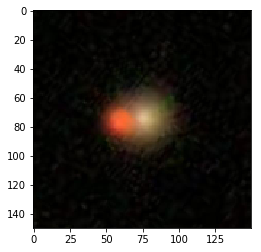

Label:
 [0.354402   0.636909   0.008689   0.         0.636909   0.2181477
 0.4187613  0.         0.636909   0.06908042 0.26832721 0.2125429
 0.0869591  0.865055   0.134945   0.25733094 0.09707106 0.
 0.02768176 0.         0.05622858 0.02768176 0.64187081 0.1115921
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


In [16]:
plt.imshow(X_train[2000], interpolation='nearest')
plt.show()

print("Label:\n", y_train[2000])

#### Testing image

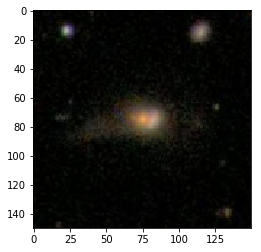

Label:
 [0.112835   0.8768     0.010366   0.         0.8768     0.
 0.8768     0.         0.8768     0.         0.20649955 0.62130574
 0.04899471 0.928235   0.071765   0.03308085 0.07975415 0.
 0.0041687  0.28225027 0.02965711 0.21917021 0.17897578 0.21401201
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


In [17]:
plt.imshow(X_test[1000], interpolation='nearest')
plt.show()

print("Label:\n", y_test[1000])

#### Validation image

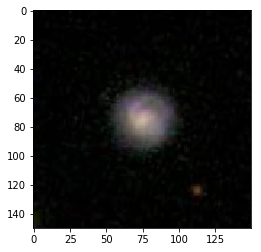

Label:
 [0.050772   0.949228   0.         0.         0.949228   0.51960456
 0.42962344 0.89846044 0.05076756 0.26270929 0.5076908  0.12757719
 0.05125072 0.313724   0.686276   0.04841283 0.00235917 0.
 0.1176465  0.         0.0392155  0.078431   0.0392155  0.0392155
 0.         0.         0.         0.         0.35164933 0.42989355
 0.11691666 0.5863829  0.19516088 0.         0.         0.
 0.11691666]


In [18]:
plt.imshow(X_val[1000], interpolation='nearest')
plt.show()

print("Label:\n", y_val[1000])

## 2. Designing the network and training

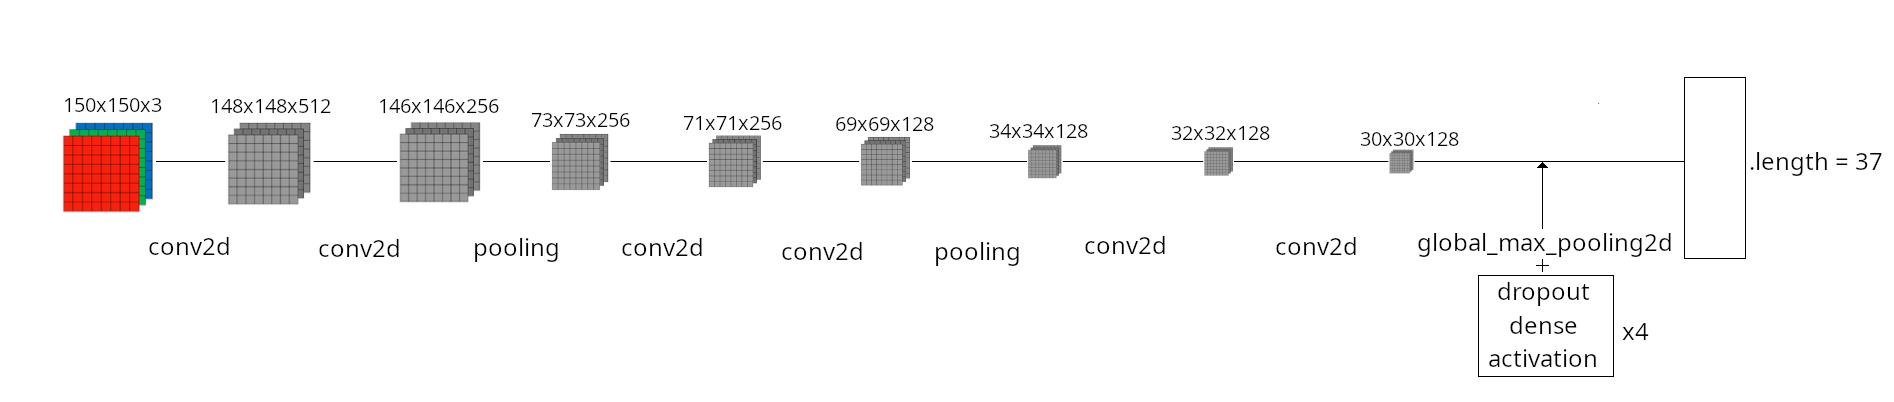

In [19]:
im = Image.open(os.path.join(base_path, 'cnn.png'))
display(im)

In [20]:
def network():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(512, (3, 3), input_shape=(SHAPE_Y, SHAPE_X, CHANNELS)))
    model.add(tf.keras.layers.Conv2D(256, (3, 3)))
    #model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Conv2D(256, (3, 3)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3)))
    #model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Conv2D(128, (3, 3)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3)))
    #model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.GlobalMaxPooling2D())


    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(128))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(128))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(128))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(37))
    model.add(tf.keras.layers.Activation('sigmoid'))

    return model

In [21]:
K.clear_session()
model = network()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 512)     14336     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 256)     1179904   
_________________________________________________________________
activation (Activation)      (None, 146, 146, 256)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 256)       590080    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 128)       295040    
_________________________________________________________________
activation_1 (Activation)    (None, 69, 69, 128)       0

The Loss function that will be used:

In [22]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

Compilation

In [23]:
print('Compiling...')
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=[root_mean_squared_error, 'accuracy'])
print('Compiled')

Compiling...
Compiled


Training:

**WARNING**: Really long execution cell.
On our computers around 4 hours for each epoch (at least 5 days per execution).
On Kaggle with GPUs, around 30 minutes.

In [25]:
batch_size = 64
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=batch_size, verbose=1)

Train on 7000 samples, validate on 3000 samples
Epoch 1/30
7000/7000 [==============================] - 111s 16ms/sample - loss: 0.5541 - root_mean_squared_error: 0.2775 - accuracy: 0.4539 - val_loss: 0.3192 - val_root_mean_squared_error: 0.1737 - val_accuracy: 0.4960
Epoch 2/30
7000/7000 [==============================] - 98s 14ms/sample - loss: 0.3519 - root_mean_squared_error: 0.2042 - accuracy: 0.4880 - val_loss: 0.3035 - val_root_mean_squared_error: 0.1643 - val_accuracy: 0.4960
Epoch 3/30
7000/7000 [==============================] - 98s 14ms/sample - loss: 0.3337 - root_mean_squared_error: 0.1896 - accuracy: 0.4906 - val_loss: 0.2983 - val_root_mean_squared_error: 0.1619 - val_accuracy: 0.4960
Epoch 4/30
7000/7000 [==============================] - 98s 14ms/sample - loss: 0.3258 - root_mean_squared_error: 0.1834 - accuracy: 0.4916 - val_loss: 0.2980 - val_root_mean_squared_error: 0.1617 - val_accuracy: 0.4960
Epoch 5/30
7000/7000 [==============================] - 98s 14ms/sample

In [26]:
# model.save('galaxy-convnet-mlnn.h5')

## 3. Validation of the model and results

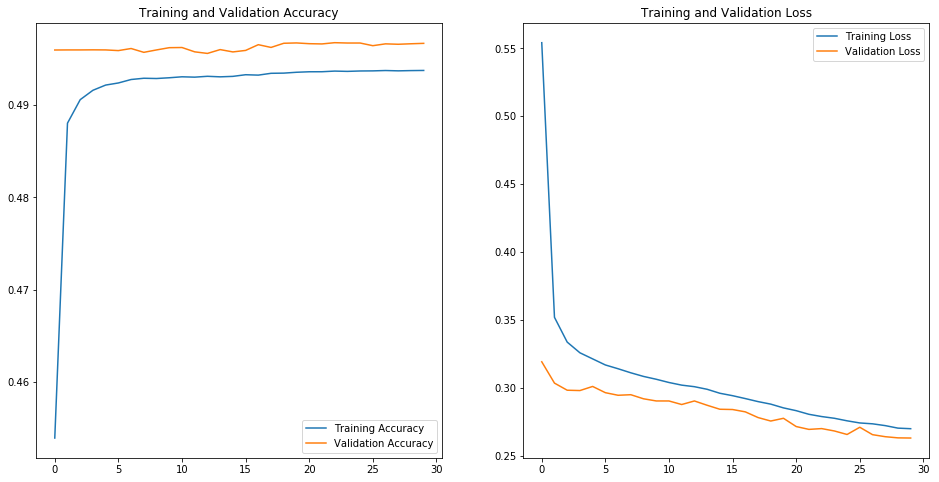

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))  # range for the number of epochs

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./plots-v2.png')
plt.show()

In [28]:
score = model.evaluate(X_val, y_val, batch_size=32)

3000/3000 [==============================] - 10s 3ms/sample - loss: 0.2631 - root_mean_squared_error: 0.1265 - accuracy: 0.4967


### An example of a prediction

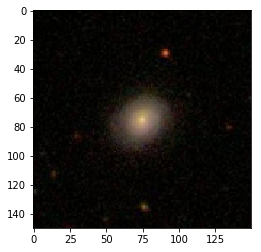

In [29]:
plt.imshow(X_train[0], interpolation='nearest')
plt.show()

In [30]:
inputarray = X_train[0].reshape((1, SHAPE_Y, SHAPE_X, CHANNELS))

In [31]:
result = model.predict(inputarray)
result

array([[0.55942696, 0.39641574, 0.02191624, 0.02298698, 0.3911167 ,
        0.06573474, 0.33217704, 0.13715568, 0.27038527, 0.02984381,
        0.14603403, 0.17883518, 0.04093206, 0.2136541 , 0.80014634,
        0.25211442, 0.32279077, 0.02186996, 0.01799628, 0.01191083,
        0.03016645, 0.02847773, 0.06621251, 0.04216394, 0.00297427,
        0.0193001 , 0.00374964, 0.00462645, 0.06739414, 0.0399178 ,
        0.02206373, 0.00761172, 0.03770337, 0.00606868, 0.00218633,
        0.0037072 , 0.06813506]], dtype=float32)

## 5. Application of GZ2 Decision Tree

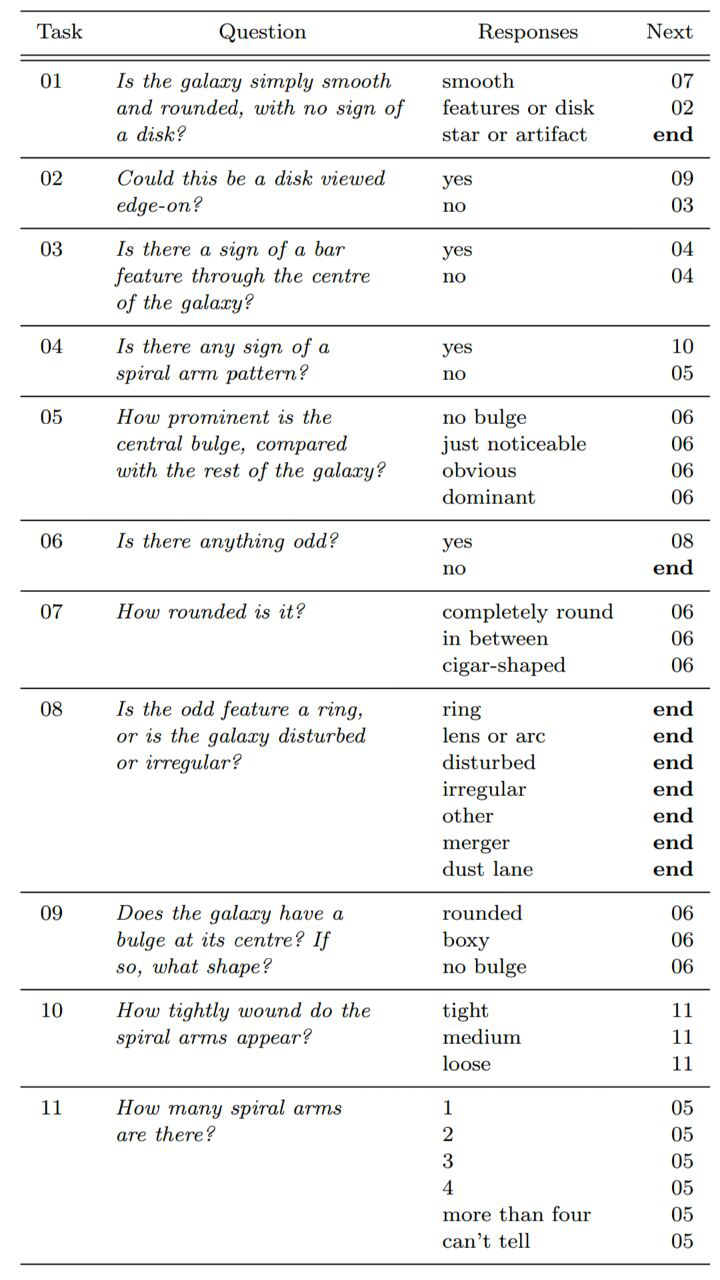

In [32]:
im = Image.open(os.path.join(base_path, 'table.jpg'))
display(im)

### 5.1 GZ2 converter

In [33]:
def GZ2(values):
    '''
    Takes 37 values on an array and uses the table above to retrieve
    and return the path that is followed until end is reached
    '''
    Q1 = values[:3]
    Q1_max = Q1.index(max(Q1))
    Q2 = values[3:5]
    Q2_max = Q2.index(max(Q2))
    Q3 = values[5:7]
    Q3_max = Q3.index(max(Q3))
    Q4 = values[7:9]
    Q4_max = Q4.index(max(Q4))
    Q5 = values[9:13]
    Q5_max = Q5.index(max(Q5))
    Q6 = values[13:15]
    Q6_max = Q6.index(max(Q6))
    Q7 = values[15:18]
    Q7_max = Q7.index(max(Q7))
    Q8 = values[18:25]
    Q8_max = Q8.index(max(Q8))
    Q9 = values[25:28]
    Q9_max = Q9.index(max(Q9))
    Q10 = values[28:31]
    Q10_max = Q10.index(max(Q10))
    Q11 = values[31:]
    Q11_max = Q11.index(max(Q11))
    answers=[]
    
    if Q1_max == 0:
        answers.append('smooth')
        if Q6_max == 1:
            answers.append('no')
        else:
            if Q8_max == 0:
                answers.append('ring')               
            elif Q8_max == 1:
                answers.append('lens or arc')
            elif Q8_max == 2:
                answers.append('disturbed')
            elif Q8_max == 3:
                answers.append('irregular')
            elif Q8_max == 4:
                answers.append('other')
            elif Q8_max == 5:
                answers.append('merger')
            elif Q8_max == 6:
                answers.append('dust lane')
    elif Q1_max == 1:
        answers.append('features or disk')
        if Q2_max == 0:
            answers.append('yes')
            if Q9_max == 0:
                answers.append('rounded')
            elif Q9_max == 1:
                answers.append('boxy')
            else:
                answers.append('no bugle')
            if Q6_max == 1:
                answers.append('no')
            else:
                if Q8_max == 0:
                    answers.append('ring')               
                elif Q8_max == 1:
                    answers.append('lens or arc')
                elif Q8_max == 2:
                    answers.append('disturbed')
                elif Q8_max == 3:
                    answers.append('irregular')
                elif Q8_max == 4:
                    answers.append('other')
                elif Q8_max == 5:
                    answers.append('merger')
                elif Q8_max == 6:
                    answers.append('dust lane')
        else:
            answers.append('no')
            if Q3_max == 0:
                answers.append('yes')
            else:
                answers.append('no')
            if Q4_max == 0:
                answers.append('yes')
                if Q10_max == 0:
                    answers.append('tight')
                elif Q10_max == 1:
                    answers.append('medium')
                else:
                    answers.append('loose')
                if Q11_max == 0:
                    answers.append('1')
                elif Q11_max == 1:
                    answers.append('2')
                elif Q11_max == 2:
                    answers.append('3')
                elif Q11_max == 3:
                    answers.append('4')
                elif Q11_max == 4:
                    answers.append('more than four')
                else:
                    answers.append('can not tell')
                if Q5_max == 0:
                    answers.append('no bulge')
                elif Q5_max == 1:
                    answers.append('just noticeable')
                elif Q5_max == 2:
                    answers.append('obvious')
                else:
                    answers.append('dominant')
                if Q6_max == 1:
                    answers.append('no')
                else:
                    if Q8_max == 0:
                        answers.append('ring')               
                    elif Q8_max == 1:
                        answers.append('lens or arc')
                    elif Q8_max == 2:
                        answers.append('disturbed')
                    elif Q8_max == 3:
                        answers.append('irregular')
                    elif Q8_max == 4:
                        answers.append('other')
                    elif Q8_max == 5:
                        answers.append('merger')
                    elif Q8_max == 6:
                        answers.append('dust lane')
    else:
        answers.append('star or artifact')
    return answers

Examples of GZ2 converter:

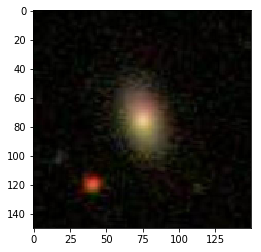

['smooth', 'no']

In [34]:
plt.imshow(X_train[2], interpolation='nearest')
plt.show()

GZ2(y_train[2].tolist())

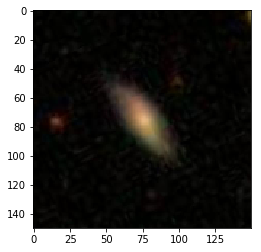

['features or disk', 'no', 'yes', 'yes', 'loose', '2', 'just noticeable', 'no']

In [35]:
plt.imshow(X_train[1], interpolation='nearest')
plt.show()

GZ2(y_train[1].tolist())

For all the images on the test set, make a prediction and append it to an array

In [36]:
predicted_values=[]
for i in range(X_test.shape[0]):
    input_test = X_test[i].reshape((1, SHAPE_Y, SHAPE_Y, CHANNELS))
    predicted_values.append(model.predict(input_test))
predicted_values

[array([[0.21745053, 0.780076  , 0.01639721, 0.04343051, 0.7492584 ,
         0.19952124, 0.536802  , 0.48946962, 0.28573307, 0.09315684,
         0.3549598 , 0.2709428 , 0.04984194, 0.2902582 , 0.7030239 ,
         0.06414056, 0.13950545, 0.03451547, 0.07732728, 0.01351553,
         0.05047372, 0.07542333, 0.06600982, 0.03852603, 0.00466201,
         0.03151816, 0.00530979, 0.01157865, 0.21810427, 0.18433487,
         0.0764322 , 0.02750927, 0.2099672 , 0.04105952, 0.01760355,
         0.0118835 , 0.1402047 ]], dtype=float32),
 array([[2.4416551e-01, 7.5759965e-01, 1.8029630e-02, 6.8289775e-01,
         1.2141356e-01, 2.7299583e-02, 9.5650017e-02, 3.6254287e-02,
         7.9027802e-02, 2.0570368e-02, 4.7167361e-02, 3.9454311e-02,
         8.3897114e-03, 1.3319033e-01, 8.7232029e-01, 1.4837325e-02,
         4.0320545e-02, 2.2042286e-01, 7.2270334e-03, 5.8077574e-03,
         1.4096916e-02, 1.5284240e-02, 2.9112905e-02, 1.7894655e-02,
         1.9140244e-03, 3.6618099e-01, 4.4813663e-02

Convert each of the 37-values-arrays with the GZ2 converter to get the predeicted paths for each of them

In [37]:
predicted_answers=[]
for i in range(len(predicted_values)):
    predicted_answers.append(GZ2(predicted_values[i].tolist()[0]))
predicted_answers

[['features or disk',
  'no',
  'no',
  'yes',
  'tight',
  '2',
  'just noticeable',
  'no'],
 ['features or disk', 'yes', 'rounded', 'no'],
 ['features or disk', 'no', 'no'],
 ['smooth', 'no'],
 ['features or disk', 'yes', 'rounded', 'no'],
 ['smooth', 'no'],
 ['smooth', 'no'],
 ['features or disk',
  'no',
  'no',
  'yes',
  'medium',
  '2',
  'just noticeable',
  'no'],
 ['smooth', 'no'],
 ['smooth', 'no'],
 ['features or disk', 'yes', 'rounded', 'no'],
 ['features or disk',
  'no',
  'no',
  'yes',
  'tight',
  '2',
  'just noticeable',
  'no'],
 ['smooth', 'no'],
 ['smooth', 'no'],
 ['features or disk',
  'no',
  'no',
  'yes',
  'tight',
  '2',
  'just noticeable',
  'no'],
 ['features or disk',
  'no',
  'no',
  'yes',
  'tight',
  '2',
  'just noticeable',
  'no'],
 ['smooth', 'no'],
 ['features or disk', 'no', 'no'],
 ['features or disk',
  'no',
  'no',
  'yes',
  'medium',
  '2',
  'just noticeable',
  'no'],
 ['features or disk',
  'no',
  'no',
  'yes',
  'medium',
  '2',

Convert using the GZ2 converter the true labels of the test set and get a another array of paths

In [38]:
true_answers=[]
for i in range(y_test.shape[0]):
    true_answers.append(GZ2(y_test[i].tolist()))
true_answers

[['smooth', 'no'],
 ['features or disk', 'yes', 'rounded', 'no'],
 ['smooth', 'merger'],
 ['smooth', 'no'],
 ['features or disk',
  'no',
  'no',
  'yes',
  'tight',
  'can not tell',
  'just noticeable',
  'no'],
 ['smooth', 'no'],
 ['smooth', 'no'],
 ['features or disk',
  'no',
  'no',
  'yes',
  'tight',
  'can not tell',
  'just noticeable',
  'no'],
 ['smooth', 'no'],
 ['smooth', 'no'],
 ['features or disk', 'yes', 'no bugle', 'no'],
 ['features or disk',
  'no',
  'no',
  'yes',
  'medium',
  '2',
  'no bulge',
  'irregular'],
 ['smooth', 'no'],
 ['smooth', 'no'],
 ['smooth', 'no'],
 ['features or disk',
  'no',
  'no',
  'yes',
  'tight',
  'can not tell',
  'just noticeable',
  'no'],
 ['smooth', 'no'],
 ['features or disk',
  'no',
  'no',
  'yes',
  'loose',
  '2',
  'just noticeable',
  'no'],
 ['features or disk', 'no', 'no', 'yes', 'tight', '2', 'obvious', 'merger'],
 ['features or disk',
  'no',
  'no',
  'yes',
  'tight',
  '2',
  'just noticeable',
  'no'],
 ['features

Compare both path arrays and check how many paths have been predicted correctly

In [39]:
count=0
for i in range(len(true_answers)):
    real = true_answers[i]
    prediction = predicted_answers[i]
    if collections.Counter(real) == collections.Counter(prediction):
        count+=1   

In [40]:
count

1229

### The accuracy of the model

In [41]:
acc = count/len(predicted_answers)
acc

0.4096666666666667